In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

v005.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/notebooks


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
torch.backends.cudnn.enabled = True
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [3]:
%autoreload

#cohort = mre_pinn.data.PatientCohort(patient_ids=['0006'] * 4, xarray_dir='../data/NAFLD')
cohort = mre_pinn.data.PatientCohort.from_file('../data/NAFLD/NAFLD_2022-11-7.xarrays', xarray_dir='../data/NAFLD')
#cohort.create_xarrays()
#cohort.save_xarrays()
#cohort.metadata
cohort.load_xarrays()
cohort.eval_baseline()

/ocean/projects/asc170022p/shared/Data/MRE/MRE_DICOM_7-31-19/NIFTI/0213 is missing sequences {'t2', 'mre', 'mre_raw', 'wave'}
  0%|          | 0/155 [00:00<?, ?it/s]Loading ../data/NAFLD/0898/t1_pre_in.nc
Loading ../data/NAFLD/0898/t1_pre_water.nc
Loading ../data/NAFLD/0898/t1_pre_out.nc
Loading ../data/NAFLD/0898/t1_pre_fat.nc
Loading ../data/NAFLD/0898/t2.nc
Loading ../data/NAFLD/0898/mre_raw.nc
Loading ../data/NAFLD/0898/wave.nc
Loading ../data/NAFLD/0898/mre.nc
Loading ../data/NAFLD/0898/anat_mask.nc
Loading ../data/NAFLD/0898/mre_mask.nc
Loading ../data/NAFLD/0900/t1_pre_in.nc
Loading ../data/NAFLD/0900/t1_pre_water.nc
Loading ../data/NAFLD/0900/t1_pre_out.nc
Loading ../data/NAFLD/0900/t1_pre_fat.nc
Loading ../data/NAFLD/0900/t2.nc
Loading ../data/NAFLD/0900/mre_raw.nc
Loading ../data/NAFLD/0900/wave.nc
Loading ../data/NAFLD/0900/mre.nc
Loading ../data/NAFLD/0900/anat_mask.nc
Loading ../data/NAFLD/0900/mre_mask.nc
Loading ../data/NAFLD/0929/t1_pre_in.nc
Loading ../data/NAFLD/0929/

 14%|█▎        | 21/155 [00:01<00:06, 21.71it/s]Loading ../data/NAFLD/1106/t1_pre_in.nc
Loading ../data/NAFLD/1106/t1_pre_water.nc
Loading ../data/NAFLD/1106/t1_pre_out.nc
Loading ../data/NAFLD/1106/t1_pre_fat.nc
Loading ../data/NAFLD/1106/t2.nc
Loading ../data/NAFLD/1106/mre_raw.nc
Loading ../data/NAFLD/1106/wave.nc
Loading ../data/NAFLD/1106/mre.nc
Loading ../data/NAFLD/1106/anat_mask.nc
Loading ../data/NAFLD/1106/mre_mask.nc
Loading ../data/NAFLD/1108/t1_pre_in.nc
Loading ../data/NAFLD/1108/t1_pre_water.nc
Loading ../data/NAFLD/1108/t1_pre_out.nc
Loading ../data/NAFLD/1108/t1_pre_fat.nc
Loading ../data/NAFLD/1108/t2.nc
Loading ../data/NAFLD/1108/mre_raw.nc
Loading ../data/NAFLD/1108/wave.nc
Loading ../data/NAFLD/1108/mre.nc
Loading ../data/NAFLD/1108/anat_mask.nc
Loading ../data/NAFLD/1108/mre_mask.nc
Loading ../data/NAFLD/1110/t1_pre_in.nc
Loading ../data/NAFLD/1110/t1_pre_water.nc
Loading ../data/NAFLD/1110/t1_pre_out.nc
Loading ../data/NAFLD/1110/t1_pre_fat.nc
Loading ../data/NAF

Loading ../data/NAFLD/1337/mre_raw.nc
Loading ../data/NAFLD/1337/wave.nc
Loading ../data/NAFLD/1337/mre.nc
Loading ../data/NAFLD/1337/anat_mask.nc
Loading ../data/NAFLD/1337/mre_mask.nc
 27%|██▋       | 42/155 [00:01<00:04, 23.81it/s]Loading ../data/NAFLD/1341/t1_pre_in.nc
Loading ../data/NAFLD/1341/t1_pre_water.nc
Loading ../data/NAFLD/1341/t1_pre_out.nc
Loading ../data/NAFLD/1341/t1_pre_fat.nc
Loading ../data/NAFLD/1341/t2.nc
Loading ../data/NAFLD/1341/mre_raw.nc
Loading ../data/NAFLD/1341/wave.nc
Loading ../data/NAFLD/1341/mre.nc
Loading ../data/NAFLD/1341/anat_mask.nc
Loading ../data/NAFLD/1341/mre_mask.nc
Loading ../data/NAFLD/1343/t1_pre_in.nc
Loading ../data/NAFLD/1343/t1_pre_water.nc
Loading ../data/NAFLD/1343/t1_pre_out.nc
Loading ../data/NAFLD/1343/t1_pre_fat.nc
Loading ../data/NAFLD/1343/t2.nc
Loading ../data/NAFLD/1343/mre_raw.nc
Loading ../data/NAFLD/1343/wave.nc
Loading ../data/NAFLD/1343/mre.nc
Loading ../data/NAFLD/1343/anat_mask.nc
Loading ../data/NAFLD/1343/mre_mask.n

Loading ../data/NAFLD/0043/t1_pre_out.nc
Loading ../data/NAFLD/0043/t1_pre_fat.nc
Loading ../data/NAFLD/0043/t2.nc
Loading ../data/NAFLD/0043/mre_raw.nc
Loading ../data/NAFLD/0043/wave.nc
Loading ../data/NAFLD/0043/mre.nc
Loading ../data/NAFLD/0043/anat_mask.nc
Loading ../data/NAFLD/0043/mre_mask.nc
 41%|████      | 63/155 [00:02<00:04, 22.46it/s]Loading ../data/NAFLD/0047/t1_pre_in.nc
Loading ../data/NAFLD/0047/t1_pre_water.nc
Loading ../data/NAFLD/0047/t1_pre_out.nc
Loading ../data/NAFLD/0047/t1_pre_fat.nc
Loading ../data/NAFLD/0047/t2.nc
Loading ../data/NAFLD/0047/mre_raw.nc
Loading ../data/NAFLD/0047/wave.nc
Loading ../data/NAFLD/0047/mre.nc
Loading ../data/NAFLD/0047/anat_mask.nc
Loading ../data/NAFLD/0047/mre_mask.nc
Loading ../data/NAFLD/0126/t1_pre_in.nc
Loading ../data/NAFLD/0126/t1_pre_water.nc
Loading ../data/NAFLD/0126/t1_pre_out.nc
Loading ../data/NAFLD/0126/t1_pre_fat.nc
Loading ../data/NAFLD/0126/t2.nc
Loading ../data/NAFLD/0126/mre_raw.nc
Loading ../data/NAFLD/0126/wave

Loading ../data/NAFLD/0222/mre_mask.nc
Loading ../data/NAFLD/0234/t1_pre_in.nc
Loading ../data/NAFLD/0234/t1_pre_water.nc
Loading ../data/NAFLD/0234/t1_pre_out.nc
Loading ../data/NAFLD/0234/t1_pre_fat.nc
Loading ../data/NAFLD/0234/t2.nc
Loading ../data/NAFLD/0234/mre_raw.nc
Loading ../data/NAFLD/0234/wave.nc
Loading ../data/NAFLD/0234/mre.nc
Loading ../data/NAFLD/0234/anat_mask.nc
Loading ../data/NAFLD/0234/mre_mask.nc
 54%|█████▍    | 84/155 [00:03<00:03, 22.96it/s]Loading ../data/NAFLD/0235/t1_pre_in.nc
Loading ../data/NAFLD/0235/t1_pre_water.nc
Loading ../data/NAFLD/0235/t1_pre_out.nc
Loading ../data/NAFLD/0235/t1_pre_fat.nc
Loading ../data/NAFLD/0235/t2.nc
Loading ../data/NAFLD/0235/mre_raw.nc
Loading ../data/NAFLD/0235/wave.nc
Loading ../data/NAFLD/0235/mre.nc
Loading ../data/NAFLD/0235/anat_mask.nc
Loading ../data/NAFLD/0235/mre_mask.nc
Loading ../data/NAFLD/0457/t1_pre_in.nc
Loading ../data/NAFLD/0457/t1_pre_water.nc
Loading ../data/NAFLD/0457/t1_pre_out.nc
Loading ../data/NAFLD

Loading ../data/NAFLD/0655/mre_raw.nc
Loading ../data/NAFLD/0655/wave.nc
Loading ../data/NAFLD/0655/mre.nc
Loading ../data/NAFLD/0655/anat_mask.nc
Loading ../data/NAFLD/0655/mre_mask.nc
Loading ../data/NAFLD/0659/t1_pre_in.nc
Loading ../data/NAFLD/0659/t1_pre_water.nc
Loading ../data/NAFLD/0659/t1_pre_out.nc
Loading ../data/NAFLD/0659/t1_pre_fat.nc
Loading ../data/NAFLD/0659/t2.nc
Loading ../data/NAFLD/0659/mre_raw.nc
Loading ../data/NAFLD/0659/wave.nc
Loading ../data/NAFLD/0659/mre.nc
Loading ../data/NAFLD/0659/anat_mask.nc
Loading ../data/NAFLD/0659/mre_mask.nc
 68%|██████▊   | 105/155 [00:04<00:02, 23.21it/s]Loading ../data/NAFLD/0693/t1_pre_in.nc
Loading ../data/NAFLD/0693/t1_pre_water.nc
Loading ../data/NAFLD/0693/t1_pre_out.nc
Loading ../data/NAFLD/0693/t1_pre_fat.nc
Loading ../data/NAFLD/0693/t2.nc
Loading ../data/NAFLD/0693/mre_raw.nc
Loading ../data/NAFLD/0693/wave.nc
Loading ../data/NAFLD/0693/mre.nc
Loading ../data/NAFLD/0693/anat_mask.nc
Loading ../data/NAFLD/0693/mre_mask.

Loading ../data/NAFLD/1727/t1_pre_water.nc
Loading ../data/NAFLD/1727/t1_pre_out.nc
Loading ../data/NAFLD/1727/t1_pre_fat.nc
Loading ../data/NAFLD/1727/t2.nc
Loading ../data/NAFLD/1727/mre_raw.nc
Loading ../data/NAFLD/1727/wave.nc
Loading ../data/NAFLD/1727/mre.nc
Loading ../data/NAFLD/1727/anat_mask.nc
Loading ../data/NAFLD/1727/mre_mask.nc
Loading ../data/NAFLD/1736/t1_pre_in.nc
Loading ../data/NAFLD/1736/t1_pre_water.nc
Loading ../data/NAFLD/1736/t1_pre_out.nc
Loading ../data/NAFLD/1736/t1_pre_fat.nc
Loading ../data/NAFLD/1736/t2.nc
Loading ../data/NAFLD/1736/mre_raw.nc
Loading ../data/NAFLD/1736/wave.nc
Loading ../data/NAFLD/1736/mre.nc
Loading ../data/NAFLD/1736/anat_mask.nc
Loading ../data/NAFLD/1736/mre_mask.nc
 81%|████████▏ | 126/155 [00:05<00:01, 22.80it/s]Loading ../data/NAFLD/1748/t1_pre_in.nc
Loading ../data/NAFLD/1748/t1_pre_water.nc
Loading ../data/NAFLD/1748/t1_pre_out.nc
Loading ../data/NAFLD/1748/t1_pre_fat.nc
Loading ../data/NAFLD/1748/t2.nc
Loading ../data/NAFLD/174

Loading ../data/NAFLD/1903/mre.nc
Loading ../data/NAFLD/1903/anat_mask.nc
Loading ../data/NAFLD/1903/mre_mask.nc
Loading ../data/NAFLD/1917/t1_pre_in.nc
Loading ../data/NAFLD/1917/t1_pre_water.nc
Loading ../data/NAFLD/1917/t1_pre_out.nc
Loading ../data/NAFLD/1917/t1_pre_fat.nc
Loading ../data/NAFLD/1917/t2.nc
Loading ../data/NAFLD/1917/mre_raw.nc
Loading ../data/NAFLD/1917/wave.nc
Loading ../data/NAFLD/1917/mre.nc
Loading ../data/NAFLD/1917/anat_mask.nc
Loading ../data/NAFLD/1917/mre_mask.nc
Loading ../data/NAFLD/1935/t1_pre_in.nc
Loading ../data/NAFLD/1935/t1_pre_water.nc
Loading ../data/NAFLD/1935/t1_pre_out.nc
Loading ../data/NAFLD/1935/t1_pre_fat.nc
Loading ../data/NAFLD/1935/t2.nc
Loading ../data/NAFLD/1935/mre_raw.nc
Loading ../data/NAFLD/1935/wave.nc
Loading ../data/NAFLD/1935/mre.nc
Loading ../data/NAFLD/1935/anat_mask.nc
Loading ../data/NAFLD/1935/mre_mask.nc
 95%|█████████▍| 147/155 [00:06<00:00, 16.78it/s]Loading ../data/NAFLD/1940/t1_pre_in.nc
Loading ../data/NAFLD/1940/t1_

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  1%|          | 1/155 [00:00<00:43,  3.54it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  1%|▏         | 2/155 [00:00<00:48,  3.13it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  2%|▏         | 3/155 [00:00<00:45,  3.32it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  3%|▎         | 4/155 [00:01<00:47,  3.17it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  3%|▎         | 5/155 [00:01<00:48,  3.07it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  4%|▍         | 6/155 [00:01<00:49,  3.02it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  5%|▍         | 7/155 [00:02<00:47,  3.09it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  5%|▌         | 8/155 [00:02<00:45,  3.21it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  6%|▌         | 9/155 [00:02<00:44,  3.31it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  6%|▋         | 10/155 [00:03<00:43,  3.31it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  7%|▋         | 11/155 [00:03<00:45,  3.17it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  8%|▊         | 12/155 [00:03<00:45,  3.14it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  8%|▊         | 13/155 [00:04<00:43,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  9%|▉         | 14/155 [00:04<00:41,  3.36it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 10%|▉         | 15/155 [00:04<00:41,  3.36it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 10%|█         | 16/155 [00:04<00:42,  3.28it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 11%|█         | 17/155 [00:05<00:43,  3.14it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 12%|█▏        | 18/155 [00:05<00:42,  3.26it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 12%|█▏        | 19/155 [00:05<00:40,  3.38it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 13%|█▎        | 20/155 [00:06<00:40,  3.31it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 14%|█▎        | 21/155 [00:06<00:38,  3.47it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 14%|█▍        | 22/155 [00:06<00:37,  3.50it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 15%|█▍        | 23/155 [00:06<00:37,  3.50it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 15%|█▌        | 24/155 [00:07<00:39,  3.35it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 16%|█▌        | 25/155 [00:07<00:38,  3.36it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 17%|█▋        | 26/155 [00:07<00:40,  3.15it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 17%|█▋        | 27/155 [00:08<00:41,  3.06it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 18%|█▊        | 28/155 [00:08<00:40,  3.12it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 19%|█▊        | 29/155 [00:08<00:38,  3.29it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 19%|█▉        | 30/155 [00:09<00:37,  3.31it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 20%|██        | 31/155 [00:09<00:37,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 21%|██        | 32/155 [00:09<00:38,  3.22it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 21%|██▏       | 33/155 [00:10<00:38,  3.19it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 22%|██▏       | 34/155 [00:10<00:37,  3.26it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 23%|██▎       | 35/155 [00:10<00:38,  3.14it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 23%|██▎       | 36/155 [00:11<00:36,  3.24it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 24%|██▍       | 37/155 [00:11<00:34,  3.38it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 25%|██▍       | 38/155 [00:11<00:34,  3.34it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 25%|██▌       | 39/155 [00:11<00:34,  3.38it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 26%|██▌       | 40/155 [00:12<00:33,  3.41it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 26%|██▋       | 41/155 [00:12<00:32,  3.47it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 27%|██▋       | 42/155 [00:12<00:34,  3.28it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 28%|██▊       | 43/155 [00:13<00:32,  3.42it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 28%|██▊       | 44/155 [00:13<00:34,  3.25it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 29%|██▉       | 45/155 [00:13<00:32,  3.37it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 30%|██▉       | 46/155 [00:13<00:31,  3.49it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 30%|███       | 47/155 [00:14<00:30,  3.53it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 31%|███       | 48/155 [00:14<00:29,  3.69it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 32%|███▏      | 49/155 [00:14<00:31,  3.40it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 32%|███▏      | 50/155 [00:15<00:32,  3.28it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 33%|███▎      | 51/155 [00:15<00:32,  3.20it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 34%|███▎      | 52/155 [00:15<00:31,  3.31it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 34%|███▍      | 53/155 [00:16<00:31,  3.26it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 35%|███▍      | 54/155 [00:16<00:32,  3.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 35%|███▌      | 55/155 [00:16<00:32,  3.09it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 36%|███▌      | 56/155 [00:17<00:31,  3.09it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 37%|███▋      | 57/155 [00:17<00:31,  3.09it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 37%|███▋      | 58/155 [00:17<00:32,  3.02it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 38%|███▊      | 59/155 [00:18<00:32,  2.96it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 39%|███▊      | 60/155 [00:18<00:32,  2.94it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 39%|███▉      | 61/155 [00:18<00:31,  3.01it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 40%|████      | 62/155 [00:19<00:31,  2.99it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 41%|████      | 63/155 [00:19<00:30,  2.98it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 41%|████▏     | 64/155 [00:19<00:29,  3.14it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 42%|████▏     | 65/155 [00:20<00:27,  3.25it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 43%|████▎     | 66/155 [00:20<00:28,  3.14it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 43%|████▎     | 67/155 [00:20<00:28,  3.05it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 44%|████▍     | 68/155 [00:21<00:28,  3.03it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 45%|████▍     | 69/155 [00:21<00:27,  3.14it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 45%|████▌     | 70/155 [00:21<00:26,  3.25it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 46%|████▌     | 71/155 [00:21<00:27,  3.09it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 46%|████▋     | 72/155 [00:22<00:27,  3.02it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 47%|████▋     | 73/155 [00:22<00:27,  3.02it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 48%|████▊     | 74/155 [00:23<00:27,  2.98it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 48%|████▊     | 75/155 [00:23<00:26,  2.97it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 49%|████▉     | 76/155 [00:23<00:26,  3.00it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 50%|████▉     | 77/155 [00:24<00:26,  2.94it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 50%|█████     | 78/155 [00:24<00:24,  3.09it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 51%|█████     | 79/155 [00:24<00:24,  3.13it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 52%|█████▏    | 80/155 [00:24<00:24,  3.11it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 52%|█████▏    | 81/155 [00:25<00:22,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 53%|█████▎    | 82/155 [00:25<00:21,  3.34it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 54%|█████▎    | 83/155 [00:25<00:22,  3.25it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 54%|█████▍    | 84/155 [00:26<00:21,  3.25it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 55%|█████▍    | 85/155 [00:26<00:22,  3.11it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 55%|█████▌    | 86/155 [00:26<00:21,  3.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 56%|█████▌    | 87/155 [00:27<00:21,  3.11it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 57%|█████▋    | 88/155 [00:27<00:21,  3.11it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 57%|█████▋    | 89/155 [00:27<00:21,  3.07it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 58%|█████▊    | 90/155 [00:28<00:20,  3.22it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 59%|█████▊    | 91/155 [00:28<00:20,  3.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 59%|█████▉    | 92/155 [00:28<00:19,  3.26it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 60%|██████    | 93/155 [00:28<00:19,  3.25it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 61%|██████    | 94/155 [00:29<00:19,  3.17it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 61%|██████▏   | 95/155 [00:29<00:18,  3.30it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 62%|██████▏   | 96/155 [00:29<00:17,  3.37it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 63%|██████▎   | 97/155 [00:30<00:17,  3.28it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 63%|██████▎   | 98/155 [00:30<00:17,  3.32it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 64%|██████▍   | 99/155 [00:30<00:17,  3.25it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 65%|██████▍   | 100/155 [00:31<00:17,  3.22it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 65%|██████▌   | 101/155 [00:31<00:17,  3.13it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 66%|██████▌   | 102/155 [00:31<00:17,  3.06it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 66%|██████▋   | 103/155 [00:32<00:16,  3.07it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 67%|██████▋   | 104/155 [00:32<00:15,  3.24it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 68%|██████▊   | 105/155 [00:32<00:16,  3.12it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 68%|██████▊   | 106/155 [00:33<00:15,  3.19it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 69%|██████▉   | 107/155 [00:33<00:15,  3.08it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 70%|██████▉   | 108/155 [00:33<00:15,  3.11it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 70%|███████   | 109/155 [00:34<00:14,  3.14it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 71%|███████   | 110/155 [00:34<00:13,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 72%|███████▏  | 111/155 [00:34<00:13,  3.26it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 72%|███████▏  | 112/155 [00:34<00:13,  3.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 73%|███████▎  | 113/155 [00:35<00:13,  3.22it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 74%|███████▎  | 114/155 [00:35<00:12,  3.29it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 74%|███████▍  | 115/155 [00:35<00:11,  3.33it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 75%|███████▍  | 116/155 [00:36<00:12,  3.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 75%|███████▌  | 117/155 [00:36<00:12,  3.03it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 76%|███████▌  | 118/155 [00:36<00:12,  2.97it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 77%|███████▋  | 119/155 [00:37<00:11,  3.08it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 77%|███████▋  | 120/155 [00:37<00:11,  3.11it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 78%|███████▊  | 121/155 [00:37<00:10,  3.14it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 79%|███████▊  | 122/155 [00:38<00:10,  3.20it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 79%|███████▉  | 123/155 [00:38<00:10,  3.15it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 80%|████████  | 124/155 [00:38<00:10,  3.08it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 81%|████████  | 125/155 [00:39<00:09,  3.09it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 81%|████████▏ | 126/155 [00:39<00:09,  3.09it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 82%|████████▏ | 127/155 [00:39<00:08,  3.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 83%|████████▎ | 128/155 [00:40<00:08,  3.10it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 83%|████████▎ | 129/155 [00:40<00:08,  3.06it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 84%|████████▍ | 130/155 [00:40<00:08,  3.09it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 85%|████████▍ | 131/155 [00:41<00:07,  3.17it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 85%|████████▌ | 132/155 [00:41<00:07,  3.23it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 86%|████████▌ | 133/155 [00:41<00:06,  3.28it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 86%|████████▋ | 134/155 [00:41<00:06,  3.21it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 87%|████████▋ | 135/155 [00:42<00:06,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 88%|████████▊ | 136/155 [00:42<00:05,  3.18it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 88%|████████▊ | 137/155 [00:42<00:05,  3.08it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 89%|████████▉ | 138/155 [00:43<00:05,  3.07it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 90%|████████▉ | 139/155 [00:43<00:05,  3.11it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 90%|█████████ | 140/155 [00:43<00:04,  3.24it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 91%|█████████ | 141/155 [00:44<00:04,  3.30it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 92%|█████████▏| 142/155 [00:44<00:03,  3.35it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 92%|█████████▏| 143/155 [00:44<00:03,  3.17it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 93%|█████████▎| 144/155 [00:45<00:03,  3.29it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 94%|█████████▎| 145/155 [00:45<00:03,  3.30it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 94%|█████████▍| 146/155 [00:45<00:02,  3.41it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 95%|█████████▍| 147/155 [00:45<00:02,  3.45it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 95%|█████████▌| 148/155 [00:46<00:02,  3.25it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 96%|█████████▌| 149/155 [00:46<00:01,  3.39it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 97%|█████████▋| 150/155 [00:46<00:01,  3.17it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 97%|█████████▋| 151/155 [00:47<00:01,  3.06it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 98%|█████████▊| 152/155 [00:47<00:00,  3.02it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 99%|█████████▊| 153/155 [00:47<00:00,  3.11it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 99%|█████████▉| 154/155 [00:48<00:00,  3.00it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



100%|██████████| 155/155 [00:48<00:00,  3.19it/s]


In [5]:
pde = mre_pinn.pde.WaveEquation.from_name('helmholtz', rho=1e3, omega=60, detach=True)
pde

In [48]:
%autoreload

pino = mre_pinn.model.pino.HyperCNN(
    n_channels_in=1,
    n_channels_block=16,
    n_conv_per_block=2,
    n_conv_blocks=5,
    width_factor=2,
    activ_fn='g',
    n_latent=128,
    n_pinn_layers=4,
    n_pinn_hidden=128,
    u_omega=16,
    u_scale=1e2,
    u_loc=0,
    mu_omega=16,
    mu_scale=1e3,
    mu_loc=0,
    skip_connect=True,
    dense=True,
    parallel=False
)
pino

HyperCNN(
  (u_cnn): CNN(
    (conv_in): Conv3d(1, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (conv_block0): ConvBlock(
      (conv0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool0): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block1): ConvBlock(
      (conv0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool1): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block2): ConvBlock(
      (conv0): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool2): AvgPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0)
    (conv_block3): ConvBlock(
 

In [49]:
%autoreload

model = mre_pinn.training.PINOModel(
    cohort, pino, pde,
    loss_weights=[1e0, 1e-1, 0],
    batch_size=8,
    n_points=16384,
    pde_warmup_iters=0,
    pde_step_iters=5000
)
model.compile(
    optimizer='adam',
    lr=1e-5,
    loss=mre_pinn.training.losses.msae_loss
)   
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)

Precomputing tensors
Compiling model...
'compile' took 0.000713 s



In [50]:
%%time
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(100)

# iterations: 100
Data time/iter:  0.0555s (48.09%)
Model time/iter: 0.0087s (7.54%)
Loss time/iter:  0.0512s (44.37%)
Total time/iter: 0.1154s
Total time: 11.5364s
1k iters time: 1.92m
10k iters time: 19.23m
100k iters time: 3.20h
CPU times: user 18.2 s, sys: 11.4 s, total: 29.6 s
Wall time: 11.5 s


Training model...

0         [3.33e+05, 3.55e+05, 0.00e+00]    [3.20e+05, 1.08e+05, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



<IPython.core.display.Javascript object>


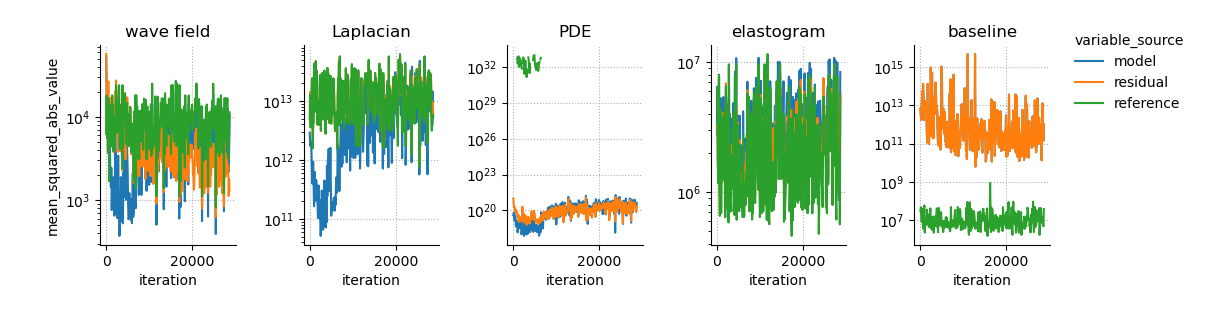

<IPython.core.display.Javascript object>


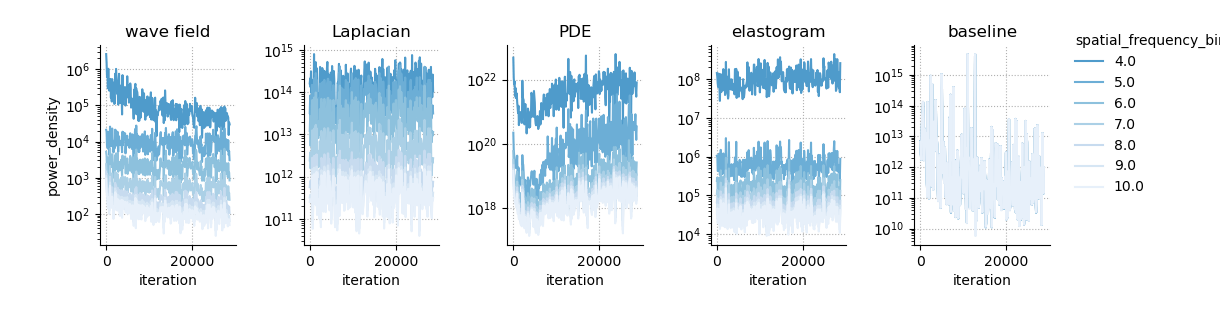

<IPython.core.display.Javascript object>


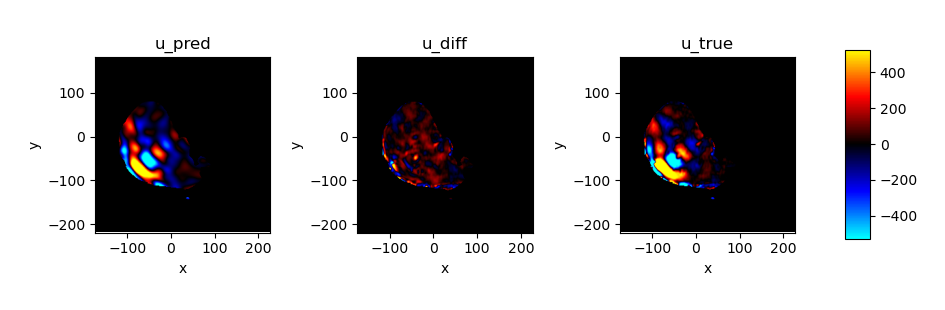

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


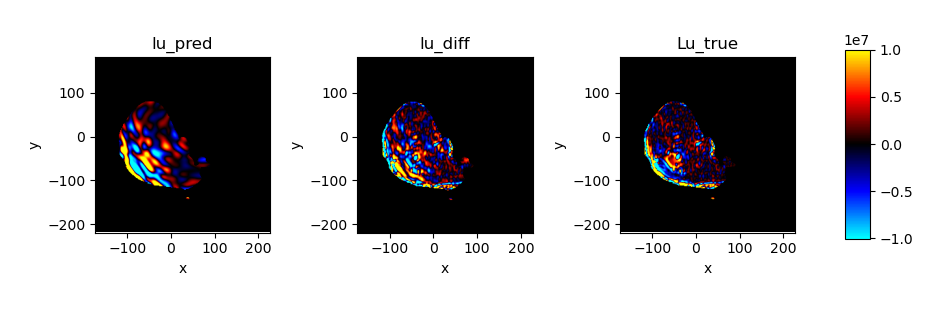

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


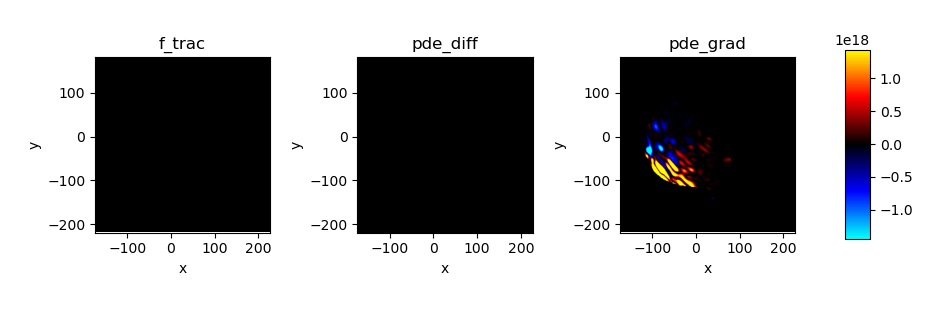

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


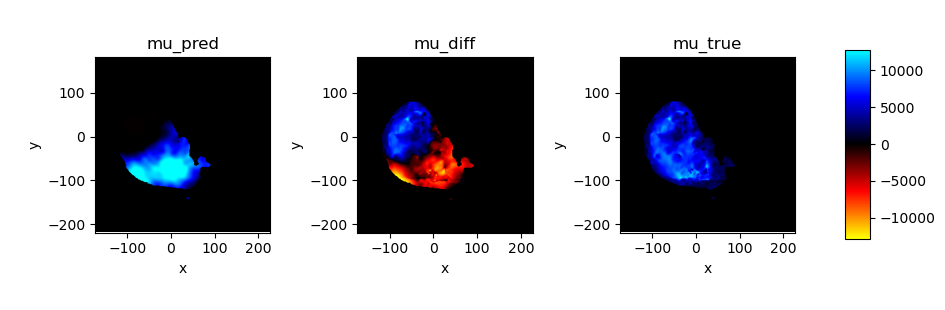

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


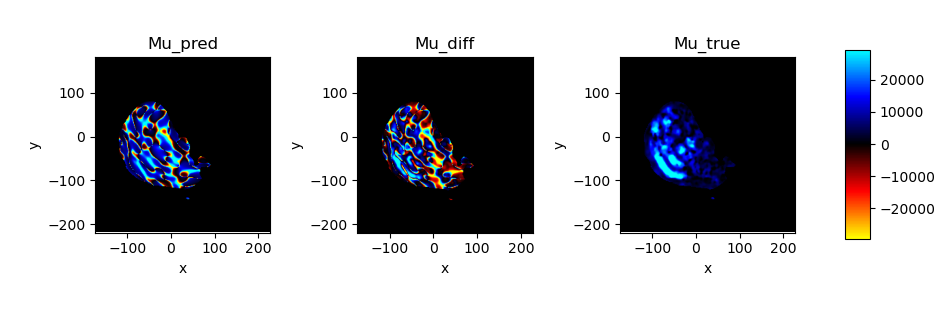

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

Time spent testing: 14.4071 (12.34%)
10        [3.04e+05, 1.95e+05, 0.00e+00]    [1.90e+05, 7.27e+01, 0.00e+00]    []  
20        [2.29e+05, 3.00e+04, 0.00e+00]    [1.60e+05, 5.43e+05, 0.00e+00]    []  
30        [2.24e+05, 1.96e+05, 0.00e+00]    [1.61e+05, 1.93e+05, 0.00e+00]    []  
40        [2.60e+05, 1.08e+04, 0.00e+00]    [2.97e+05, 5.21e+04, 0.00e+00]    []  
50        [3.08e+05, 1.58e+05, 0.00e+00]    [1.62e+05, 1.04e+04, 0.00e+00]    []  
60        [2.00e+05, 3.23e+04, 0.00e+00]    [1.89e+05, 8.08e+02, 0.00e+00]    []  
70        [2.24e+05, 4.52e+04, 0.00e+00]    [2.27e+05, 1.35e+04, 0.00e+00]    []  
80        [2.45e+05, 6.30e+04, 0.00e+00]    [1.97e+05, 4.51e+03, 0.00e+00]    []  
90        [2.16e+05, 4.23e+04, 0.00e+00]    [1.42e+05, 9.07e+03, 0.00e+00]    []  
100       [1.87e+05, 3.38e+04, 0.00e+00]    [1.19e+05, 1.19e+05, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9340 (17.42%)
110       [1.83e+05, 2.43e+04, 0.00e+00]    [1.10e+05, 6.10e+04, 0.00e+00]    []  
120       [2.00e+05, 6.30e+04, 0.00e+00]    [1.26e+05, 7.59e+03, 0.00e+00]    []  
130       [2.01e+05, 4.10e+04, 0.00e+00]    [1.04e+05, 1.36e+04, 0.00e+00]    []  
140       [1.77e+05, 5.97e+04, 0.00e+00]    [1.01e+05, 2.41e+02, 0.00e+00]    []  
150       [1.97e+05, 8.50e+04, 0.00e+00]    [1.04e+05, 2.13e+04, 0.00e+00]    []  
160       [1.46e+05, 3.99e+04, 0.00e+00]    [1.00e+05, 2.60e+04, 0.00e+00]    []  
170       [1.51e+05, 4.73e+04, 0.00e+00]    [1.26e+05, 1.08e+05, 0.00e+00]    []  
180       [1.68e+05, 1.05e+04, 0.00e+00]    [1.33e+05, 3.83e+03, 0.00e+00]    []  
190       [1.47e+05, 2.33e+04, 0.00e+00]    [1.50e+05, 5.23e+02, 0.00e+00]    []  
200       [1.33e+05, 7.91e+04, 0.00e+00]    [1.17e+05, 2.61e+04, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.8716 (20.60%)
210       [1.28e+05, 1.61e+04, 0.00e+00]    [1.12e+05, 1.19e+03, 0.00e+00]    []  
220       [1.33e+05, 1.64e+04, 0.00e+00]    [9.46e+04, 6.10e+03, 0.00e+00]    []  
230       [1.66e+05, 4.92e+04, 0.00e+00]    [1.05e+05, 9.71e+04, 0.00e+00]    []  
240       [1.38e+05, 6.91e+04, 0.00e+00]    [1.11e+05, 3.11e+04, 0.00e+00]    []  
250       [1.48e+05, 8.04e+03, 0.00e+00]    [1.16e+05, 2.30e+04, 0.00e+00]    []  
260       [1.27e+05, 3.31e+04, 0.00e+00]    [1.03e+05, 4.92e+03, 0.00e+00]    []  
270       [1.05e+05, 2.89e+04, 0.00e+00]    [1.01e+05, 1.97e+04, 0.00e+00]    []  
280       [1.46e+05, 4.94e+04, 0.00e+00]    [9.51e+04, 6.55e+04, 0.00e+00]    []  
290       [1.35e+05, 2.89e+04, 0.00e+00]    [1.22e+05, 1.25e+04, 0.00e+00]    []  
300       [1.07e+05, 3.06e+04, 0.00e+00]    [9.12e+04, 1.50e+04, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0497 (22.84%)
310       [1.42e+05, 2.19e+04, 0.00e+00]    [8.72e+04, 1.12e+04, 0.00e+00]    []  
320       [1.38e+05, 2.13e+04, 0.00e+00]    [8.97e+04, 1.92e+04, 0.00e+00]    []  
330       [1.66e+05, 3.96e+04, 0.00e+00]    [9.23e+04, 5.30e+03, 0.00e+00]    []  
340       [1.07e+05, 1.82e+04, 0.00e+00]    [8.62e+04, 5.44e+03, 0.00e+00]    []  
350       [1.17e+05, 5.78e+04, 0.00e+00]    [7.60e+04, 7.88e+04, 0.00e+00]    []  
360       [1.35e+05, 2.37e+04, 0.00e+00]    [9.25e+04, 2.18e+05, 0.00e+00]    []  
370       [1.23e+05, 1.34e+04, 0.00e+00]    [8.24e+04, 3.08e+04, 0.00e+00]    []  
380       [1.19e+05, 1.99e+04, 0.00e+00]    [7.68e+04, 6.48e+04, 0.00e+00]    []  
390       [1.39e+05, 1.18e+05, 0.00e+00]    [9.77e+04, 5.52e+04, 0.00e+00]    []  
400       [1.15e+05, 4.22e+04, 0.00e+00]    [8.45e+04, 5.99e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.4868 (24.31%)
410       [1.35e+05, 1.13e+04, 0.00e+00]    [8.20e+04, 1.74e+04, 0.00e+00]    []  
420       [1.17e+05, 5.87e+04, 0.00e+00]    [7.79e+04, 1.11e+04, 0.00e+00]    []  
430       [1.20e+05, 5.17e+04, 0.00e+00]    [6.66e+04, 4.61e+03, 0.00e+00]    []  
440       [1.01e+05, 2.63e+04, 0.00e+00]    [6.24e+04, 5.64e+02, 0.00e+00]    []  
450       [1.12e+05, 4.43e+04, 0.00e+00]    [6.97e+04, 4.76e+04, 0.00e+00]    []  
460       [1.18e+05, 3.26e+04, 0.00e+00]    [7.22e+04, 1.07e+04, 0.00e+00]    []  
470       [1.20e+05, 4.16e+04, 0.00e+00]    [8.16e+04, 1.10e+05, 0.00e+00]    []  
480       [1.10e+05, 2.19e+04, 0.00e+00]    [7.46e+04, 4.55e+04, 0.00e+00]    []  
490       [1.06e+05, 4.36e+04, 0.00e+00]    [6.82e+04, 7.96e+04, 0.00e+00]    []  
500       [1.21e+05, 2.36e+04, 0.00e+00]    [8.81e+04, 3.25e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9935 (25.57%)
510       [1.06e+05, 2.61e+04, 0.00e+00]    [8.79e+04, 3.92e+04, 0.00e+00]    []  
520       [1.15e+05, 3.08e+04, 0.00e+00]    [8.23e+04, 1.75e+05, 0.00e+00]    []  
530       [9.67e+04, 2.98e+04, 0.00e+00]    [7.01e+04, 6.61e+01, 0.00e+00]    []  
540       [1.02e+05, 2.29e+04, 0.00e+00]    [7.52e+04, 3.52e+04, 0.00e+00]    []  
550       [1.23e+05, 2.44e+04, 0.00e+00]    [7.03e+04, 2.25e+03, 0.00e+00]    []  
560       [9.16e+04, 4.29e+04, 0.00e+00]    [6.85e+04, 5.33e+02, 0.00e+00]    []  
570       [1.14e+05, 6.71e+04, 0.00e+00]    [6.73e+04, 1.52e+03, 0.00e+00]    []  
580       [1.00e+05, 1.84e+04, 0.00e+00]    [7.00e+04, 1.31e+04, 0.00e+00]    []  
590       [9.37e+04, 4.18e+04, 0.00e+00]    [6.57e+04, 8.41e+04, 0.00e+00]    []  
600       [8.68e+04, 3.75e+04, 0.00e+00]    [7.14e+04, 6.72e+04, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9552 (26.55%)
610       [1.04e+05, 1.42e+04, 0.00e+00]    [6.71e+04, 7.77e+03, 0.00e+00]    []  
620       [1.25e+05, 1.95e+04, 0.00e+00]    [7.06e+04, 9.34e+03, 0.00e+00]    []  
630       [9.39e+04, 4.92e+04, 0.00e+00]    [6.80e+04, 1.05e+04, 0.00e+00]    []  
640       [1.14e+05, 3.88e+04, 0.00e+00]    [6.14e+04, 1.46e+04, 0.00e+00]    []  
650       [9.00e+04, 7.49e+04, 0.00e+00]    [5.72e+04, 6.61e+04, 0.00e+00]    []  
660       [9.27e+04, 5.35e+04, 0.00e+00]    [5.85e+04, 5.69e+02, 0.00e+00]    []  
670       [1.23e+05, 6.19e+04, 0.00e+00]    [6.05e+04, 2.75e+02, 0.00e+00]    []  
680       [8.80e+04, 4.59e+04, 0.00e+00]    [6.69e+04, 2.05e+04, 0.00e+00]    []  
690       [1.13e+05, 2.27e+04, 0.00e+00]    [6.20e+04, 2.37e+04, 0.00e+00]    []  
700       [9.19e+04, 1.21e+04, 0.00e+00]    [6.43e+04, 1.52e+04, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0593 (27.36%)
710       [9.54e+04, 4.34e+04, 0.00e+00]    [6.99e+04, 9.67e+01, 0.00e+00]    []  
720       [9.41e+04, 9.79e+03, 0.00e+00]    [7.06e+04, 8.31e+02, 0.00e+00]    []  
730       [8.04e+04, 2.31e+04, 0.00e+00]    [6.79e+04, 1.16e+02, 0.00e+00]    []  
740       [1.03e+05, 3.17e+04, 0.00e+00]    [6.69e+04, 1.39e+04, 0.00e+00]    []  
750       [8.73e+04, 3.64e+04, 0.00e+00]    [6.11e+04, 6.12e+02, 0.00e+00]    []  
760       [9.52e+04, 7.47e+04, 0.00e+00]    [5.89e+04, 1.16e+04, 0.00e+00]    []  
770       [6.85e+04, 2.35e+04, 0.00e+00]    [5.93e+04, 1.28e+04, 0.00e+00]    []  
780       [1.23e+05, 1.72e+04, 0.00e+00]    [6.03e+04, 3.77e+02, 0.00e+00]    []  
790       [7.84e+04, 1.09e+04, 0.00e+00]    [5.96e+04, 7.95e+03, 0.00e+00]    []  
800       [9.02e+04, 2.78e+04, 0.00e+00]    [6.03e+04, 1.21e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9347 (28.00%)
810       [9.12e+04, 5.34e+03, 0.00e+00]    [5.99e+04, 2.65e+03, 0.00e+00]    []  
820       [8.94e+04, 2.45e+04, 0.00e+00]    [5.73e+04, 1.41e+03, 0.00e+00]    []  
830       [8.05e+04, 8.70e+03, 0.00e+00]    [5.65e+04, 1.96e+03, 0.00e+00]    []  
840       [8.61e+04, 1.40e+04, 0.00e+00]    [5.43e+04, 1.14e+01, 0.00e+00]    []  
850       [6.83e+04, 1.19e+04, 0.00e+00]    [5.68e+04, 1.08e+03, 0.00e+00]    []  
860       [6.71e+04, 1.30e+04, 0.00e+00]    [5.41e+04, 2.78e+03, 0.00e+00]    []  
870       [8.24e+04, 1.56e+04, 0.00e+00]    [5.35e+04, 1.86e+03, 0.00e+00]    []  
880       [7.95e+04, 4.70e+03, 0.00e+00]    [5.42e+04, 5.80e+02, 0.00e+00]    []  
890       [5.69e+04, 6.81e+03, 0.00e+00]    [5.23e+04, 4.22e+03, 0.00e+00]    []  
900       [7.31e+04, 6.32e+03, 0.00e+00]    [5.23e+04, 9.12e+03, 0.00e+00]    []  
Time spent testing: 12.0198 (28.56%)
910       [9.13e+04, 3.30e+04, 0.00e+00]    [5.33e+04, 1.33e+03, 0.00e+00]    []  
920       [6.

1760      [5.92e+04, 1.15e+03, 0.00e+00]    [4.24e+04, 2.50e+03, 0.00e+00]    []  
1770      [6.35e+04, 2.36e+03, 0.00e+00]    [4.25e+04, 7.11e+02, 0.00e+00]    []  
1780      [3.82e+04, 1.66e+03, 0.00e+00]    [4.32e+04, 1.44e+04, 0.00e+00]    []  
1790      [6.11e+04, 4.18e+03, 0.00e+00]    [4.28e+04, 6.49e+01, 0.00e+00]    []  
1800      [7.01e+04, 9.61e+03, 0.00e+00]    [4.19e+04, 7.26e+03, 0.00e+00]    []  
Time spent testing: 12.0606 (31.11%)
1810      [7.45e+04, 1.57e+03, 0.00e+00]    [4.17e+04, 4.51e+03, 0.00e+00]    []  
1820      [6.04e+04, 4.47e+02, 0.00e+00]    [4.14e+04, 6.12e+02, 0.00e+00]    []  
1830      [7.24e+04, 3.99e+03, 0.00e+00]    [4.25e+04, 3.80e+03, 0.00e+00]    []  
1840      [3.85e+04, 4.60e+03, 0.00e+00]    [4.25e+04, 1.05e+01, 0.00e+00]    []  
1850      [6.03e+04, 4.20e+03, 0.00e+00]    [4.25e+04, 1.06e+03, 0.00e+00]    []  
1860      [5.27e+04, 1.39e+03, 0.00e+00]    [4.18e+04, 6.88e+02, 0.00e+00]    []  
1870      [7.13e+04, 5.25e+03, 0.00e+00]    [4.20e

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0217 (31.55%)
2110      [7.46e+04, 1.28e+04, 0.00e+00]    [5.37e+04, 2.15e+02, 0.00e+00]    []  
2120      [7.87e+04, 3.66e+04, 0.00e+00]    [4.73e+04, 8.26e+03, 0.00e+00]    []  
2130      [7.47e+04, 1.53e+04, 0.00e+00]    [6.04e+04, 8.60e+03, 0.00e+00]    []  
2140      [9.73e+04, 1.01e+04, 0.00e+00]    [5.61e+04, 6.80e+01, 0.00e+00]    []  
2150      [1.05e+05, 4.03e+04, 0.00e+00]    [5.38e+04, 1.87e+04, 0.00e+00]    []  
2160      [1.04e+05, 2.53e+04, 0.00e+00]    [5.86e+04, 1.16e+05, 0.00e+00]    []  
2170      [9.12e+04, 4.49e+04, 0.00e+00]    [6.08e+04, 2.88e+03, 0.00e+00]    []  
2180      [9.18e+04, 5.79e+04, 0.00e+00]    [7.54e+04, 1.44e+04, 0.00e+00]    []  
2190      [1.06e+05, 4.79e+04, 0.00e+00]    [5.71e+04, 1.42e+04, 0.00e+00]    []  
2200      [9.78e+04, 2.81e+04, 0.00e+00]    [5.81e+04, 5.30e+00, 0.00e+00]    []  
Time spent testing: 12.0732 (31.68%)
2210      [1.11e+05, 3.03e+04, 0.00e+00]    [5.43e+04, 1.32e+05, 0.00e+00]    []  
2220      [1.

3060      [6.05e+04, 8.30e+02, 0.00e+00]    [4.28e+04, 2.19e+00, 0.00e+00]    []  
3070      [6.54e+04, 2.31e+02, 0.00e+00]    [4.30e+04, 2.97e-01, 0.00e+00]    []  
3080      [5.50e+04, 2.17e+02, 0.00e+00]    [4.27e+04, 7.48e+02, 0.00e+00]    []  
3090      [5.27e+04, 1.49e+03, 0.00e+00]    [4.27e+04, 3.26e+02, 0.00e+00]    []  
3100      [6.46e+04, 7.89e+02, 0.00e+00]    [4.25e+04, 4.40e+00, 0.00e+00]    []  
Time spent testing: 12.3836 (32.54%)
3110      [6.55e+04, 7.08e+02, 0.00e+00]    [4.25e+04, 1.18e+02, 0.00e+00]    []  
3120      [9.82e+04, 1.51e+03, 0.00e+00]    [4.26e+04, 2.35e+03, 0.00e+00]    []  
3130      [7.76e+04, 6.55e+02, 0.00e+00]    [4.29e+04, 8.19e+00, 0.00e+00]    []  
3140      [3.97e+04, 8.39e+02, 0.00e+00]    [4.24e+04, 1.04e+03, 0.00e+00]    []  
3150      [6.28e+04, 1.42e+03, 0.00e+00]    [4.24e+04, 3.03e+02, 0.00e+00]    []  
3160      [5.42e+04, 3.02e+03, 0.00e+00]    [4.25e+04, 9.12e-01, 0.00e+00]    []  
3170      [6.58e+04, 8.25e+02, 0.00e+00]    [4.25e

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2401 (32.74%)
3410      [5.56e+04, 1.18e+03, 0.00e+00]    [4.18e+04, 1.02e+02, 0.00e+00]    []  
3420      [5.63e+04, 2.47e+03, 0.00e+00]    [4.16e+04, 5.44e+02, 0.00e+00]    []  
3430      [5.44e+04, 1.23e+03, 0.00e+00]    [4.15e+04, 3.01e+03, 0.00e+00]    []  
3440      [7.08e+04, 3.79e+02, 0.00e+00]    [4.22e+04, 7.22e+02, 0.00e+00]    []  
3450      [4.74e+04, 1.74e+03, 0.00e+00]    [4.14e+04, 2.44e+03, 0.00e+00]    []  
3460      [6.26e+04, 1.30e+03, 0.00e+00]    [4.17e+04, 5.85e+00, 0.00e+00]    []  
3470      [5.65e+04, 2.11e+03, 0.00e+00]    [4.14e+04, 6.12e+02, 0.00e+00]    []  
3480      [7.65e+04, 1.10e+03, 0.00e+00]    [4.18e+04, 1.18e+03, 0.00e+00]    []  
3490      [5.15e+04, 3.94e+03, 0.00e+00]    [4.16e+04, 1.41e+03, 0.00e+00]    []  
3500      [6.52e+04, 1.35e+03, 0.00e+00]    [4.16e+04, 6.56e+02, 0.00e+00]    []  
Time spent testing: 12.2232 (32.80%)
3510      [6.23e+04, 1.60e+03, 0.00e+00]    [4.12e+04, 3.89e+02, 0.00e+00]    []  
3520      [5.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7197 (33.04%)
4010      [5.98e+04, 6.60e+02, 0.00e+00]    [4.04e+04, 1.25e+03, 0.00e+00]    []  
4020      [3.80e+04, 1.81e+03, 0.00e+00]    [4.03e+04, 1.68e+03, 0.00e+00]    []  
4030      [4.28e+04, 1.15e+03, 0.00e+00]    [4.06e+04, 5.57e+03, 0.00e+00]    []  
4040      [5.67e+04, 8.09e+02, 0.00e+00]    [4.02e+04, 1.35e+03, 0.00e+00]    []  
4050      [5.71e+04, 1.61e+03, 0.00e+00]    [4.02e+04, 1.36e+02, 0.00e+00]    []  
4060      [4.02e+04, 5.50e+02, 0.00e+00]    [4.01e+04, 1.33e+01, 0.00e+00]    []  
4070      [6.08e+04, 1.27e+03, 0.00e+00]    [4.02e+04, 2.76e+02, 0.00e+00]    []  
4080      [5.22e+04, 7.13e+02, 0.00e+00]    [4.01e+04, 1.32e+02, 0.00e+00]    []  
4090      [6.11e+04, 3.61e+03, 0.00e+00]    [4.01e+04, 1.16e+03, 0.00e+00]    []  
4100      [6.12e+04, 8.19e+02, 0.00e+00]    [4.00e+04, 1.63e+03, 0.00e+00]    []  
Time spent testing: 12.4812 (33.10%)
4110      [4.58e+04, 2.67e+03, 0.00e+00]    [4.03e+04, 2.83e+03, 0.00e+00]    []  
4120      [5.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5457 (33.16%)
4210      [5.11e+04, 5.03e+02, 0.00e+00]    [3.98e+04, 1.43e-01, 0.00e+00]    []  
4220      [4.98e+04, 1.19e+03, 0.00e+00]    [3.98e+04, 2.79e+03, 0.00e+00]    []  
4230      [5.10e+04, 2.96e+03, 0.00e+00]    [4.00e+04, 4.02e+02, 0.00e+00]    []  
4240      [4.97e+04, 4.79e+03, 0.00e+00]    [4.04e+04, 2.34e+03, 0.00e+00]    []  
4250      [5.95e+04, 9.36e+02, 0.00e+00]    [4.09e+04, 1.90e+03, 0.00e+00]    []  
4260      [5.98e+04, 3.58e+03, 0.00e+00]    [4.02e+04, 5.02e+03, 0.00e+00]    []  
4270      [5.35e+04, 1.48e+03, 0.00e+00]    [3.99e+04, 1.38e+04, 0.00e+00]    []  
4280      [3.73e+04, 3.09e+03, 0.00e+00]    [4.00e+04, 1.04e+03, 0.00e+00]    []  
4290      [4.83e+04, 3.36e+03, 0.00e+00]    [3.97e+04, 9.65e+03, 0.00e+00]    []  
4300      [4.63e+04, 1.46e+03, 0.00e+00]    [3.98e+04, 4.67e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0576 (33.20%)
4310      [5.17e+04, 2.73e+03, 0.00e+00]    [4.01e+04, 2.53e+03, 0.00e+00]    []  
4320      [5.34e+04, 4.39e+02, 0.00e+00]    [3.93e+04, 6.60e+02, 0.00e+00]    []  
4330      [6.27e+04, 3.52e+03, 0.00e+00]    [3.96e+04, 3.97e-01, 0.00e+00]    []  
4340      [5.59e+04, 2.23e+03, 0.00e+00]    [3.94e+04, 7.97e+02, 0.00e+00]    []  
4350      [3.61e+04, 1.45e+03, 0.00e+00]    [3.97e+04, 3.11e+03, 0.00e+00]    []  
4360      [5.52e+04, 4.55e+03, 0.00e+00]    [3.93e+04, 1.20e+02, 0.00e+00]    []  
4370      [5.23e+04, 1.93e+03, 0.00e+00]    [3.92e+04, 2.18e+02, 0.00e+00]    []  
4380      [5.41e+04, 1.52e+03, 0.00e+00]    [3.87e+04, 9.38e+03, 0.00e+00]    []  
4390      [4.99e+04, 2.76e+03, 0.00e+00]    [3.95e+04, 9.67e+00, 0.00e+00]    []  
4400      [3.35e+04, 1.93e+03, 0.00e+00]    [3.86e+04, 2.62e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3457 (33.25%)
4410      [7.19e+04, 9.41e+02, 0.00e+00]    [3.91e+04, 4.06e+03, 0.00e+00]    []  
4420      [4.98e+04, 1.09e+03, 0.00e+00]    [3.85e+04, 3.99e+02, 0.00e+00]    []  
4430      [4.62e+04, 8.25e+02, 0.00e+00]    [3.96e+04, 1.69e+03, 0.00e+00]    []  
4440      [5.59e+04, 2.47e+03, 0.00e+00]    [3.95e+04, 7.35e-01, 0.00e+00]    []  
4450      [3.63e+04, 2.10e+03, 0.00e+00]    [3.88e+04, 1.41e+03, 0.00e+00]    []  
4460      [5.63e+04, 4.40e+03, 0.00e+00]    [3.90e+04, 1.35e+02, 0.00e+00]    []  
4470      [3.80e+04, 2.74e+03, 0.00e+00]    [3.89e+04, 3.54e+03, 0.00e+00]    []  
4480      [6.04e+04, 3.77e+03, 0.00e+00]    [3.86e+04, 1.60e+01, 0.00e+00]    []  
4490      [4.76e+04, 3.40e+02, 0.00e+00]    [3.93e+04, 2.45e+03, 0.00e+00]    []  
4500      [7.02e+04, 8.25e+02, 0.00e+00]    [3.91e+04, 1.07e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5245 (33.30%)
4510      [4.46e+04, 2.84e+02, 0.00e+00]    [3.83e+04, 4.15e+02, 0.00e+00]    []  
4520      [5.12e+04, 3.81e+03, 0.00e+00]    [3.96e+04, 3.32e+02, 0.00e+00]    []  
4530      [5.83e+04, 1.08e+03, 0.00e+00]    [3.93e+04, 1.14e+03, 0.00e+00]    []  
4540      [6.05e+04, 1.38e+03, 0.00e+00]    [4.03e+04, 2.75e+01, 0.00e+00]    []  
4550      [4.58e+04, 2.91e+03, 0.00e+00]    [3.86e+04, 1.38e+03, 0.00e+00]    []  
4560      [5.16e+04, 2.40e+03, 0.00e+00]    [3.92e+04, 1.78e+00, 0.00e+00]    []  
4570      [4.87e+04, 2.17e+03, 0.00e+00]    [3.82e+04, 1.22e+02, 0.00e+00]    []  
4580      [4.19e+04, 4.58e+03, 0.00e+00]    [3.86e+04, 1.98e+03, 0.00e+00]    []  
4590      [4.99e+04, 6.21e+03, 0.00e+00]    [3.85e+04, 1.54e+02, 0.00e+00]    []  
4600      [6.25e+04, 2.08e+03, 0.00e+00]    [3.89e+04, 6.27e+02, 0.00e+00]    []  
Time spent testing: 12.4936 (33.35%)
4610      [4.73e+04, 8.85e+03, 0.00e+00]    [3.97e+04, 5.09e+02, 0.00e+00]    []  
4620      [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2677 (33.43%)
4810      [6.62e+04, 1.55e+04, 0.00e+00]    [4.16e+04, 2.35e+04, 0.00e+00]    []  
4820      [6.27e+04, 5.99e+03, 0.00e+00]    [4.14e+04, 2.39e+02, 0.00e+00]    []  
4830      [5.47e+04, 2.72e+03, 0.00e+00]    [4.35e+04, 2.46e+03, 0.00e+00]    []  
4840      [5.58e+04, 2.50e+03, 0.00e+00]    [5.39e+04, 5.24e+03, 0.00e+00]    []  
4850      [8.33e+04, 1.39e+04, 0.00e+00]    [4.99e+04, 9.51e+03, 0.00e+00]    []  
4860      [6.93e+04, 1.57e+04, 0.00e+00]    [5.85e+04, 2.06e+04, 0.00e+00]    []  
4870      [7.84e+04, 3.65e+04, 0.00e+00]    [5.02e+04, 2.93e+03, 0.00e+00]    []  
4880      [8.91e+04, 3.90e+04, 0.00e+00]    [5.37e+04, 1.03e+03, 0.00e+00]    []  
4890      [1.03e+05, 3.37e+04, 0.00e+00]    [5.14e+04, 1.34e+04, 0.00e+00]    []  
4900      [7.85e+04, 3.10e+04, 0.00e+00]    [5.10e+04, 3.27e+03, 0.00e+00]    []  
Time spent testing: 12.5482 (33.48%)
4910      [9.40e+04, 1.41e+04, 0.00e+00]    [6.53e+04, 9.66e+04, 0.00e+00]    []  
4920      [9.

5760      [5.69e+04, 6.14e+02, 0.00e+00]    [3.85e+04, 9.55e+02, 0.00e+00]    []  
5770      [4.24e+04, 1.16e+03, 0.00e+00]    [3.89e+04, 7.71e+01, 0.00e+00]    []  
5780      [6.29e+04, 8.27e+02, 0.00e+00]    [3.83e+04, 4.28e+02, 0.00e+00]    []  
5790      [4.90e+04, 1.05e+03, 0.00e+00]    [3.86e+04, 1.40e+01, 0.00e+00]    []  
5800      [6.18e+04, 1.05e+03, 0.00e+00]    [3.89e+04, 3.35e+00, 0.00e+00]    []  
Time spent testing: 12.4969 (33.80%)
5810      [5.76e+04, 2.09e+03, 0.00e+00]    [3.82e+04, 2.12e+01, 0.00e+00]    []  
5820      [4.92e+04, 1.15e+03, 0.00e+00]    [3.84e+04, 7.28e+00, 0.00e+00]    []  
5830      [4.20e+04, 6.34e+02, 0.00e+00]    [3.83e+04, 9.11e+01, 0.00e+00]    []  
5840      [4.72e+04, 9.04e+02, 0.00e+00]    [3.86e+04, 5.60e+01, 0.00e+00]    []  
5850      [6.82e+04, 4.48e+02, 0.00e+00]    [3.81e+04, 2.80e+01, 0.00e+00]    []  
5860      [6.35e+04, 4.23e+02, 0.00e+00]    [3.82e+04, 2.58e+02, 0.00e+00]    []  
5870      [6.37e+04, 1.78e+03, 0.00e+00]    [3.83e

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5733 (33.93%)
6210      [4.47e+04, 7.56e+02, 0.00e+00]    [3.68e+04, 7.58e+02, 0.00e+00]    []  
6220      [5.84e+04, 3.74e+02, 0.00e+00]    [3.72e+04, 1.78e+03, 0.00e+00]    []  
6230      [5.50e+04, 2.39e+02, 0.00e+00]    [3.67e+04, 1.21e+03, 0.00e+00]    []  
6240      [4.64e+04, 4.97e+03, 0.00e+00]    [3.71e+04, 1.04e+01, 0.00e+00]    []  
6250      [5.47e+04, 1.34e+03, 0.00e+00]    [3.67e+04, 4.11e+02, 0.00e+00]    []  
6260      [4.75e+04, 6.67e+02, 0.00e+00]    [3.70e+04, 5.51e+02, 0.00e+00]    []  
6270      [3.85e+04, 5.38e+02, 0.00e+00]    [3.65e+04, 1.26e+02, 0.00e+00]    []  
6280      [3.78e+04, 4.50e+02, 0.00e+00]    [3.65e+04, 7.14e+02, 0.00e+00]    []  
6290      [4.53e+04, 1.60e+03, 0.00e+00]    [3.63e+04, 6.57e+03, 0.00e+00]    []  
6300      [4.45e+04, 9.80e+02, 0.00e+00]    [3.71e+04, 3.91e+02, 0.00e+00]    []  
Time spent testing: 12.1277 (33.94%)
6310      [3.77e+04, 3.58e+02, 0.00e+00]    [3.65e+04, 1.17e+02, 0.00e+00]    []  
6320      [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5502 (34.00%)
6510      [5.58e+04, 1.75e+03, 0.00e+00]    [3.54e+04, 1.19e+03, 0.00e+00]    []  
6520      [3.53e+04, 7.24e+02, 0.00e+00]    [3.54e+04, 2.09e-01, 0.00e+00]    []  
6530      [4.62e+04, 1.03e+03, 0.00e+00]    [3.51e+04, 7.53e+02, 0.00e+00]    []  
6540      [5.51e+04, 1.28e+03, 0.00e+00]    [3.54e+04, 1.08e+02, 0.00e+00]    []  
6550      [3.37e+04, 1.93e+03, 0.00e+00]    [3.52e+04, 7.79e+01, 0.00e+00]    []  
6560      [4.31e+04, 1.44e+03, 0.00e+00]    [3.53e+04, 1.86e+03, 0.00e+00]    []  
6570      [4.87e+04, 4.80e+02, 0.00e+00]    [3.52e+04, 1.88e+03, 0.00e+00]    []  
6580      [4.70e+04, 1.09e+03, 0.00e+00]    [3.53e+04, 8.41e+02, 0.00e+00]    []  
6590      [4.59e+04, 6.82e+03, 0.00e+00]    [3.55e+04, 5.53e+02, 0.00e+00]    []  
6600      [4.06e+04, 1.66e+03, 0.00e+00]    [3.54e+04, 1.02e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0545 (34.01%)
6610      [5.81e+04, 8.08e+02, 0.00e+00]    [3.46e+04, 4.04e+02, 0.00e+00]    []  
6620      [4.47e+04, 1.24e+03, 0.00e+00]    [3.49e+04, 1.01e+03, 0.00e+00]    []  
6630      [6.55e+04, 1.24e+03, 0.00e+00]    [3.52e+04, 3.90e+03, 0.00e+00]    []  
6640      [4.15e+04, 2.35e+03, 0.00e+00]    [3.47e+04, 7.68e+03, 0.00e+00]    []  
6650      [4.02e+04, 3.95e+02, 0.00e+00]    [3.47e+04, 3.82e+03, 0.00e+00]    []  
6660      [5.72e+04, 2.40e+03, 0.00e+00]    [3.54e+04, 6.14e+03, 0.00e+00]    []  
6670      [5.08e+04, 4.25e+03, 0.00e+00]    [3.47e+04, 3.89e+03, 0.00e+00]    []  
6680      [4.63e+04, 2.57e+03, 0.00e+00]    [3.49e+04, 1.14e+03, 0.00e+00]    []  
6690      [5.22e+04, 6.74e+03, 0.00e+00]    [3.64e+04, 1.10e+03, 0.00e+00]    []  
6700      [3.63e+04, 3.14e+03, 0.00e+00]    [3.61e+04, 3.72e+03, 0.00e+00]    []  
Time spent testing: 12.5907 (34.04%)
6710      [6.09e+04, 9.23e+03, 0.00e+00]    [3.53e+04, 2.46e+02, 0.00e+00]    []  
6720      [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4587 (34.06%)
6810      [4.66e+04, 4.55e+03, 0.00e+00]    [3.71e+04, 3.76e+03, 0.00e+00]    []  
6820      [5.81e+04, 6.77e+03, 0.00e+00]    [3.69e+04, 2.57e+03, 0.00e+00]    []  
6830      [4.32e+04, 5.31e+03, 0.00e+00]    [3.61e+04, 6.53e+02, 0.00e+00]    []  
6840      [4.76e+04, 2.69e+03, 0.00e+00]    [3.60e+04, 3.87e+03, 0.00e+00]    []  
6850      [6.80e+04, 5.85e+03, 0.00e+00]    [3.48e+04, 4.56e+03, 0.00e+00]    []  
6860      [5.24e+04, 3.21e+03, 0.00e+00]    [3.66e+04, 9.70e+02, 0.00e+00]    []  
6870      [5.28e+04, 4.81e+03, 0.00e+00]    [3.62e+04, 6.23e+02, 0.00e+00]    []  
6880      [5.59e+04, 7.31e+03, 0.00e+00]    [3.47e+04, 3.18e+03, 0.00e+00]    []  
6890      [5.40e+04, 4.22e+03, 0.00e+00]    [3.47e+04, 2.28e+04, 0.00e+00]    []  
6900      [5.41e+04, 6.02e+03, 0.00e+00]    [3.58e+04, 1.69e+04, 0.00e+00]    []  
Time spent testing: 12.6215 (34.09%)
6910      [4.87e+04, 7.33e+03, 0.00e+00]    [3.63e+04, 7.93e+03, 0.00e+00]    []  
6920      [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4503 (34.11%)
7010      [5.17e+04, 4.65e+03, 0.00e+00]    [3.39e+04, 5.09e+03, 0.00e+00]    []  
7020      [4.69e+04, 4.21e+03, 0.00e+00]    [3.39e+04, 2.83e+02, 0.00e+00]    []  
7030      [4.16e+04, 4.46e+03, 0.00e+00]    [3.43e+04, 1.10e+03, 0.00e+00]    []  
7040      [4.17e+04, 7.42e+03, 0.00e+00]    [3.44e+04, 1.27e+02, 0.00e+00]    []  
7050      [3.83e+04, 9.69e+03, 0.00e+00]    [3.43e+04, 6.76e+01, 0.00e+00]    []  
7060      [4.36e+04, 3.09e+03, 0.00e+00]    [3.39e+04, 1.95e+03, 0.00e+00]    []  
7070      [4.18e+04, 2.29e+03, 0.00e+00]    [3.37e+04, 6.20e+02, 0.00e+00]    []  
7080      [4.47e+04, 1.27e+03, 0.00e+00]    [3.33e+04, 4.58e+01, 0.00e+00]    []  
7090      [4.57e+04, 2.48e+03, 0.00e+00]    [3.34e+04, 3.21e+03, 0.00e+00]    []  
7100      [5.96e+04, 2.81e+03, 0.00e+00]    [3.33e+04, 1.65e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4964 (34.13%)
7110      [4.14e+04, 1.88e+03, 0.00e+00]    [3.36e+04, 2.30e+03, 0.00e+00]    []  
7120      [3.56e+04, 1.24e+03, 0.00e+00]    [3.39e+04, 7.85e+01, 0.00e+00]    []  
7130      [3.41e+04, 5.19e+02, 0.00e+00]    [3.31e+04, 2.86e+01, 0.00e+00]    []  
7140      [3.62e+04, 2.75e+02, 0.00e+00]    [3.26e+04, 9.06e+02, 0.00e+00]    []  
7150      [4.24e+04, 1.29e+03, 0.00e+00]    [3.26e+04, 1.80e+01, 0.00e+00]    []  
7160      [3.97e+04, 4.39e+02, 0.00e+00]    [3.26e+04, 8.61e+01, 0.00e+00]    []  
7170      [3.66e+04, 5.33e+02, 0.00e+00]    [3.27e+04, 1.34e+01, 0.00e+00]    []  
7180      [3.08e+04, 1.00e+03, 0.00e+00]    [3.23e+04, 6.47e-01, 0.00e+00]    []  
7190      [3.28e+04, 5.08e+02, 0.00e+00]    [3.22e+04, 1.60e+01, 0.00e+00]    []  
7200      [4.12e+04, 2.01e+02, 0.00e+00]    [3.21e+04, 4.10e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2545 (34.15%)
7210      [2.70e+04, 3.00e+02, 0.00e+00]    [3.24e+04, 1.09e+02, 0.00e+00]    []  
7220      [4.59e+04, 2.86e+02, 0.00e+00]    [3.21e+04, 1.52e+02, 0.00e+00]    []  
7230      [4.83e+04, 1.75e+02, 0.00e+00]    [3.22e+04, 4.32e+01, 0.00e+00]    []  
7240      [3.92e+04, 6.40e+01, 0.00e+00]    [3.22e+04, 3.82e+01, 0.00e+00]    []  
7250      [4.32e+04, 3.11e+02, 0.00e+00]    [3.20e+04, 7.53e+01, 0.00e+00]    []  
7260      [4.62e+04, 1.77e+02, 0.00e+00]    [3.19e+04, 1.80e+01, 0.00e+00]    []  
7270      [4.55e+04, 1.62e+02, 0.00e+00]    [3.18e+04, 3.02e-01, 0.00e+00]    []  
7280      [4.12e+04, 2.12e+02, 0.00e+00]    [3.16e+04, 1.25e+01, 0.00e+00]    []  
7290      [4.32e+04, 3.42e+02, 0.00e+00]    [3.17e+04, 2.28e+01, 0.00e+00]    []  
7300      [4.15e+04, 6.54e+01, 0.00e+00]    [3.17e+04, 3.90e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.6373 (34.17%)
7310      [5.44e+04, 1.26e+02, 0.00e+00]    [3.16e+04, 6.94e+00, 0.00e+00]    []  
7320      [4.04e+04, 2.42e+02, 0.00e+00]    [3.16e+04, 3.46e+00, 0.00e+00]    []  
7330      [4.41e+04, 3.08e+02, 0.00e+00]    [3.15e+04, 1.07e+02, 0.00e+00]    []  
7340      [4.26e+04, 4.17e+02, 0.00e+00]    [3.18e+04, 4.90e+00, 0.00e+00]    []  
7350      [2.65e+04, 2.48e+02, 0.00e+00]    [3.15e+04, 7.32e+01, 0.00e+00]    []  
7360      [4.93e+04, 3.33e+02, 0.00e+00]    [3.14e+04, 1.62e+01, 0.00e+00]    []  
7370      [3.52e+04, 2.57e+02, 0.00e+00]    [3.14e+04, 1.38e+02, 0.00e+00]    []  
7380      [4.16e+04, 1.25e+03, 0.00e+00]    [3.10e+04, 4.37e+01, 0.00e+00]    []  
7390      [3.13e+04, 1.53e+02, 0.00e+00]    [3.11e+04, 6.59e+01, 0.00e+00]    []  
7400      [3.61e+04, 2.50e+02, 0.00e+00]    [3.11e+04, 1.34e-01, 0.00e+00]    []  
Time spent testing: 12.6177 (34.20%)
7410      [4.38e+04, 4.33e+02, 0.00e+00]    [3.13e+04, 1.47e+01, 0.00e+00]    []  
7420      [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5377 (34.22%)
7510      [4.08e+04, 4.77e+02, 0.00e+00]    [3.07e+04, 5.20e+01, 0.00e+00]    []  
7520      [3.60e+04, 2.73e+02, 0.00e+00]    [3.10e+04, 1.66e+01, 0.00e+00]    []  
7530      [3.88e+04, 4.12e+02, 0.00e+00]    [3.11e+04, 7.27e+01, 0.00e+00]    []  
7540      [2.90e+04, 2.86e+02, 0.00e+00]    [3.09e+04, 5.73e+02, 0.00e+00]    []  
7550      [4.75e+04, 4.22e+02, 0.00e+00]    [3.07e+04, 7.98e+02, 0.00e+00]    []  
7560      [3.76e+04, 1.10e+03, 0.00e+00]    [3.09e+04, 5.32e+02, 0.00e+00]    []  
7570      [3.54e+04, 8.54e+02, 0.00e+00]    [3.05e+04, 7.18e+02, 0.00e+00]    []  
7580      [4.81e+04, 2.68e+02, 0.00e+00]    [3.10e+04, 8.58e+02, 0.00e+00]    []  
7590      [3.43e+04, 2.12e+03, 0.00e+00]    [3.04e+04, 2.16e+02, 0.00e+00]    []  
7600      [4.35e+04, 4.64e+02, 0.00e+00]    [3.06e+04, 2.31e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5925 (34.24%)
7610      [3.45e+04, 1.03e+03, 0.00e+00]    [3.09e+04, 1.47e+02, 0.00e+00]    []  
7620      [4.36e+04, 2.84e+02, 0.00e+00]    [3.09e+04, 2.77e+02, 0.00e+00]    []  
7630      [3.83e+04, 3.32e+02, 0.00e+00]    [3.08e+04, 5.81e+02, 0.00e+00]    []  
7640      [3.18e+04, 3.43e+02, 0.00e+00]    [3.08e+04, 1.72e+02, 0.00e+00]    []  
7650      [3.64e+04, 7.61e+02, 0.00e+00]    [3.05e+04, 3.85e+01, 0.00e+00]    []  
7660      [3.98e+04, 1.41e+02, 0.00e+00]    [3.04e+04, 7.44e+02, 0.00e+00]    []  
7670      [2.82e+04, 1.27e+03, 0.00e+00]    [3.11e+04, 7.37e+02, 0.00e+00]    []  
7680      [2.74e+04, 1.34e+02, 0.00e+00]    [3.05e+04, 5.80e-04, 0.00e+00]    []  
7690      [2.54e+04, 1.70e+02, 0.00e+00]    [3.06e+04, 6.00e+00, 0.00e+00]    []  
7700      [4.40e+04, 2.49e+02, 0.00e+00]    [2.98e+04, 2.17e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5060 (34.26%)
7710      [4.36e+04, 8.41e+02, 0.00e+00]    [3.10e+04, 7.47e+01, 0.00e+00]    []  
7720      [4.05e+04, 1.34e+03, 0.00e+00]    [3.08e+04, 6.08e+02, 0.00e+00]    []  
7730      [2.82e+04, 8.38e+02, 0.00e+00]    [3.05e+04, 2.20e+01, 0.00e+00]    []  
7740      [3.07e+04, 3.66e+02, 0.00e+00]    [3.07e+04, 2.21e+02, 0.00e+00]    []  
7750      [5.10e+04, 2.29e+02, 0.00e+00]    [3.04e+04, 2.18e+02, 0.00e+00]    []  
7760      [3.57e+04, 3.85e+02, 0.00e+00]    [3.06e+04, 4.21e+01, 0.00e+00]    []  
7770      [3.29e+04, 1.22e+03, 0.00e+00]    [3.04e+04, 5.99e+01, 0.00e+00]    []  
7780      [2.68e+04, 1.03e+03, 0.00e+00]    [3.10e+04, 3.75e+02, 0.00e+00]    []  
7790      [2.61e+04, 1.40e+03, 0.00e+00]    [3.16e+04, 9.67e+02, 0.00e+00]    []  
7800      [4.85e+04, 9.68e+02, 0.00e+00]    [3.07e+04, 1.09e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.6483 (34.28%)
7810      [3.66e+04, 1.16e+03, 0.00e+00]    [3.05e+04, 1.25e+02, 0.00e+00]    []  
7820      [4.71e+04, 7.92e+02, 0.00e+00]    [3.02e+04, 3.39e+00, 0.00e+00]    []  
7830      [3.76e+04, 1.18e+03, 0.00e+00]    [3.14e+04, 3.85e+02, 0.00e+00]    []  
7840      [4.28e+04, 1.31e+03, 0.00e+00]    [3.04e+04, 3.84e+03, 0.00e+00]    []  
7850      [6.07e+04, 8.94e+02, 0.00e+00]    [3.10e+04, 1.53e+03, 0.00e+00]    []  
7860      [4.20e+04, 1.51e+03, 0.00e+00]    [3.07e+04, 1.77e+03, 0.00e+00]    []  
7870      [3.63e+04, 4.00e+03, 0.00e+00]    [3.07e+04, 1.63e+02, 0.00e+00]    []  
7880      [4.24e+04, 9.28e+02, 0.00e+00]    [3.03e+04, 1.34e+02, 0.00e+00]    []  
7890      [3.80e+04, 1.79e+03, 0.00e+00]    [3.07e+04, 8.23e+02, 0.00e+00]    []  
7900      [2.75e+04, 2.48e+03, 0.00e+00]    [2.99e+04, 1.90e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.6128 (34.30%)
7910      [3.57e+04, 1.18e+03, 0.00e+00]    [3.00e+04, 1.17e+01, 0.00e+00]    []  
7920      [2.46e+04, 7.21e+02, 0.00e+00]    [3.09e+04, 2.88e+02, 0.00e+00]    []  
7930      [2.90e+04, 1.28e+03, 0.00e+00]    [3.04e+04, 5.16e+01, 0.00e+00]    []  
7940      [3.78e+04, 3.75e+03, 0.00e+00]    [2.97e+04, 2.34e+02, 0.00e+00]    []  
7950      [2.52e+04, 9.27e+02, 0.00e+00]    [3.09e+04, 1.20e+03, 0.00e+00]    []  
7960      [4.25e+04, 1.07e+03, 0.00e+00]    [3.03e+04, 3.35e+01, 0.00e+00]    []  
7970      [4.37e+04, 2.65e+02, 0.00e+00]    [3.05e+04, 1.54e+03, 0.00e+00]    []  
7980      [3.37e+04, 1.19e+03, 0.00e+00]    [2.99e+04, 1.42e+01, 0.00e+00]    []  
7990      [3.63e+04, 8.36e+02, 0.00e+00]    [2.93e+04, 1.37e+03, 0.00e+00]    []  
8000      [4.29e+04, 6.14e+02, 0.00e+00]    [2.99e+04, 4.26e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5914 (34.32%)
8010      [2.69e+04, 5.46e+02, 0.00e+00]    [3.00e+04, 1.92e+01, 0.00e+00]    []  
8020      [3.78e+04, 8.70e+02, 0.00e+00]    [3.01e+04, 7.34e-04, 0.00e+00]    []  
8030      [4.09e+04, 1.93e+03, 0.00e+00]    [3.02e+04, 5.94e+02, 0.00e+00]    []  
8040      [4.27e+04, 3.66e+03, 0.00e+00]    [3.03e+04, 6.91e+02, 0.00e+00]    []  
8050      [3.75e+04, 2.75e+03, 0.00e+00]    [3.05e+04, 1.81e+03, 0.00e+00]    []  
8060      [3.95e+04, 5.89e+02, 0.00e+00]    [3.06e+04, 4.51e+01, 0.00e+00]    []  
8070      [4.28e+04, 1.83e+03, 0.00e+00]    [3.02e+04, 4.58e+02, 0.00e+00]    []  
8080      [4.48e+04, 3.58e+02, 0.00e+00]    [3.04e+04, 1.37e+02, 0.00e+00]    []  
8090      [2.51e+04, 1.48e+03, 0.00e+00]    [3.05e+04, 6.36e+01, 0.00e+00]    []  
8100      [3.73e+04, 9.32e+02, 0.00e+00]    [2.95e+04, 8.51e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.7478 (34.34%)
8110      [2.77e+04, 6.61e+02, 0.00e+00]    [2.94e+04, 1.93e+00, 0.00e+00]    []  
8120      [4.18e+04, 5.45e+02, 0.00e+00]    [3.01e+04, 1.84e+02, 0.00e+00]    []  
8130      [4.14e+04, 5.44e+02, 0.00e+00]    [2.96e+04, 1.27e+02, 0.00e+00]    []  
8140      [3.12e+04, 1.47e+03, 0.00e+00]    [2.96e+04, 5.81e+02, 0.00e+00]    []  
8150      [3.29e+04, 5.64e+02, 0.00e+00]    [2.92e+04, 6.13e-02, 0.00e+00]    []  
8160      [5.59e+04, 1.39e+02, 0.00e+00]    [2.91e+04, 1.60e+01, 0.00e+00]    []  
8170      [2.94e+04, 8.46e+02, 0.00e+00]    [2.90e+04, 6.43e+00, 0.00e+00]    []  
8180      [4.57e+04, 8.03e+02, 0.00e+00]    [2.98e+04, 1.69e+02, 0.00e+00]    []  
8190      [3.15e+04, 1.44e+03, 0.00e+00]    [2.90e+04, 3.43e+01, 0.00e+00]    []  
8200      [1.95e+04, 1.25e+03, 0.00e+00]    [2.95e+04, 2.91e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5632 (34.36%)
8210      [4.93e+04, 1.25e+02, 0.00e+00]    [2.97e+04, 8.42e+01, 0.00e+00]    []  
8220      [3.68e+04, 6.02e+02, 0.00e+00]    [2.94e+04, 9.38e+01, 0.00e+00]    []  
8230      [2.89e+04, 8.92e+02, 0.00e+00]    [2.98e+04, 3.61e+01, 0.00e+00]    []  
8240      [3.65e+04, 1.43e+03, 0.00e+00]    [2.93e+04, 6.77e+00, 0.00e+00]    []  
8250      [4.42e+04, 5.36e+02, 0.00e+00]    [2.97e+04, 1.45e+03, 0.00e+00]    []  
8260      [4.04e+04, 9.10e+02, 0.00e+00]    [3.02e+04, 3.99e+02, 0.00e+00]    []  
8270      [2.65e+04, 1.23e+03, 0.00e+00]    [2.94e+04, 2.51e-01, 0.00e+00]    []  
8280      [4.02e+04, 1.16e+03, 0.00e+00]    [2.99e+04, 2.26e+03, 0.00e+00]    []  
8290      [2.71e+04, 1.65e+03, 0.00e+00]    [3.07e+04, 2.74e-01, 0.00e+00]    []  
8300      [3.46e+04, 3.72e+03, 0.00e+00]    [2.95e+04, 3.59e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5705 (34.38%)
8310      [3.30e+04, 1.82e+03, 0.00e+00]    [3.02e+04, 1.20e+03, 0.00e+00]    []  
8320      [3.45e+04, 3.20e+03, 0.00e+00]    [3.03e+04, 2.37e+02, 0.00e+00]    []  
8330      [4.46e+04, 6.20e+03, 0.00e+00]    [3.03e+04, 5.74e+02, 0.00e+00]    []  
8340      [3.76e+04, 2.13e+03, 0.00e+00]    [3.06e+04, 1.14e+03, 0.00e+00]    []  
8350      [3.46e+04, 3.28e+03, 0.00e+00]    [2.97e+04, 9.96e+02, 0.00e+00]    []  
8360      [4.38e+04, 2.38e+03, 0.00e+00]    [3.09e+04, 1.32e+02, 0.00e+00]    []  
8370      [4.20e+04, 9.37e+02, 0.00e+00]    [3.05e+04, 3.42e+02, 0.00e+00]    []  
8380      [4.71e+04, 1.36e+03, 0.00e+00]    [3.12e+04, 2.03e+02, 0.00e+00]    []  
8390      [3.95e+04, 1.94e+03, 0.00e+00]    [3.02e+04, 1.74e+02, 0.00e+00]    []  
8400      [3.44e+04, 7.16e+02, 0.00e+00]    [3.03e+04, 1.29e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2271 (34.39%)
8410      [4.02e+04, 1.74e+03, 0.00e+00]    [2.94e+04, 1.35e+03, 0.00e+00]    []  
8420      [4.25e+04, 1.18e+03, 0.00e+00]    [2.96e+04, 4.66e+03, 0.00e+00]    []  
8430      [4.22e+04, 2.11e+03, 0.00e+00]    [3.00e+04, 6.24e+02, 0.00e+00]    []  
8440      [2.48e+04, 2.66e+03, 0.00e+00]    [3.10e+04, 1.49e+03, 0.00e+00]    []  
8450      [3.66e+04, 1.21e+03, 0.00e+00]    [2.98e+04, 5.96e+02, 0.00e+00]    []  
8460      [3.26e+04, 1.46e+03, 0.00e+00]    [2.97e+04, 7.42e+02, 0.00e+00]    []  
8470      [4.00e+04, 1.99e+03, 0.00e+00]    [2.97e+04, 1.61e+03, 0.00e+00]    []  
8480      [3.58e+04, 9.22e+02, 0.00e+00]    [2.93e+04, 3.94e+02, 0.00e+00]    []  
8490      [3.68e+04, 2.98e+03, 0.00e+00]    [3.00e+04, 6.36e+02, 0.00e+00]    []  
8500      [4.71e+04, 2.62e+03, 0.00e+00]    [3.11e+04, 2.52e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.6112 (34.41%)
8510      [3.58e+04, 1.35e+03, 0.00e+00]    [3.29e+04, 2.86e+03, 0.00e+00]    []  
8520      [4.22e+04, 2.94e+03, 0.00e+00]    [3.12e+04, 3.90e+02, 0.00e+00]    []  
8530      [4.41e+04, 1.99e+03, 0.00e+00]    [3.19e+04, 5.03e+02, 0.00e+00]    []  
8540      [4.14e+04, 2.38e+03, 0.00e+00]    [3.28e+04, 2.67e+03, 0.00e+00]    []  
8550      [5.02e+04, 6.64e+03, 0.00e+00]    [3.11e+04, 8.03e+03, 0.00e+00]    []  
8560      [3.30e+04, 5.46e+03, 0.00e+00]    [3.31e+04, 1.43e+04, 0.00e+00]    []  
8570      [4.61e+04, 1.11e+04, 0.00e+00]    [3.38e+04, 1.73e+02, 0.00e+00]    []  
8580      [3.36e+04, 2.16e+03, 0.00e+00]    [3.19e+04, 6.13e+02, 0.00e+00]    []  
8590      [4.32e+04, 7.03e+03, 0.00e+00]    [3.27e+04, 1.91e+03, 0.00e+00]    []  
8600      [4.08e+04, 7.04e+02, 0.00e+00]    [3.37e+04, 2.52e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5421 (34.42%)
8610      [3.69e+04, 4.23e+03, 0.00e+00]    [3.41e+04, 2.31e+02, 0.00e+00]    []  
8620      [2.88e+04, 2.87e+03, 0.00e+00]    [3.24e+04, 2.43e+03, 0.00e+00]    []  
8630      [3.80e+04, 2.59e+03, 0.00e+00]    [3.39e+04, 3.39e+03, 0.00e+00]    []  
8640      [3.84e+04, 7.00e+03, 0.00e+00]    [3.22e+04, 1.33e+03, 0.00e+00]    []  
8650      [4.71e+04, 1.02e+04, 0.00e+00]    [3.10e+04, 1.01e+03, 0.00e+00]    []  
8660      [4.84e+04, 4.54e+03, 0.00e+00]    [3.29e+04, 6.65e+03, 0.00e+00]    []  
8670      [3.97e+04, 6.75e+03, 0.00e+00]    [3.17e+04, 1.35e+04, 0.00e+00]    []  
8680      [4.51e+04, 3.83e+03, 0.00e+00]    [3.16e+04, 7.84e+02, 0.00e+00]    []  
8690      [3.23e+04, 5.59e+03, 0.00e+00]    [3.23e+04, 1.19e+02, 0.00e+00]    []  
8700      [3.32e+04, 7.13e+03, 0.00e+00]    [3.01e+04, 7.43e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.8558 (34.44%)
8710      [4.17e+04, 4.47e+03, 0.00e+00]    [3.07e+04, 7.45e+03, 0.00e+00]    []  
8720      [3.18e+04, 4.03e+03, 0.00e+00]    [3.07e+04, 9.95e+03, 0.00e+00]    []  
8730      [4.10e+04, 2.75e+03, 0.00e+00]    [3.13e+04, 1.84e+04, 0.00e+00]    []  
8740      [3.02e+04, 1.62e+03, 0.00e+00]    [2.98e+04, 3.64e+02, 0.00e+00]    []  
8750      [3.93e+04, 4.99e+03, 0.00e+00]    [3.21e+04, 5.22e+03, 0.00e+00]    []  
8760      [3.54e+04, 6.57e+03, 0.00e+00]    [3.04e+04, 1.17e+03, 0.00e+00]    []  
8770      [4.23e+04, 1.04e+03, 0.00e+00]    [2.99e+04, 3.97e+03, 0.00e+00]    []  
8780      [4.47e+04, 5.58e+03, 0.00e+00]    [3.05e+04, 4.66e+00, 0.00e+00]    []  
8790      [3.52e+04, 6.37e+03, 0.00e+00]    [3.00e+04, 1.06e+03, 0.00e+00]    []  
8800      [3.17e+04, 2.97e+03, 0.00e+00]    [2.94e+04, 3.15e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2537 (34.45%)
8810      [3.74e+04, 1.36e+03, 0.00e+00]    [2.89e+04, 5.29e+02, 0.00e+00]    []  
8820      [3.54e+04, 1.29e+03, 0.00e+00]    [2.99e+04, 5.70e+01, 0.00e+00]    []  
8830      [3.68e+04, 4.38e+02, 0.00e+00]    [2.91e+04, 9.45e+01, 0.00e+00]    []  
8840      [3.21e+04, 2.19e+03, 0.00e+00]    [2.88e+04, 5.56e+02, 0.00e+00]    []  
8850      [3.40e+04, 4.89e+02, 0.00e+00]    [2.84e+04, 1.78e+00, 0.00e+00]    []  
8860      [3.70e+04, 2.92e+02, 0.00e+00]    [2.88e+04, 1.22e+02, 0.00e+00]    []  
8870      [4.02e+04, 3.58e+02, 0.00e+00]    [2.81e+04, 5.89e+01, 0.00e+00]    []  
8880      [2.99e+04, 2.11e+02, 0.00e+00]    [2.85e+04, 3.21e+01, 0.00e+00]    []  
8890      [4.68e+04, 2.40e+02, 0.00e+00]    [2.82e+04, 2.96e+02, 0.00e+00]    []  
8900      [4.49e+04, 1.25e+02, 0.00e+00]    [2.80e+04, 2.94e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.8149 (34.47%)
8910      [3.27e+04, 4.08e+02, 0.00e+00]    [2.81e+04, 2.30e+00, 0.00e+00]    []  
8920      [3.80e+04, 2.23e+02, 0.00e+00]    [2.77e+04, 1.40e+00, 0.00e+00]    []  
8930      [2.91e+04, 1.72e+02, 0.00e+00]    [2.78e+04, 2.45e+02, 0.00e+00]    []  
8940      [3.10e+04, 4.04e+01, 0.00e+00]    [2.78e+04, 4.14e+02, 0.00e+00]    []  
8950      [2.77e+04, 5.44e+01, 0.00e+00]    [2.77e+04, 3.23e+02, 0.00e+00]    []  
8960      [2.95e+04, 2.22e+02, 0.00e+00]    [2.77e+04, 8.11e+01, 0.00e+00]    []  
8970      [3.09e+04, 2.85e+02, 0.00e+00]    [2.79e+04, 6.31e-01, 0.00e+00]    []  
8980      [4.11e+04, 5.95e+01, 0.00e+00]    [2.76e+04, 2.84e+02, 0.00e+00]    []  
8990      [4.41e+04, 6.09e+02, 0.00e+00]    [2.74e+04, 6.20e+01, 0.00e+00]    []  
9000      [4.23e+04, 5.85e+01, 0.00e+00]    [2.75e+04, 8.17e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2139 (34.50%)
9010      [2.50e+04, 1.83e+02, 0.00e+00]    [2.74e+04, 3.17e+02, 0.00e+00]    []  
9020      [2.72e+04, 1.22e+02, 0.00e+00]    [2.73e+04, 1.99e+02, 0.00e+00]    []  
9030      [2.90e+04, 2.50e+02, 0.00e+00]    [2.75e+04, 2.82e+01, 0.00e+00]    []  
9040      [3.78e+04, 1.61e+02, 0.00e+00]    [2.74e+04, 2.60e+01, 0.00e+00]    []  
9050      [2.75e+04, 3.23e+02, 0.00e+00]    [2.74e+04, 5.79e+01, 0.00e+00]    []  
9060      [3.03e+04, 2.96e+02, 0.00e+00]    [2.72e+04, 2.04e+02, 0.00e+00]    []  
9070      [2.34e+04, 3.13e+02, 0.00e+00]    [2.76e+04, 5.29e+00, 0.00e+00]    []  
9080      [3.69e+04, 9.73e+02, 0.00e+00]    [2.73e+04, 2.44e+01, 0.00e+00]    []  
9090      [2.67e+04, 1.71e+03, 0.00e+00]    [2.74e+04, 1.50e+00, 0.00e+00]    []  
9100      [3.74e+04, 3.71e+02, 0.00e+00]    [2.75e+04, 2.90e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 18.5457 (34.61%)
9110      [2.58e+04, 2.28e+02, 0.00e+00]    [2.79e+04, 3.44e+01, 0.00e+00]    []  
9120      [3.17e+04, 7.83e+02, 0.00e+00]    [2.74e+04, 1.56e+01, 0.00e+00]    []  
9130      [3.44e+04, 1.07e+02, 0.00e+00]    [2.75e+04, 1.46e+02, 0.00e+00]    []  
9140      [4.09e+04, 2.34e+02, 0.00e+00]    [2.75e+04, 6.93e+02, 0.00e+00]    []  
9150      [3.48e+04, 3.82e+02, 0.00e+00]    [2.73e+04, 1.98e+02, 0.00e+00]    []  
9160      [3.16e+04, 3.54e+02, 0.00e+00]    [2.76e+04, 1.27e+01, 0.00e+00]    []  
9170      [4.20e+04, 3.08e+02, 0.00e+00]    [2.72e+04, 8.73e+01, 0.00e+00]    []  
9180      [3.91e+04, 4.15e+02, 0.00e+00]    [2.78e+04, 3.04e+01, 0.00e+00]    []  
9190      [4.65e+04, 4.75e+02, 0.00e+00]    [2.73e+04, 9.34e+01, 0.00e+00]    []  
9200      [2.85e+04, 2.96e+02, 0.00e+00]    [2.74e+04, 1.77e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.8872 (34.63%)
9210      [2.83e+04, 4.76e+02, 0.00e+00]    [2.73e+04, 3.23e+02, 0.00e+00]    []  
9220      [2.25e+04, 5.67e+02, 0.00e+00]    [2.74e+04, 1.08e+02, 0.00e+00]    []  
9230      [3.64e+04, 1.95e+02, 0.00e+00]    [2.76e+04, 1.21e+02, 0.00e+00]    []  
9240      [4.01e+04, 6.34e+02, 0.00e+00]    [2.74e+04, 5.21e+00, 0.00e+00]    []  
9250      [3.13e+04, 2.74e+03, 0.00e+00]    [2.76e+04, 1.98e+01, 0.00e+00]    []  
9260      [2.93e+04, 8.81e+02, 0.00e+00]    [2.78e+04, 7.75e+01, 0.00e+00]    []  
9270      [2.99e+04, 7.52e+02, 0.00e+00]    [2.69e+04, 7.19e+00, 0.00e+00]    []  
9280      [3.60e+04, 4.86e+02, 0.00e+00]    [2.75e+04, 1.25e+02, 0.00e+00]    []  
9290      [3.33e+04, 8.77e+02, 0.00e+00]    [2.72e+04, 1.41e+02, 0.00e+00]    []  
9300      [3.33e+04, 6.19e+02, 0.00e+00]    [2.70e+04, 3.16e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4366 (34.64%)
9310      [2.48e+04, 1.72e+02, 0.00e+00]    [2.73e+04, 3.30e+01, 0.00e+00]    []  
9320      [3.67e+04, 1.50e+03, 0.00e+00]    [2.78e+04, 1.13e+03, 0.00e+00]    []  
9330      [3.31e+04, 2.79e+02, 0.00e+00]    [2.74e+04, 1.49e+02, 0.00e+00]    []  
9340      [3.76e+04, 4.60e+02, 0.00e+00]    [2.79e+04, 2.60e+03, 0.00e+00]    []  
9350      [3.21e+04, 2.43e+02, 0.00e+00]    [2.79e+04, 6.49e+02, 0.00e+00]    []  
9360      [3.23e+04, 2.12e+02, 0.00e+00]    [2.80e+04, 3.77e+02, 0.00e+00]    []  
9370      [3.53e+04, 9.71e+01, 0.00e+00]    [2.71e+04, 5.63e+02, 0.00e+00]    []  
9380      [3.80e+04, 1.03e+03, 0.00e+00]    [2.77e+04, 6.83e+02, 0.00e+00]    []  
9390      [3.76e+04, 4.57e+02, 0.00e+00]    [2.71e+04, 6.30e+01, 0.00e+00]    []  
9400      [3.02e+04, 8.98e+02, 0.00e+00]    [2.71e+04, 1.40e+02, 0.00e+00]    []  
Time spent testing: 13.4559 (34.67%)
9410      [3.35e+04, 7.32e+02, 0.00e+00]    [2.72e+04, 1.47e+02, 0.00e+00]    []  
9420      [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3074 (34.68%)
9510      [2.95e+04, 7.73e+02, 0.00e+00]    [2.84e+04, 1.32e+03, 0.00e+00]    []  
9520      [2.65e+04, 9.13e+02, 0.00e+00]    [2.83e+04, 1.40e+03, 0.00e+00]    []  
9530      [2.63e+04, 1.17e+03, 0.00e+00]    [2.76e+04, 4.53e+02, 0.00e+00]    []  
9540      [3.55e+04, 2.62e+02, 0.00e+00]    [2.84e+04, 2.76e+02, 0.00e+00]    []  
9550      [3.12e+04, 6.02e+02, 0.00e+00]    [2.74e+04, 1.80e+02, 0.00e+00]    []  
9560      [4.30e+04, 3.68e+02, 0.00e+00]    [2.76e+04, 1.11e+03, 0.00e+00]    []  
9570      [2.95e+04, 1.16e+03, 0.00e+00]    [2.70e+04, 7.89e+00, 0.00e+00]    []  
9580      [3.86e+04, 5.27e+02, 0.00e+00]    [2.77e+04, 3.06e+02, 0.00e+00]    []  
9590      [2.45e+04, 1.01e+03, 0.00e+00]    [2.70e+04, 6.11e+00, 0.00e+00]    []  
9600      [2.57e+04, 1.04e+03, 0.00e+00]    [2.85e+04, 5.86e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3391 (34.69%)
9610      [3.03e+04, 8.99e+02, 0.00e+00]    [2.72e+04, 2.19e+01, 0.00e+00]    []  
9620      [4.68e+04, 9.08e+02, 0.00e+00]    [2.70e+04, 6.29e+02, 0.00e+00]    []  
9630      [3.76e+04, 1.24e+03, 0.00e+00]    [2.86e+04, 2.67e+02, 0.00e+00]    []  
9640      [2.97e+04, 2.23e+03, 0.00e+00]    [2.88e+04, 2.07e+03, 0.00e+00]    []  
9650      [3.56e+04, 3.25e+02, 0.00e+00]    [2.77e+04, 3.25e+02, 0.00e+00]    []  
9660      [3.85e+04, 1.31e+03, 0.00e+00]    [2.74e+04, 1.05e+03, 0.00e+00]    []  
9670      [3.14e+04, 4.93e+02, 0.00e+00]    [2.74e+04, 1.01e+02, 0.00e+00]    []  
9680      [3.03e+04, 1.32e+03, 0.00e+00]    [2.80e+04, 1.01e+01, 0.00e+00]    []  
9690      [5.29e+04, 5.99e+02, 0.00e+00]    [2.75e+04, 7.58e+01, 0.00e+00]    []  
9700      [2.59e+04, 1.08e+03, 0.00e+00]    [2.79e+04, 1.54e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3091 (34.69%)
9710      [3.27e+04, 4.46e+02, 0.00e+00]    [2.72e+04, 2.33e+02, 0.00e+00]    []  
9720      [2.70e+04, 3.26e+02, 0.00e+00]    [2.75e+04, 3.41e+03, 0.00e+00]    []  
9730      [3.39e+04, 8.61e+02, 0.00e+00]    [2.69e+04, 2.76e+03, 0.00e+00]    []  
9740      [2.73e+04, 8.93e+02, 0.00e+00]    [2.74e+04, 1.99e+03, 0.00e+00]    []  
9750      [3.12e+04, 8.82e+02, 0.00e+00]    [2.84e+04, 3.60e+03, 0.00e+00]    []  
9760      [3.84e+04, 9.34e+02, 0.00e+00]    [2.69e+04, 4.81e+03, 0.00e+00]    []  
9770      [2.25e+04, 1.33e+03, 0.00e+00]    [2.69e+04, 1.09e+02, 0.00e+00]    []  
9780      [2.76e+04, 1.05e+03, 0.00e+00]    [2.70e+04, 5.54e+00, 0.00e+00]    []  
9790      [2.98e+04, 7.45e+02, 0.00e+00]    [2.78e+04, 1.65e+00, 0.00e+00]    []  
9800      [4.41e+04, 2.02e+03, 0.00e+00]    [2.78e+04, 5.36e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3686 (34.70%)
9810      [3.61e+04, 7.75e+02, 0.00e+00]    [2.82e+04, 1.32e+03, 0.00e+00]    []  
9820      [3.35e+04, 1.61e+03, 0.00e+00]    [2.69e+04, 5.36e+02, 0.00e+00]    []  
9830      [3.69e+04, 1.84e+03, 0.00e+00]    [2.70e+04, 1.20e+03, 0.00e+00]    []  
9840      [3.24e+04, 1.20e+03, 0.00e+00]    [2.79e+04, 5.10e+02, 0.00e+00]    []  
9850      [4.13e+04, 2.29e+03, 0.00e+00]    [2.96e+04, 6.77e+02, 0.00e+00]    []  
9860      [4.04e+04, 2.31e+03, 0.00e+00]    [2.80e+04, 2.51e+01, 0.00e+00]    []  
9870      [2.79e+04, 7.21e+03, 0.00e+00]    [2.69e+04, 6.95e+01, 0.00e+00]    []  
9880      [3.42e+04, 3.16e+02, 0.00e+00]    [2.70e+04, 4.40e+02, 0.00e+00]    []  
9890      [2.57e+04, 5.55e+02, 0.00e+00]    [2.73e+04, 1.99e+02, 0.00e+00]    []  
9900      [2.64e+04, 9.12e+02, 0.00e+00]    [2.76e+04, 8.07e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0476 (34.70%)
9910      [3.14e+04, 1.47e+03, 0.00e+00]    [2.71e+04, 2.05e+02, 0.00e+00]    []  
9920      [2.99e+04, 9.83e+02, 0.00e+00]    [2.68e+04, 1.28e+01, 0.00e+00]    []  
9930      [2.09e+04, 1.59e+03, 0.00e+00]    [2.64e+04, 4.90e+02, 0.00e+00]    []  
9940      [2.34e+04, 2.46e+02, 0.00e+00]    [2.66e+04, 3.23e+03, 0.00e+00]    []  
9950      [3.22e+04, 8.28e+02, 0.00e+00]    [2.64e+04, 4.65e+02, 0.00e+00]    []  
9960      [4.17e+04, 1.81e+02, 0.00e+00]    [2.67e+04, 1.39e+02, 0.00e+00]    []  
9970      [3.18e+04, 7.53e+02, 0.00e+00]    [2.69e+04, 3.42e+02, 0.00e+00]    []  
9980      [2.28e+04, 9.29e+02, 0.00e+00]    [2.66e+04, 1.89e+02, 0.00e+00]    []  
9990      [3.68e+04, 3.89e+02, 0.00e+00]    [2.67e+04, 5.96e+02, 0.00e+00]    []  
10000     [2.88e+04, 4.24e+02, 0.00e+00]    [2.72e+04, 4.08e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3358 (34.71%)
10010     [2.87e+04, 3.53e+02, 0.00e+00]    [2.63e+04, 3.75e+02, 0.00e+00]    []  
10020     [3.29e+04, 2.14e+02, 0.00e+00]    [2.75e+04, 4.18e+02, 0.00e+00]    []  
10030     [3.53e+04, 2.18e+03, 0.00e+00]    [2.61e+04, 1.11e+02, 0.00e+00]    []  
10040     [3.15e+04, 9.71e+02, 0.00e+00]    [2.73e+04, 5.84e+00, 0.00e+00]    []  
10050     [3.61e+04, 2.08e+03, 0.00e+00]    [2.70e+04, 1.53e+03, 0.00e+00]    []  
10060     [2.17e+04, 7.13e+02, 0.00e+00]    [2.71e+04, 1.11e+01, 0.00e+00]    []  
10070     [3.52e+04, 1.59e+03, 0.00e+00]    [2.63e+04, 8.39e+02, 0.00e+00]    []  
10080     [3.07e+04, 5.75e+02, 0.00e+00]    [2.69e+04, 4.73e+01, 0.00e+00]    []  
10090     [2.86e+04, 6.43e+02, 0.00e+00]    [2.79e+04, 2.71e+02, 0.00e+00]    []  
10100     [3.08e+04, 1.23e+03, 0.00e+00]    [2.62e+04, 3.18e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3902 (34.72%)
10110     [4.25e+04, 1.17e+03, 0.00e+00]    [2.65e+04, 5.04e+02, 0.00e+00]    []  
10120     [4.38e+04, 9.37e+02, 0.00e+00]    [2.66e+04, 8.81e+01, 0.00e+00]    []  
10130     [2.65e+04, 2.23e+02, 0.00e+00]    [2.67e+04, 7.44e+01, 0.00e+00]    []  
10140     [2.60e+04, 8.61e+02, 0.00e+00]    [2.67e+04, 1.33e+01, 0.00e+00]    []  
10150     [3.01e+04, 3.33e+02, 0.00e+00]    [2.64e+04, 1.68e+02, 0.00e+00]    []  
10160     [2.52e+04, 5.51e+02, 0.00e+00]    [2.68e+04, 2.53e+02, 0.00e+00]    []  
10170     [2.94e+04, 3.24e+02, 0.00e+00]    [2.87e+04, 7.20e+02, 0.00e+00]    []  
10180     [3.17e+04, 2.63e+02, 0.00e+00]    [2.64e+04, 1.30e+02, 0.00e+00]    []  
10190     [3.91e+04, 6.32e+02, 0.00e+00]    [2.77e+04, 1.40e+00, 0.00e+00]    []  
10200     [4.24e+04, 6.28e+02, 0.00e+00]    [2.72e+04, 7.72e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3935 (34.73%)
10210     [3.22e+04, 1.22e+03, 0.00e+00]    [2.79e+04, 3.35e+03, 0.00e+00]    []  
10220     [3.76e+04, 2.02e+02, 0.00e+00]    [2.73e+04, 7.87e+01, 0.00e+00]    []  
10230     [3.28e+04, 8.67e+02, 0.00e+00]    [2.69e+04, 2.04e+03, 0.00e+00]    []  
10240     [3.38e+04, 1.36e+03, 0.00e+00]    [2.69e+04, 1.64e+02, 0.00e+00]    []  
10250     [3.93e+04, 6.69e+02, 0.00e+00]    [2.77e+04, 2.24e+01, 0.00e+00]    []  
10260     [4.24e+04, 3.82e+02, 0.00e+00]    [2.67e+04, 2.14e+02, 0.00e+00]    []  
10270     [3.89e+04, 4.33e+02, 0.00e+00]    [2.66e+04, 6.19e+01, 0.00e+00]    []  
10280     [2.82e+04, 6.54e+02, 0.00e+00]    [2.69e+04, 4.80e+01, 0.00e+00]    []  
10290     [3.61e+04, 1.48e+03, 0.00e+00]    [2.77e+04, 5.80e+02, 0.00e+00]    []  
10300     [3.81e+04, 8.96e+02, 0.00e+00]    [2.73e+04, 2.77e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.8554 (34.72%)
10310     [3.23e+04, 6.43e+02, 0.00e+00]    [2.77e+04, 2.75e+03, 0.00e+00]    []  
10320     [3.54e+04, 7.36e+02, 0.00e+00]    [2.76e+04, 4.42e+03, 0.00e+00]    []  
10330     [3.87e+04, 9.24e+02, 0.00e+00]    [2.77e+04, 1.67e+01, 0.00e+00]    []  
10340     [3.96e+04, 1.05e+03, 0.00e+00]    [2.59e+04, 1.54e+01, 0.00e+00]    []  
10350     [3.31e+04, 9.00e+02, 0.00e+00]    [2.62e+04, 1.34e+00, 0.00e+00]    []  
10360     [3.72e+04, 8.97e+02, 0.00e+00]    [2.67e+04, 2.54e+02, 0.00e+00]    []  
10370     [2.98e+04, 3.75e+02, 0.00e+00]    [2.65e+04, 6.65e+00, 0.00e+00]    []  
10380     [2.75e+04, 2.65e+03, 0.00e+00]    [2.64e+04, 1.92e+02, 0.00e+00]    []  
10390     [2.89e+04, 1.11e+03, 0.00e+00]    [2.63e+04, 4.94e+02, 0.00e+00]    []  
10400     [3.89e+04, 6.48e+02, 0.00e+00]    [2.67e+04, 3.63e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4161 (34.73%)
10410     [3.94e+04, 3.78e+02, 0.00e+00]    [2.63e+04, 1.11e+01, 0.00e+00]    []  
10420     [3.32e+04, 1.74e+03, 0.00e+00]    [2.71e+04, 1.07e+01, 0.00e+00]    []  
10430     [2.62e+04, 4.95e+02, 0.00e+00]    [2.66e+04, 3.51e+02, 0.00e+00]    []  
10440     [3.11e+04, 5.23e+02, 0.00e+00]    [2.61e+04, 3.54e+02, 0.00e+00]    []  
10450     [2.95e+04, 3.06e+02, 0.00e+00]    [2.58e+04, 5.19e+02, 0.00e+00]    []  
10460     [2.98e+04, 1.96e+03, 0.00e+00]    [2.64e+04, 4.59e+03, 0.00e+00]    []  
10470     [3.98e+04, 2.81e+02, 0.00e+00]    [2.67e+04, 9.23e+02, 0.00e+00]    []  
10480     [3.29e+04, 4.45e+02, 0.00e+00]    [2.58e+04, 8.39e+02, 0.00e+00]    []  
10490     [3.84e+04, 9.83e+02, 0.00e+00]    [2.57e+04, 1.33e+02, 0.00e+00]    []  
10500     [2.89e+04, 4.94e+02, 0.00e+00]    [2.70e+04, 9.42e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3894 (34.74%)
10510     [2.49e+04, 8.27e+02, 0.00e+00]    [2.64e+04, 2.56e+02, 0.00e+00]    []  
10520     [2.96e+04, 6.19e+02, 0.00e+00]    [2.57e+04, 2.57e+02, 0.00e+00]    []  
10530     [3.21e+04, 3.68e+02, 0.00e+00]    [2.58e+04, 2.37e+02, 0.00e+00]    []  
10540     [3.28e+04, 2.14e+03, 0.00e+00]    [2.63e+04, 6.80e+02, 0.00e+00]    []  
10550     [2.57e+04, 9.14e+02, 0.00e+00]    [2.70e+04, 2.60e+03, 0.00e+00]    []  
10560     [3.73e+04, 4.55e+02, 0.00e+00]    [2.67e+04, 3.49e+02, 0.00e+00]    []  
10570     [2.09e+04, 1.48e+03, 0.00e+00]    [2.59e+04, 7.18e+02, 0.00e+00]    []  
10580     [2.73e+04, 9.68e+02, 0.00e+00]    [2.73e+04, 3.32e+01, 0.00e+00]    []  
10590     [3.90e+04, 7.19e+02, 0.00e+00]    [2.54e+04, 5.18e-01, 0.00e+00]    []  
10600     [2.88e+04, 7.61e+02, 0.00e+00]    [2.59e+04, 1.29e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4883 (34.75%)
10610     [3.92e+04, 1.48e+03, 0.00e+00]    [2.71e+04, 6.33e+01, 0.00e+00]    []  
10620     [2.75e+04, 5.98e+02, 0.00e+00]    [2.68e+04, 4.29e+02, 0.00e+00]    []  
10630     [2.92e+04, 5.26e+02, 0.00e+00]    [2.57e+04, 3.18e+02, 0.00e+00]    []  
10640     [3.04e+04, 1.13e+03, 0.00e+00]    [2.60e+04, 1.22e+02, 0.00e+00]    []  
10650     [2.76e+04, 1.38e+03, 0.00e+00]    [2.65e+04, 1.08e+03, 0.00e+00]    []  
10660     [2.94e+04, 4.81e+02, 0.00e+00]    [2.69e+04, 3.91e+02, 0.00e+00]    []  
10670     [2.62e+04, 5.30e+02, 0.00e+00]    [2.60e+04, 1.04e+03, 0.00e+00]    []  
10680     [3.26e+04, 8.56e+02, 0.00e+00]    [2.73e+04, 1.97e+01, 0.00e+00]    []  
10690     [3.87e+04, 1.59e+03, 0.00e+00]    [2.55e+04, 1.94e+03, 0.00e+00]    []  
10700     [3.16e+04, 8.26e+02, 0.00e+00]    [2.64e+04, 1.74e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3590 (34.76%)
10710     [3.72e+04, 9.59e+02, 0.00e+00]    [2.59e+04, 1.25e+03, 0.00e+00]    []  
10720     [2.88e+04, 2.44e+03, 0.00e+00]    [2.57e+04, 4.23e+02, 0.00e+00]    []  
10730     [3.56e+04, 4.67e+02, 0.00e+00]    [2.54e+04, 4.47e+02, 0.00e+00]    []  
10740     [2.01e+04, 3.53e+02, 0.00e+00]    [2.57e+04, 1.74e+02, 0.00e+00]    []  
10750     [3.58e+04, 2.22e+02, 0.00e+00]    [2.58e+04, 1.43e+02, 0.00e+00]    []  
10760     [3.59e+04, 1.97e+02, 0.00e+00]    [2.54e+04, 1.74e+01, 0.00e+00]    []  
10770     [4.05e+04, 3.14e+02, 0.00e+00]    [2.57e+04, 1.09e-01, 0.00e+00]    []  
10780     [3.64e+04, 5.40e+02, 0.00e+00]    [2.51e+04, 3.54e+00, 0.00e+00]    []  
10790     [2.81e+04, 9.69e+02, 0.00e+00]    [2.54e+04, 7.00e+01, 0.00e+00]    []  
10800     [2.44e+04, 2.14e+03, 0.00e+00]    [2.58e+04, 1.48e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9789 (34.76%)
10810     [2.93e+04, 2.18e+03, 0.00e+00]    [2.54e+04, 2.06e+02, 0.00e+00]    []  
10820     [2.65e+04, 3.08e+02, 0.00e+00]    [2.62e+04, 4.01e+02, 0.00e+00]    []  
10830     [3.81e+04, 8.16e+02, 0.00e+00]    [2.58e+04, 6.75e+01, 0.00e+00]    []  
10840     [4.23e+04, 1.09e+03, 0.00e+00]    [2.93e+04, 1.33e+01, 0.00e+00]    []  
10850     [3.42e+04, 1.22e+03, 0.00e+00]    [2.69e+04, 1.97e+02, 0.00e+00]    []  
10860     [2.63e+04, 8.63e+02, 0.00e+00]    [2.65e+04, 4.33e+02, 0.00e+00]    []  
10870     [3.25e+04, 1.35e+03, 0.00e+00]    [2.61e+04, 2.07e+02, 0.00e+00]    []  
10880     [4.60e+04, 1.24e+03, 0.00e+00]    [2.61e+04, 2.66e+02, 0.00e+00]    []  
10890     [2.96e+04, 9.43e+02, 0.00e+00]    [2.55e+04, 7.32e+01, 0.00e+00]    []  
10900     [3.48e+04, 2.10e+03, 0.00e+00]    [2.61e+04, 1.48e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.6249 (34.78%)
10910     [2.93e+04, 7.42e+02, 0.00e+00]    [2.60e+04, 7.70e+01, 0.00e+00]    []  
10920     [2.68e+04, 1.10e+03, 0.00e+00]    [2.56e+04, 1.22e+02, 0.00e+00]    []  
10930     [3.01e+04, 1.49e+02, 0.00e+00]    [2.55e+04, 3.06e+01, 0.00e+00]    []  
10940     [3.63e+04, 6.24e+02, 0.00e+00]    [2.61e+04, 2.01e+03, 0.00e+00]    []  
10950     [2.58e+04, 2.93e+02, 0.00e+00]    [2.59e+04, 3.51e+02, 0.00e+00]    []  
10960     [2.27e+04, 1.15e+03, 0.00e+00]    [2.59e+04, 1.81e+00, 0.00e+00]    []  
10970     [3.52e+04, 3.06e+02, 0.00e+00]    [2.62e+04, 8.81e+02, 0.00e+00]    []  
10980     [3.09e+04, 9.28e+02, 0.00e+00]    [2.77e+04, 1.11e+03, 0.00e+00]    []  
10990     [3.63e+04, 7.11e+02, 0.00e+00]    [2.67e+04, 1.81e+01, 0.00e+00]    []  
11000     [2.55e+04, 8.86e+02, 0.00e+00]    [2.55e+04, 2.49e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3182 (34.79%)
11010     [2.62e+04, 4.29e+02, 0.00e+00]    [2.57e+04, 4.87e+02, 0.00e+00]    []  
11020     [2.81e+04, 8.34e+02, 0.00e+00]    [2.53e+04, 2.88e+02, 0.00e+00]    []  
11030     [2.63e+04, 9.12e+02, 0.00e+00]    [2.69e+04, 2.04e+03, 0.00e+00]    []  
11040     [3.37e+04, 1.81e+02, 0.00e+00]    [2.55e+04, 5.48e+01, 0.00e+00]    []  
11050     [2.85e+04, 1.01e+03, 0.00e+00]    [2.53e+04, 7.45e+02, 0.00e+00]    []  
11060     [4.04e+04, 1.06e+03, 0.00e+00]    [2.67e+04, 7.58e+02, 0.00e+00]    []  
11070     [3.34e+04, 2.27e+03, 0.00e+00]    [2.72e+04, 1.78e+03, 0.00e+00]    []  
11080     [3.60e+04, 3.11e+03, 0.00e+00]    [2.63e+04, 3.79e+02, 0.00e+00]    []  
11090     [3.78e+04, 1.16e+03, 0.00e+00]    [2.58e+04, 5.10e+00, 0.00e+00]    []  
11100     [3.49e+04, 9.73e+02, 0.00e+00]    [2.60e+04, 6.74e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0327 (34.79%)
11110     [2.95e+04, 2.52e+02, 0.00e+00]    [2.52e+04, 7.95e+02, 0.00e+00]    []  
11120     [3.42e+04, 1.14e+03, 0.00e+00]    [2.61e+04, 2.20e+01, 0.00e+00]    []  
11130     [3.30e+04, 2.35e+03, 0.00e+00]    [2.64e+04, 1.16e+03, 0.00e+00]    []  
11140     [2.66e+04, 2.30e+03, 0.00e+00]    [2.57e+04, 1.84e+03, 0.00e+00]    []  
11150     [2.21e+04, 1.42e+03, 0.00e+00]    [2.63e+04, 2.41e+02, 0.00e+00]    []  
11160     [2.82e+04, 3.99e+03, 0.00e+00]    [2.57e+04, 1.75e+03, 0.00e+00]    []  
11170     [2.74e+04, 2.77e+03, 0.00e+00]    [2.70e+04, 4.06e+03, 0.00e+00]    []  
11180     [2.84e+04, 3.85e+02, 0.00e+00]    [2.55e+04, 2.35e+01, 0.00e+00]    []  
11190     [3.38e+04, 3.55e+03, 0.00e+00]    [2.66e+04, 1.29e+02, 0.00e+00]    []  
11200     [3.24e+04, 2.80e+03, 0.00e+00]    [2.63e+04, 6.42e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.9264 (34.80%)
11210     [3.11e+04, 7.72e+02, 0.00e+00]    [2.58e+04, 7.57e+02, 0.00e+00]    []  
11220     [3.70e+04, 1.77e+03, 0.00e+00]    [2.61e+04, 3.24e+03, 0.00e+00]    []  
11230     [3.79e+04, 9.72e+02, 0.00e+00]    [2.57e+04, 1.85e+02, 0.00e+00]    []  
11240     [3.27e+04, 8.90e+02, 0.00e+00]    [2.69e+04, 1.02e+03, 0.00e+00]    []  
11250     [3.27e+04, 8.16e+02, 0.00e+00]    [2.58e+04, 1.27e+02, 0.00e+00]    []  
11260     [2.52e+04, 1.03e+03, 0.00e+00]    [2.61e+04, 1.03e+03, 0.00e+00]    []  
11270     [2.80e+04, 1.00e+03, 0.00e+00]    [2.53e+04, 1.53e+02, 0.00e+00]    []  
11280     [2.87e+04, 9.43e+02, 0.00e+00]    [2.54e+04, 7.36e+00, 0.00e+00]    []  
11290     [3.20e+04, 7.56e+02, 0.00e+00]    [2.54e+04, 1.71e+03, 0.00e+00]    []  
11300     [2.84e+04, 2.24e+03, 0.00e+00]    [2.58e+04, 1.68e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4743 (34.80%)
11310     [2.65e+04, 1.75e+03, 0.00e+00]    [2.56e+04, 8.18e+01, 0.00e+00]    []  
11320     [4.22e+04, 9.24e+02, 0.00e+00]    [2.51e+04, 9.39e+00, 0.00e+00]    []  
11330     [3.36e+04, 1.98e+03, 0.00e+00]    [2.55e+04, 2.41e+02, 0.00e+00]    []  
11340     [2.47e+04, 7.68e+02, 0.00e+00]    [2.60e+04, 5.98e+01, 0.00e+00]    []  
11350     [3.42e+04, 8.84e+02, 0.00e+00]    [2.48e+04, 5.33e+01, 0.00e+00]    []  
11360     [4.62e+04, 1.74e+02, 0.00e+00]    [2.53e+04, 3.20e+02, 0.00e+00]    []  
11370     [3.36e+04, 7.57e+02, 0.00e+00]    [2.51e+04, 4.01e+01, 0.00e+00]    []  
11380     [3.03e+04, 8.12e+02, 0.00e+00]    [2.49e+04, 1.06e+01, 0.00e+00]    []  
11390     [2.29e+04, 2.08e+02, 0.00e+00]    [2.50e+04, 1.31e+03, 0.00e+00]    []  
11400     [1.76e+04, 1.08e+03, 0.00e+00]    [2.47e+04, 3.12e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9498 (34.80%)
11410     [3.10e+04, 1.14e+03, 0.00e+00]    [2.49e+04, 4.28e+02, 0.00e+00]    []  
11420     [2.74e+04, 1.06e+03, 0.00e+00]    [2.48e+04, 3.36e+02, 0.00e+00]    []  
11430     [2.78e+04, 1.38e+02, 0.00e+00]    [2.67e+04, 1.30e+03, 0.00e+00]    []  
11440     [2.40e+04, 6.19e+02, 0.00e+00]    [2.63e+04, 1.27e+03, 0.00e+00]    []  
11450     [2.73e+04, 2.27e+02, 0.00e+00]    [2.69e+04, 2.79e+02, 0.00e+00]    []  
11460     [2.88e+04, 9.81e+02, 0.00e+00]    [2.64e+04, 8.98e+02, 0.00e+00]    []  
11470     [2.37e+04, 1.67e+03, 0.00e+00]    [2.69e+04, 3.71e+02, 0.00e+00]    []  
11480     [3.62e+04, 7.46e+02, 0.00e+00]    [2.85e+04, 1.47e+03, 0.00e+00]    []  
11490     [2.48e+04, 7.83e+02, 0.00e+00]    [2.68e+04, 1.02e+01, 0.00e+00]    []  
11500     [2.64e+04, 1.68e+03, 0.00e+00]    [2.51e+04, 6.79e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5270 (34.81%)
11510     [3.61e+04, 1.25e+02, 0.00e+00]    [2.66e+04, 1.53e+02, 0.00e+00]    []  
11520     [2.85e+04, 4.68e+02, 0.00e+00]    [2.49e+04, 2.26e+02, 0.00e+00]    []  
11530     [2.53e+04, 2.68e+02, 0.00e+00]    [2.51e+04, 1.27e+01, 0.00e+00]    []  
11540     [3.33e+04, 5.97e+02, 0.00e+00]    [2.49e+04, 6.08e+01, 0.00e+00]    []  
11550     [3.04e+04, 1.11e+02, 0.00e+00]    [2.54e+04, 3.82e+02, 0.00e+00]    []  
11560     [2.94e+04, 7.46e+02, 0.00e+00]    [2.46e+04, 8.41e-02, 0.00e+00]    []  
11570     [3.28e+04, 3.72e+02, 0.00e+00]    [2.50e+04, 5.92e+01, 0.00e+00]    []  
11580     [2.96e+04, 6.29e+02, 0.00e+00]    [2.47e+04, 4.65e+00, 0.00e+00]    []  
11590     [3.13e+04, 2.12e+02, 0.00e+00]    [2.48e+04, 2.88e+00, 0.00e+00]    []  
11600     [2.85e+04, 1.91e+02, 0.00e+00]    [2.49e+04, 6.90e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4140 (34.82%)
11610     [2.72e+04, 4.76e+02, 0.00e+00]    [2.47e+04, 2.13e+02, 0.00e+00]    []  
11620     [2.38e+04, 5.29e+02, 0.00e+00]    [2.58e+04, 3.63e+02, 0.00e+00]    []  
11630     [2.81e+04, 1.15e+03, 0.00e+00]    [2.46e+04, 1.75e+02, 0.00e+00]    []  
11640     [4.19e+04, 7.07e+02, 0.00e+00]    [2.50e+04, 2.56e+00, 0.00e+00]    []  
11650     [2.27e+04, 3.77e+02, 0.00e+00]    [2.50e+04, 6.96e+00, 0.00e+00]    []  
11660     [2.52e+04, 4.94e+02, 0.00e+00]    [2.59e+04, 2.58e+01, 0.00e+00]    []  
11670     [4.23e+04, 1.45e+03, 0.00e+00]    [2.65e+04, 4.67e+02, 0.00e+00]    []  
11680     [2.40e+04, 1.82e+03, 0.00e+00]    [2.51e+04, 1.60e+02, 0.00e+00]    []  
11690     [2.99e+04, 4.25e+02, 0.00e+00]    [2.47e+04, 6.63e+02, 0.00e+00]    []  
11700     [2.51e+04, 6.76e+02, 0.00e+00]    [2.46e+04, 3.92e+01, 0.00e+00]    []  
Time spent testing: 12.4688 (34.82%)
11710     [2.81e+04, 4.31e+02, 0.00e+00]    [2.49e+04, 1.38e+02, 0.00e+00]    []  
11720     [2.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4055 (34.83%)
11810     [2.40e+04, 1.42e+03, 0.00e+00]    [2.54e+04, 4.53e+01, 0.00e+00]    []  
11820     [3.65e+04, 3.39e+02, 0.00e+00]    [2.47e+04, 5.94e+02, 0.00e+00]    []  
11830     [3.47e+04, 9.36e+02, 0.00e+00]    [2.51e+04, 2.60e+02, 0.00e+00]    []  
11840     [2.55e+04, 2.53e+03, 0.00e+00]    [2.47e+04, 7.60e+02, 0.00e+00]    []  
11850     [3.14e+04, 6.63e+02, 0.00e+00]    [2.54e+04, 7.50e+02, 0.00e+00]    []  
11860     [2.52e+04, 6.46e+02, 0.00e+00]    [2.51e+04, 1.01e+03, 0.00e+00]    []  
11870     [3.61e+04, 8.81e+02, 0.00e+00]    [2.47e+04, 1.31e+03, 0.00e+00]    []  
11880     [3.38e+04, 8.25e+02, 0.00e+00]    [2.46e+04, 9.88e+01, 0.00e+00]    []  
11890     [3.98e+04, 1.01e+03, 0.00e+00]    [2.42e+04, 1.30e+02, 0.00e+00]    []  
11900     [2.15e+04, 7.20e+02, 0.00e+00]    [2.43e+04, 4.88e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9783 (34.83%)
11910     [3.06e+04, 3.63e+02, 0.00e+00]    [2.47e+04, 9.43e-02, 0.00e+00]    []  
11920     [2.58e+04, 5.63e+02, 0.00e+00]    [2.58e+04, 1.30e+01, 0.00e+00]    []  
11930     [4.13e+04, 6.03e+02, 0.00e+00]    [2.42e+04, 8.36e+02, 0.00e+00]    []  
11940     [2.65e+04, 6.29e+02, 0.00e+00]    [2.44e+04, 1.92e+02, 0.00e+00]    []  
11950     [2.96e+04, 1.45e+03, 0.00e+00]    [2.52e+04, 9.25e+00, 0.00e+00]    []  
11960     [3.47e+04, 7.57e+02, 0.00e+00]    [2.44e+04, 1.03e+02, 0.00e+00]    []  
11970     [2.25e+04, 1.28e+03, 0.00e+00]    [2.54e+04, 6.35e+02, 0.00e+00]    []  
11980     [1.71e+04, 4.73e+02, 0.00e+00]    [2.56e+04, 2.56e+02, 0.00e+00]    []  
11990     [2.74e+04, 1.64e+03, 0.00e+00]    [2.47e+04, 6.15e+02, 0.00e+00]    []  
12000     [2.67e+04, 3.48e+03, 0.00e+00]    [2.49e+04, 3.37e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3978 (34.84%)
12010     [2.63e+04, 6.03e+02, 0.00e+00]    [2.47e+04, 4.69e+01, 0.00e+00]    []  
12020     [2.92e+04, 4.86e+02, 0.00e+00]    [2.59e+04, 3.55e+02, 0.00e+00]    []  
12030     [3.32e+04, 1.93e+03, 0.00e+00]    [2.52e+04, 1.95e+02, 0.00e+00]    []  
12040     [3.56e+04, 1.17e+03, 0.00e+00]    [2.47e+04, 1.15e+02, 0.00e+00]    []  
12050     [3.49e+04, 1.10e+03, 0.00e+00]    [2.49e+04, 1.14e+03, 0.00e+00]    []  
12060     [2.84e+04, 2.87e+02, 0.00e+00]    [2.51e+04, 1.28e+03, 0.00e+00]    []  
12070     [3.55e+04, 1.03e+03, 0.00e+00]    [2.46e+04, 4.90e+02, 0.00e+00]    []  
12080     [2.81e+04, 1.97e+02, 0.00e+00]    [2.54e+04, 1.51e+02, 0.00e+00]    []  
12090     [4.36e+04, 2.00e+03, 0.00e+00]    [2.49e+04, 1.75e+01, 0.00e+00]    []  
12100     [2.69e+04, 6.85e+02, 0.00e+00]    [2.56e+04, 2.67e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3284 (34.84%)
12110     [2.59e+04, 2.27e+03, 0.00e+00]    [2.52e+04, 2.16e+02, 0.00e+00]    []  
12120     [2.33e+04, 1.19e+03, 0.00e+00]    [2.50e+04, 3.80e+01, 0.00e+00]    []  
12130     [2.85e+04, 2.29e+03, 0.00e+00]    [2.57e+04, 1.03e+01, 0.00e+00]    []  
12140     [2.93e+04, 1.65e+03, 0.00e+00]    [2.50e+04, 2.02e+02, 0.00e+00]    []  
12150     [3.23e+04, 9.94e+02, 0.00e+00]    [2.47e+04, 2.03e+03, 0.00e+00]    []  
12160     [2.61e+04, 9.93e+02, 0.00e+00]    [2.43e+04, 1.11e+01, 0.00e+00]    []  
12170     [2.72e+04, 1.69e+03, 0.00e+00]    [2.51e+04, 2.11e+01, 0.00e+00]    []  
12180     [3.26e+04, 9.95e+02, 0.00e+00]    [2.52e+04, 1.16e+02, 0.00e+00]    []  
12190     [3.16e+04, 1.08e+03, 0.00e+00]    [2.48e+04, 8.09e+01, 0.00e+00]    []  
12200     [2.41e+04, 3.19e+03, 0.00e+00]    [2.51e+04, 1.30e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4180 (34.85%)
12210     [3.67e+04, 1.37e+03, 0.00e+00]    [2.53e+04, 4.98e+00, 0.00e+00]    []  
12220     [3.72e+04, 1.18e+03, 0.00e+00]    [2.54e+04, 5.23e+02, 0.00e+00]    []  
12230     [3.39e+04, 4.45e+03, 0.00e+00]    [2.67e+04, 1.16e+04, 0.00e+00]    []  
12240     [3.63e+04, 8.56e+02, 0.00e+00]    [2.71e+04, 1.15e+02, 0.00e+00]    []  
12250     [3.65e+04, 2.39e+03, 0.00e+00]    [2.73e+04, 2.94e+03, 0.00e+00]    []  
12260     [2.50e+04, 1.71e+03, 0.00e+00]    [2.78e+04, 1.03e+02, 0.00e+00]    []  
12270     [3.83e+04, 3.74e+03, 0.00e+00]    [2.68e+04, 6.42e+02, 0.00e+00]    []  
12280     [2.81e+04, 5.58e+03, 0.00e+00]    [3.53e+04, 4.88e+02, 0.00e+00]    []  
12290     [4.01e+04, 5.73e+03, 0.00e+00]    [2.97e+04, 2.19e+03, 0.00e+00]    []  
12300     [4.76e+04, 1.70e+03, 0.00e+00]    [2.98e+04, 2.09e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9022 (34.84%)
12310     [3.90e+04, 6.09e+03, 0.00e+00]    [2.96e+04, 1.28e+03, 0.00e+00]    []  
12320     [4.42e+04, 2.02e+03, 0.00e+00]    [2.99e+04, 1.32e+02, 0.00e+00]    []  
12330     [3.30e+04, 7.27e+03, 0.00e+00]    [2.87e+04, 2.77e+02, 0.00e+00]    []  
12340     [3.70e+04, 6.23e+03, 0.00e+00]    [2.96e+04, 9.64e+03, 0.00e+00]    []  
12350     [2.84e+04, 1.09e+04, 0.00e+00]    [3.16e+04, 3.17e+03, 0.00e+00]    []  
12360     [4.69e+04, 8.16e+03, 0.00e+00]    [3.31e+04, 7.46e+02, 0.00e+00]    []  
12370     [5.10e+04, 5.78e+03, 0.00e+00]    [2.90e+04, 2.83e+02, 0.00e+00]    []  
12380     [5.30e+04, 8.44e+03, 0.00e+00]    [3.21e+04, 1.74e+04, 0.00e+00]    []  
12390     [4.83e+04, 4.71e+03, 0.00e+00]    [2.98e+04, 1.63e+04, 0.00e+00]    []  
12400     [4.66e+04, 5.82e+03, 0.00e+00]    [2.99e+04, 1.12e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3887 (34.85%)
12410     [3.58e+04, 3.89e+03, 0.00e+00]    [2.81e+04, 4.46e+01, 0.00e+00]    []  
12420     [3.89e+04, 9.63e+02, 0.00e+00]    [3.10e+04, 3.64e+02, 0.00e+00]    []  
12430     [3.16e+04, 1.18e+04, 0.00e+00]    [3.09e+04, 3.75e+01, 0.00e+00]    []  
12440     [3.79e+04, 3.08e+03, 0.00e+00]    [2.97e+04, 3.25e+03, 0.00e+00]    []  
12450     [3.22e+04, 1.15e+04, 0.00e+00]    [2.76e+04, 1.36e+03, 0.00e+00]    []  
12460     [2.57e+04, 2.70e+03, 0.00e+00]    [2.86e+04, 5.06e+03, 0.00e+00]    []  
12470     [3.27e+04, 1.09e+04, 0.00e+00]    [2.70e+04, 1.92e+03, 0.00e+00]    []  
12480     [3.13e+04, 1.91e+03, 0.00e+00]    [2.76e+04, 3.31e+03, 0.00e+00]    []  
12490     [3.06e+04, 3.77e+03, 0.00e+00]    [2.68e+04, 2.05e+03, 0.00e+00]    []  
12500     [2.73e+04, 1.62e+03, 0.00e+00]    [2.67e+04, 7.07e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4265 (34.85%)
12510     [2.96e+04, 8.29e+02, 0.00e+00]    [2.62e+04, 2.73e+01, 0.00e+00]    []  
12520     [2.75e+04, 5.32e+02, 0.00e+00]    [2.65e+04, 4.48e+00, 0.00e+00]    []  
12530     [2.89e+04, 8.95e+03, 0.00e+00]    [2.66e+04, 6.02e+02, 0.00e+00]    []  
12540     [2.74e+04, 1.03e+03, 0.00e+00]    [2.64e+04, 1.60e+03, 0.00e+00]    []  
12550     [2.55e+04, 3.94e+02, 0.00e+00]    [2.55e+04, 3.66e+02, 0.00e+00]    []  
12560     [3.20e+04, 1.78e+03, 0.00e+00]    [2.50e+04, 6.74e+02, 0.00e+00]    []  
12570     [3.06e+04, 7.60e+02, 0.00e+00]    [2.49e+04, 1.14e+02, 0.00e+00]    []  
12580     [2.58e+04, 2.42e+02, 0.00e+00]    [2.54e+04, 3.28e+00, 0.00e+00]    []  
12590     [3.86e+04, 2.17e+03, 0.00e+00]    [2.46e+04, 1.35e+02, 0.00e+00]    []  
12600     [3.40e+04, 8.15e+02, 0.00e+00]    [2.44e+04, 4.98e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4393 (34.86%)
12610     [2.55e+04, 3.98e+02, 0.00e+00]    [2.49e+04, 2.38e+02, 0.00e+00]    []  
12620     [3.63e+04, 4.29e+03, 0.00e+00]    [2.44e+04, 1.64e+03, 0.00e+00]    []  
12630     [2.42e+04, 3.07e+02, 0.00e+00]    [2.41e+04, 3.28e+02, 0.00e+00]    []  
12640     [4.30e+04, 1.32e+03, 0.00e+00]    [2.41e+04, 3.89e+02, 0.00e+00]    []  
12650     [3.15e+04, 1.69e+02, 0.00e+00]    [2.41e+04, 2.12e+02, 0.00e+00]    []  
12660     [3.27e+04, 3.89e+02, 0.00e+00]    [2.40e+04, 2.25e+02, 0.00e+00]    []  
12670     [2.99e+04, 5.70e+02, 0.00e+00]    [2.41e+04, 5.45e-03, 0.00e+00]    []  
12680     [3.07e+04, 1.05e+03, 0.00e+00]    [2.40e+04, 6.03e+01, 0.00e+00]    []  
12690     [2.22e+04, 3.53e+02, 0.00e+00]    [2.40e+04, 1.93e+02, 0.00e+00]    []  
12700     [2.46e+04, 3.26e+02, 0.00e+00]    [2.38e+04, 1.04e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4784 (34.87%)
12710     [1.64e+04, 1.50e+02, 0.00e+00]    [2.37e+04, 4.36e+01, 0.00e+00]    []  
12720     [2.37e+04, 1.27e+02, 0.00e+00]    [2.39e+04, 1.42e+02, 0.00e+00]    []  
12730     [2.40e+04, 4.70e+02, 0.00e+00]    [2.37e+04, 1.75e+01, 0.00e+00]    []  
12740     [2.76e+04, 1.90e+02, 0.00e+00]    [2.36e+04, 5.03e+02, 0.00e+00]    []  
12750     [2.55e+04, 1.37e+02, 0.00e+00]    [2.35e+04, 8.86e+00, 0.00e+00]    []  
12760     [2.58e+04, 1.96e+02, 0.00e+00]    [2.35e+04, 1.98e+02, 0.00e+00]    []  
12770     [3.32e+04, 1.62e+02, 0.00e+00]    [2.34e+04, 9.99e+01, 0.00e+00]    []  
12780     [2.56e+04, 2.69e+02, 0.00e+00]    [2.35e+04, 2.10e+02, 0.00e+00]    []  
12790     [3.17e+04, 2.86e+02, 0.00e+00]    [2.34e+04, 2.08e+01, 0.00e+00]    []  
12800     [2.66e+04, 1.36e+02, 0.00e+00]    [2.34e+04, 4.25e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.9742 (34.87%)
12810     [2.99e+04, 8.19e+01, 0.00e+00]    [2.34e+04, 1.00e+02, 0.00e+00]    []  
12820     [2.61e+04, 2.23e+02, 0.00e+00]    [2.34e+04, 7.65e+00, 0.00e+00]    []  
12830     [2.73e+04, 1.74e+02, 0.00e+00]    [2.33e+04, 3.10e+01, 0.00e+00]    []  
12840     [2.91e+04, 3.09e+02, 0.00e+00]    [2.33e+04, 3.55e+02, 0.00e+00]    []  
12850     [2.38e+04, 5.56e+01, 0.00e+00]    [2.32e+04, 2.84e+01, 0.00e+00]    []  
12860     [3.18e+04, 4.70e+02, 0.00e+00]    [2.32e+04, 5.03e-01, 0.00e+00]    []  
12870     [2.18e+04, 1.87e+02, 0.00e+00]    [2.32e+04, 2.72e+01, 0.00e+00]    []  
12880     [3.47e+04, 3.40e+02, 0.00e+00]    [2.33e+04, 4.77e+00, 0.00e+00]    []  
12890     [2.41e+04, 9.54e+01, 0.00e+00]    [2.33e+04, 2.30e+02, 0.00e+00]    []  
12900     [2.33e+04, 1.88e+02, 0.00e+00]    [2.31e+04, 2.63e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4958 (34.88%)
12910     [2.46e+04, 4.23e+02, 0.00e+00]    [2.31e+04, 2.63e+01, 0.00e+00]    []  
12920     [3.14e+04, 2.79e+02, 0.00e+00]    [2.32e+04, 3.57e+01, 0.00e+00]    []  
12930     [2.55e+04, 1.82e+02, 0.00e+00]    [2.31e+04, 1.30e+02, 0.00e+00]    []  
12940     [2.55e+04, 1.79e+02, 0.00e+00]    [2.30e+04, 1.36e+02, 0.00e+00]    []  
12950     [2.46e+04, 1.34e+02, 0.00e+00]    [2.29e+04, 2.31e-01, 0.00e+00]    []  
12960     [3.36e+04, 3.29e+02, 0.00e+00]    [2.33e+04, 5.46e+01, 0.00e+00]    []  
12970     [2.58e+04, 3.12e+02, 0.00e+00]    [2.31e+04, 5.13e+01, 0.00e+00]    []  
12980     [2.16e+04, 3.21e+02, 0.00e+00]    [2.29e+04, 9.74e+01, 0.00e+00]    []  
12990     [2.35e+04, 1.14e+02, 0.00e+00]    [2.31e+04, 4.01e+01, 0.00e+00]    []  
13000     [2.31e+04, 1.88e+02, 0.00e+00]    [2.30e+04, 4.07e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0222 (34.88%)
13010     [2.20e+04, 1.94e+02, 0.00e+00]    [2.29e+04, 1.81e+02, 0.00e+00]    []  
13020     [1.84e+04, 3.15e+02, 0.00e+00]    [2.28e+04, 2.38e+02, 0.00e+00]    []  
13030     [3.15e+04, 1.47e+02, 0.00e+00]    [2.30e+04, 1.57e+01, 0.00e+00]    []  
13040     [2.77e+04, 4.20e+02, 0.00e+00]    [2.35e+04, 1.55e+01, 0.00e+00]    []  
13050     [2.93e+04, 2.99e+02, 0.00e+00]    [2.29e+04, 3.45e+01, 0.00e+00]    []  
13060     [2.54e+04, 1.97e+02, 0.00e+00]    [2.32e+04, 2.50e-02, 0.00e+00]    []  
13070     [2.49e+04, 5.13e+02, 0.00e+00]    [2.29e+04, 7.62e+01, 0.00e+00]    []  
13080     [2.71e+04, 1.74e+02, 0.00e+00]    [2.31e+04, 2.24e+01, 0.00e+00]    []  
13090     [1.95e+04, 2.39e+02, 0.00e+00]    [2.34e+04, 9.20e+00, 0.00e+00]    []  
13100     [3.08e+04, 2.08e+02, 0.00e+00]    [2.32e+04, 2.35e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5373 (34.88%)
13110     [2.12e+04, 3.25e+02, 0.00e+00]    [2.29e+04, 4.97e+02, 0.00e+00]    []  
13120     [3.13e+04, 5.36e+01, 0.00e+00]    [2.29e+04, 2.94e+01, 0.00e+00]    []  
13130     [2.51e+04, 3.54e+02, 0.00e+00]    [2.30e+04, 2.69e+02, 0.00e+00]    []  
13140     [2.22e+04, 1.87e+02, 0.00e+00]    [2.28e+04, 6.87e+00, 0.00e+00]    []  
13150     [3.31e+04, 2.47e+02, 0.00e+00]    [2.29e+04, 3.08e+01, 0.00e+00]    []  
13160     [2.72e+04, 6.03e+01, 0.00e+00]    [2.27e+04, 1.73e+00, 0.00e+00]    []  
13170     [2.52e+04, 1.68e+02, 0.00e+00]    [2.36e+04, 5.66e+02, 0.00e+00]    []  
13180     [2.82e+04, 5.75e+02, 0.00e+00]    [2.32e+04, 3.17e+02, 0.00e+00]    []  
13190     [3.15e+04, 3.96e+02, 0.00e+00]    [2.29e+04, 1.41e+00, 0.00e+00]    []  
13200     [2.70e+04, 2.33e+02, 0.00e+00]    [2.31e+04, 3.46e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.7914 (34.89%)
13210     [2.90e+04, 9.00e+02, 0.00e+00]    [2.30e+04, 1.18e+02, 0.00e+00]    []  
13220     [3.45e+04, 1.76e+02, 0.00e+00]    [2.32e+04, 1.80e+02, 0.00e+00]    []  
13230     [3.20e+04, 3.54e+02, 0.00e+00]    [2.34e+04, 1.92e+02, 0.00e+00]    []  
13240     [3.07e+04, 2.63e+02, 0.00e+00]    [2.30e+04, 3.03e+01, 0.00e+00]    []  
13250     [2.74e+04, 1.18e+03, 0.00e+00]    [2.28e+04, 2.63e+02, 0.00e+00]    []  
13260     [3.44e+04, 2.19e+02, 0.00e+00]    [2.31e+04, 5.03e+01, 0.00e+00]    []  
13270     [2.30e+04, 1.48e+03, 0.00e+00]    [2.34e+04, 8.25e+01, 0.00e+00]    []  
13280     [2.73e+04, 4.56e+02, 0.00e+00]    [2.35e+04, 7.14e+00, 0.00e+00]    []  
13290     [2.90e+04, 2.73e+02, 0.00e+00]    [2.31e+04, 2.04e+01, 0.00e+00]    []  
13300     [3.86e+04, 4.67e+02, 0.00e+00]    [2.38e+04, 1.58e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5336 (34.90%)
13310     [2.34e+04, 8.05e+02, 0.00e+00]    [2.31e+04, 7.17e+02, 0.00e+00]    []  
13320     [2.10e+04, 1.32e+02, 0.00e+00]    [2.42e+04, 3.61e+01, 0.00e+00]    []  
13330     [2.23e+04, 1.53e+03, 0.00e+00]    [2.36e+04, 1.00e+02, 0.00e+00]    []  
13340     [3.01e+04, 6.77e+02, 0.00e+00]    [2.34e+04, 3.39e+02, 0.00e+00]    []  
13350     [3.79e+04, 2.91e+02, 0.00e+00]    [2.38e+04, 4.28e-01, 0.00e+00]    []  
13360     [2.32e+04, 1.73e+03, 0.00e+00]    [2.36e+04, 1.23e+03, 0.00e+00]    []  
13370     [3.18e+04, 4.83e+02, 0.00e+00]    [2.33e+04, 2.25e+02, 0.00e+00]    []  
13380     [2.77e+04, 7.85e+02, 0.00e+00]    [2.34e+04, 1.82e+02, 0.00e+00]    []  
13390     [2.94e+04, 7.70e+02, 0.00e+00]    [2.49e+04, 1.17e+01, 0.00e+00]    []  
13400     [3.38e+04, 8.14e+02, 0.00e+00]    [2.39e+04, 2.63e+02, 0.00e+00]    []  
Time spent testing: 12.5237 (34.91%)
13410     [2.46e+04, 4.49e+02, 0.00e+00]    [2.50e+04, 1.48e+03, 0.00e+00]    []  
13420     [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5613 (34.91%)
13510     [2.69e+04, 2.87e+02, 0.00e+00]    [2.40e+04, 2.06e+01, 0.00e+00]    []  
13520     [2.28e+04, 3.85e+02, 0.00e+00]    [2.34e+04, 1.94e+02, 0.00e+00]    []  
13530     [1.85e+04, 3.08e+02, 0.00e+00]    [2.29e+04, 6.61e+00, 0.00e+00]    []  
13540     [2.09e+04, 5.36e+02, 0.00e+00]    [2.28e+04, 1.02e+01, 0.00e+00]    []  
13550     [2.84e+04, 1.44e+03, 0.00e+00]    [2.28e+04, 4.94e+01, 0.00e+00]    []  
13560     [1.89e+04, 7.59e+02, 0.00e+00]    [2.50e+04, 2.62e+02, 0.00e+00]    []  
13570     [2.96e+04, 1.11e+02, 0.00e+00]    [2.39e+04, 1.35e+01, 0.00e+00]    []  
13580     [3.36e+04, 1.84e+02, 0.00e+00]    [2.37e+04, 1.05e+00, 0.00e+00]    []  
13590     [2.31e+04, 5.01e+02, 0.00e+00]    [2.31e+04, 6.90e+01, 0.00e+00]    []  
13600     [3.16e+04, 2.57e+02, 0.00e+00]    [2.36e+04, 6.89e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1226 (34.91%)
13610     [3.05e+04, 2.68e+02, 0.00e+00]    [2.33e+04, 7.41e+02, 0.00e+00]    []  
13620     [2.68e+04, 3.23e+02, 0.00e+00]    [2.28e+04, 3.36e+02, 0.00e+00]    []  
13630     [1.78e+04, 1.45e+02, 0.00e+00]    [2.30e+04, 5.50e+01, 0.00e+00]    []  
13640     [2.17e+04, 1.11e+02, 0.00e+00]    [2.27e+04, 8.44e+02, 0.00e+00]    []  
13650     [2.02e+04, 2.81e+02, 0.00e+00]    [2.36e+04, 1.66e+02, 0.00e+00]    []  
13660     [2.92e+04, 2.52e+02, 0.00e+00]    [2.36e+04, 3.69e+02, 0.00e+00]    []  
13670     [3.56e+04, 1.22e+02, 0.00e+00]    [2.28e+04, 2.57e+01, 0.00e+00]    []  
13680     [2.32e+04, 8.99e+02, 0.00e+00]    [2.40e+04, 3.85e+02, 0.00e+00]    []  
13690     [2.65e+04, 1.25e+03, 0.00e+00]    [2.29e+04, 5.58e+02, 0.00e+00]    []  
13700     [2.93e+04, 5.09e+02, 0.00e+00]    [2.33e+04, 2.72e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5155 (34.92%)
13710     [2.33e+04, 9.09e+02, 0.00e+00]    [2.31e+04, 3.28e+01, 0.00e+00]    []  
13720     [2.76e+04, 1.21e+03, 0.00e+00]    [2.29e+04, 1.63e+01, 0.00e+00]    []  
13730     [3.70e+04, 1.10e+03, 0.00e+00]    [2.28e+04, 2.09e+02, 0.00e+00]    []  
13740     [3.19e+04, 1.90e+02, 0.00e+00]    [2.24e+04, 1.11e+00, 0.00e+00]    []  
13750     [3.97e+04, 2.82e+02, 0.00e+00]    [2.29e+04, 8.53e+02, 0.00e+00]    []  
13760     [3.18e+04, 2.34e+02, 0.00e+00]    [2.26e+04, 2.42e+02, 0.00e+00]    []  
13770     [2.30e+04, 6.05e+02, 0.00e+00]    [2.33e+04, 5.21e-03, 0.00e+00]    []  
13780     [2.62e+04, 4.64e+02, 0.00e+00]    [2.29e+04, 4.09e+02, 0.00e+00]    []  
13790     [2.81e+04, 3.56e+02, 0.00e+00]    [2.27e+04, 6.73e+02, 0.00e+00]    []  
13800     [3.22e+04, 1.05e+03, 0.00e+00]    [2.29e+04, 2.46e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4934 (34.93%)
13810     [2.43e+04, 6.51e+02, 0.00e+00]    [2.27e+04, 5.65e+00, 0.00e+00]    []  
13820     [2.93e+04, 2.46e+02, 0.00e+00]    [2.28e+04, 6.93e+02, 0.00e+00]    []  
13830     [3.26e+04, 2.73e+02, 0.00e+00]    [2.24e+04, 2.10e+00, 0.00e+00]    []  
13840     [2.28e+04, 3.68e+02, 0.00e+00]    [2.34e+04, 1.67e+02, 0.00e+00]    []  
13850     [2.98e+04, 5.28e+02, 0.00e+00]    [2.36e+04, 4.30e+02, 0.00e+00]    []  
13860     [2.75e+04, 9.59e+02, 0.00e+00]    [2.36e+04, 1.22e+01, 0.00e+00]    []  
13870     [3.14e+04, 6.32e+02, 0.00e+00]    [2.39e+04, 6.21e+02, 0.00e+00]    []  
13880     [3.15e+04, 1.72e+03, 0.00e+00]    [2.32e+04, 2.06e+03, 0.00e+00]    []  
13890     [2.16e+04, 2.12e+03, 0.00e+00]    [2.35e+04, 4.02e+02, 0.00e+00]    []  
13900     [2.51e+04, 1.47e+03, 0.00e+00]    [2.39e+04, 1.06e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4017 (34.93%)
13910     [3.37e+04, 1.51e+03, 0.00e+00]    [2.42e+04, 9.44e+02, 0.00e+00]    []  
13920     [2.53e+04, 5.37e+02, 0.00e+00]    [2.34e+04, 2.29e+03, 0.00e+00]    []  
13930     [2.84e+04, 1.34e+03, 0.00e+00]    [2.29e+04, 1.55e+03, 0.00e+00]    []  
13940     [2.68e+04, 6.49e+02, 0.00e+00]    [2.41e+04, 1.68e+02, 0.00e+00]    []  
13950     [2.61e+04, 9.61e+02, 0.00e+00]    [2.28e+04, 4.60e+02, 0.00e+00]    []  
13960     [2.78e+04, 4.42e+02, 0.00e+00]    [2.37e+04, 2.70e+02, 0.00e+00]    []  
13970     [2.89e+04, 1.14e+03, 0.00e+00]    [2.30e+04, 7.24e+02, 0.00e+00]    []  
13980     [1.83e+04, 4.95e+03, 0.00e+00]    [2.36e+04, 2.18e+03, 0.00e+00]    []  
13990     [2.06e+04, 7.92e+02, 0.00e+00]    [2.33e+04, 5.99e+02, 0.00e+00]    []  
14000     [2.45e+04, 7.65e+02, 0.00e+00]    [2.32e+04, 4.53e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0611 (34.93%)
14010     [2.17e+04, 6.53e+02, 0.00e+00]    [2.29e+04, 1.16e+02, 0.00e+00]    []  
14020     [3.12e+04, 1.37e+03, 0.00e+00]    [2.31e+04, 4.72e+02, 0.00e+00]    []  
14030     [2.83e+04, 1.94e+02, 0.00e+00]    [2.29e+04, 2.20e+01, 0.00e+00]    []  
14040     [2.73e+04, 5.00e+02, 0.00e+00]    [2.26e+04, 5.23e+00, 0.00e+00]    []  
14050     [2.48e+04, 3.76e+02, 0.00e+00]    [2.25e+04, 3.18e+02, 0.00e+00]    []  
14060     [3.66e+04, 7.26e+02, 0.00e+00]    [2.27e+04, 3.58e+01, 0.00e+00]    []  
14070     [2.52e+04, 9.76e+02, 0.00e+00]    [2.25e+04, 2.54e+02, 0.00e+00]    []  
14080     [2.61e+04, 5.52e+02, 0.00e+00]    [2.24e+04, 1.17e+01, 0.00e+00]    []  
14090     [3.26e+04, 6.89e+02, 0.00e+00]    [2.21e+04, 1.32e+02, 0.00e+00]    []  
14100     [3.17e+04, 4.73e+02, 0.00e+00]    [2.22e+04, 8.76e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3925 (34.94%)
14110     [2.65e+04, 5.32e+02, 0.00e+00]    [2.27e+04, 2.08e+02, 0.00e+00]    []  
14120     [3.50e+04, 2.59e+02, 0.00e+00]    [2.24e+04, 5.09e+01, 0.00e+00]    []  
14130     [2.23e+04, 1.44e+02, 0.00e+00]    [2.30e+04, 3.33e+01, 0.00e+00]    []  
14140     [2.80e+04, 3.79e+02, 0.00e+00]    [2.27e+04, 4.35e+01, 0.00e+00]    []  
14150     [3.06e+04, 2.51e+02, 0.00e+00]    [2.23e+04, 1.09e+02, 0.00e+00]    []  
14160     [2.53e+04, 9.68e+02, 0.00e+00]    [2.26e+04, 7.66e+01, 0.00e+00]    []  
14170     [2.55e+04, 2.62e+02, 0.00e+00]    [2.31e+04, 9.46e-05, 0.00e+00]    []  
14180     [2.52e+04, 1.57e+02, 0.00e+00]    [2.23e+04, 2.51e+02, 0.00e+00]    []  
14190     [2.47e+04, 1.05e+02, 0.00e+00]    [2.22e+04, 7.10e+01, 0.00e+00]    []  
14200     [2.59e+04, 2.79e+02, 0.00e+00]    [2.22e+04, 2.65e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5032 (34.94%)
14210     [3.84e+04, 1.67e+02, 0.00e+00]    [2.24e+04, 1.51e+01, 0.00e+00]    []  
14220     [2.99e+04, 3.89e+02, 0.00e+00]    [2.27e+04, 2.01e+02, 0.00e+00]    []  
14230     [3.39e+04, 1.28e+02, 0.00e+00]    [2.19e+04, 1.71e+02, 0.00e+00]    []  
14240     [3.47e+04, 3.83e+01, 0.00e+00]    [2.21e+04, 2.04e+01, 0.00e+00]    []  
14250     [3.21e+04, 2.79e+02, 0.00e+00]    [2.23e+04, 1.27e+02, 0.00e+00]    []  
14260     [2.28e+04, 1.47e+02, 0.00e+00]    [2.21e+04, 5.97e+02, 0.00e+00]    []  
14270     [3.29e+04, 1.76e+02, 0.00e+00]    [2.21e+04, 6.62e+01, 0.00e+00]    []  
14280     [3.62e+04, 7.73e+01, 0.00e+00]    [2.26e+04, 1.23e+02, 0.00e+00]    []  
14290     [2.23e+04, 4.53e+02, 0.00e+00]    [2.22e+04, 6.38e+02, 0.00e+00]    []  
14300     [2.13e+04, 3.99e+01, 0.00e+00]    [2.23e+04, 1.01e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3882 (34.95%)
14310     [3.51e+04, 2.98e+02, 0.00e+00]    [2.25e+04, 2.08e+02, 0.00e+00]    []  
14320     [2.58e+04, 1.91e+02, 0.00e+00]    [2.24e+04, 5.99e+01, 0.00e+00]    []  
14330     [3.55e+04, 2.86e+02, 0.00e+00]    [2.24e+04, 2.30e+01, 0.00e+00]    []  
14340     [2.82e+04, 2.33e+02, 0.00e+00]    [2.22e+04, 1.93e+01, 0.00e+00]    []  
14350     [2.48e+04, 7.09e+02, 0.00e+00]    [2.26e+04, 1.56e+01, 0.00e+00]    []  
14360     [2.70e+04, 3.81e+02, 0.00e+00]    [2.30e+04, 3.66e-01, 0.00e+00]    []  
14370     [2.34e+04, 5.56e+02, 0.00e+00]    [2.34e+04, 7.95e+01, 0.00e+00]    []  
14380     [2.54e+04, 5.47e+02, 0.00e+00]    [2.29e+04, 1.94e+00, 0.00e+00]    []  
14390     [2.54e+04, 4.96e+02, 0.00e+00]    [2.24e+04, 1.77e+01, 0.00e+00]    []  
14400     [3.21e+04, 7.33e+02, 0.00e+00]    [2.46e+04, 3.57e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4610 (34.95%)
14410     [2.29e+04, 8.50e+02, 0.00e+00]    [2.50e+04, 1.06e+03, 0.00e+00]    []  
14420     [2.39e+04, 5.32e+02, 0.00e+00]    [2.43e+04, 1.34e+01, 0.00e+00]    []  
14430     [3.64e+04, 3.15e+02, 0.00e+00]    [2.40e+04, 7.80e+01, 0.00e+00]    []  
14440     [1.84e+04, 2.25e+03, 0.00e+00]    [2.30e+04, 5.97e+01, 0.00e+00]    []  
14450     [3.24e+04, 2.00e+03, 0.00e+00]    [2.31e+04, 8.31e-01, 0.00e+00]    []  
14460     [2.80e+04, 2.93e+02, 0.00e+00]    [2.34e+04, 2.83e+00, 0.00e+00]    []  
14470     [3.17e+04, 1.42e+03, 0.00e+00]    [2.23e+04, 2.94e+02, 0.00e+00]    []  
14480     [2.58e+04, 1.82e+02, 0.00e+00]    [2.33e+04, 2.11e+01, 0.00e+00]    []  
14490     [2.88e+04, 7.21e+02, 0.00e+00]    [2.44e+04, 3.38e+01, 0.00e+00]    []  
14500     [2.70e+04, 9.85e+02, 0.00e+00]    [2.28e+04, 2.46e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9735 (34.95%)
14510     [2.91e+04, 8.21e+02, 0.00e+00]    [2.38e+04, 5.06e+02, 0.00e+00]    []  
14520     [3.17e+04, 5.26e+02, 0.00e+00]    [2.35e+04, 5.73e+02, 0.00e+00]    []  
14530     [2.73e+04, 4.01e+02, 0.00e+00]    [2.32e+04, 2.48e+01, 0.00e+00]    []  
14540     [2.09e+04, 9.69e+02, 0.00e+00]    [2.30e+04, 2.56e+01, 0.00e+00]    []  
14550     [2.67e+04, 6.68e+02, 0.00e+00]    [2.26e+04, 4.19e+00, 0.00e+00]    []  
14560     [2.41e+04, 4.34e+02, 0.00e+00]    [2.30e+04, 4.23e+01, 0.00e+00]    []  
14570     [2.53e+04, 1.23e+03, 0.00e+00]    [2.24e+04, 1.16e+00, 0.00e+00]    []  
14580     [2.27e+04, 1.48e+03, 0.00e+00]    [2.21e+04, 3.46e+01, 0.00e+00]    []  
14590     [2.54e+04, 3.70e+02, 0.00e+00]    [2.25e+04, 4.16e+02, 0.00e+00]    []  
14600     [3.83e+04, 6.92e+02, 0.00e+00]    [2.22e+04, 1.60e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.5279 (34.94%)
14610     [2.96e+04, 1.44e+02, 0.00e+00]    [2.20e+04, 1.80e-01, 0.00e+00]    []  
14620     [2.23e+04, 1.29e+02, 0.00e+00]    [2.23e+04, 4.79e+01, 0.00e+00]    []  
14630     [3.08e+04, 2.15e+02, 0.00e+00]    [2.24e+04, 5.20e+01, 0.00e+00]    []  
14640     [2.31e+04, 2.53e+02, 0.00e+00]    [2.21e+04, 2.23e+00, 0.00e+00]    []  
14650     [1.74e+04, 5.91e+02, 0.00e+00]    [2.17e+04, 3.02e+02, 0.00e+00]    []  
14660     [2.97e+04, 6.65e+02, 0.00e+00]    [2.23e+04, 9.14e+02, 0.00e+00]    []  
14670     [1.89e+04, 9.66e+02, 0.00e+00]    [2.20e+04, 2.69e+01, 0.00e+00]    []  
14680     [3.11e+04, 1.52e+03, 0.00e+00]    [2.23e+04, 1.70e+02, 0.00e+00]    []  
14690     [2.11e+04, 7.40e+02, 0.00e+00]    [2.20e+04, 3.77e+02, 0.00e+00]    []  
14700     [3.74e+04, 3.08e+02, 0.00e+00]    [2.27e+04, 8.05e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0186 (34.94%)
14710     [3.05e+04, 8.48e+02, 0.00e+00]    [2.20e+04, 3.15e+03, 0.00e+00]    []  
14720     [3.61e+04, 1.15e+03, 0.00e+00]    [2.32e+04, 5.84e+02, 0.00e+00]    []  
14730     [2.17e+04, 2.33e+03, 0.00e+00]    [2.26e+04, 3.53e+03, 0.00e+00]    []  
14740     [1.92e+04, 1.07e+03, 0.00e+00]    [2.29e+04, 1.99e+03, 0.00e+00]    []  
14750     [1.67e+04, 2.52e+03, 0.00e+00]    [2.32e+04, 2.50e+03, 0.00e+00]    []  
14760     [3.14e+04, 8.61e+02, 0.00e+00]    [2.22e+04, 4.60e+02, 0.00e+00]    []  
14770     [2.52e+04, 4.77e+02, 0.00e+00]    [2.23e+04, 2.37e+01, 0.00e+00]    []  
14780     [2.34e+04, 4.58e+03, 0.00e+00]    [2.22e+04, 1.64e+03, 0.00e+00]    []  
14790     [3.46e+04, 1.36e+02, 0.00e+00]    [2.30e+04, 3.95e+02, 0.00e+00]    []  
14800     [2.31e+04, 2.58e+02, 0.00e+00]    [2.32e+04, 2.58e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9125 (34.94%)
14810     [3.41e+04, 1.49e+02, 0.00e+00]    [2.26e+04, 2.01e+02, 0.00e+00]    []  
14820     [2.31e+04, 5.19e+02, 0.00e+00]    [2.28e+04, 1.17e+03, 0.00e+00]    []  
14830     [2.62e+04, 5.75e+02, 0.00e+00]    [2.18e+04, 3.20e+02, 0.00e+00]    []  
14840     [2.11e+04, 1.61e+03, 0.00e+00]    [2.24e+04, 2.18e+02, 0.00e+00]    []  
14850     [2.52e+04, 1.13e+03, 0.00e+00]    [2.20e+04, 4.98e+03, 0.00e+00]    []  
14860     [2.23e+04, 1.12e+03, 0.00e+00]    [2.25e+04, 8.49e+02, 0.00e+00]    []  
14870     [2.97e+04, 1.07e+03, 0.00e+00]    [2.29e+04, 2.12e+03, 0.00e+00]    []  
14880     [2.80e+04, 3.07e+02, 0.00e+00]    [2.24e+04, 1.35e+03, 0.00e+00]    []  
14890     [2.93e+04, 1.77e+03, 0.00e+00]    [2.18e+04, 8.56e+01, 0.00e+00]    []  
14900     [2.69e+04, 7.42e+02, 0.00e+00]    [2.21e+04, 2.78e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5961 (34.95%)
14910     [2.15e+04, 7.88e+02, 0.00e+00]    [2.19e+04, 5.84e+02, 0.00e+00]    []  
14920     [2.51e+04, 9.06e+02, 0.00e+00]    [2.20e+04, 1.84e+02, 0.00e+00]    []  
14930     [2.55e+04, 2.21e+02, 0.00e+00]    [2.22e+04, 5.61e+02, 0.00e+00]    []  
14940     [3.55e+04, 2.21e+02, 0.00e+00]    [2.19e+04, 9.50e+01, 0.00e+00]    []  
14950     [3.30e+04, 8.09e+02, 0.00e+00]    [2.15e+04, 3.67e+02, 0.00e+00]    []  
14960     [2.42e+04, 3.52e+02, 0.00e+00]    [2.15e+04, 2.03e+02, 0.00e+00]    []  
14970     [2.42e+04, 1.90e+02, 0.00e+00]    [2.19e+04, 6.61e+00, 0.00e+00]    []  
14980     [3.17e+04, 2.28e+02, 0.00e+00]    [2.15e+04, 7.58e+01, 0.00e+00]    []  
14990     [2.33e+04, 1.86e+02, 0.00e+00]    [2.19e+04, 1.49e+01, 0.00e+00]    []  
15000     [2.14e+04, 2.71e+02, 0.00e+00]    [2.17e+04, 2.48e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9444 (34.95%)
15010     [2.41e+04, 2.99e+02, 0.00e+00]    [2.14e+04, 4.00e+00, 0.00e+00]    []  
15020     [2.60e+04, 1.18e+02, 0.00e+00]    [2.13e+04, 1.09e+01, 0.00e+00]    []  
15030     [2.24e+04, 1.97e+02, 0.00e+00]    [2.13e+04, 1.70e+01, 0.00e+00]    []  
15040     [2.27e+04, 1.50e+02, 0.00e+00]    [2.12e+04, 1.33e+02, 0.00e+00]    []  
15050     [2.21e+04, 2.19e+02, 0.00e+00]    [2.14e+04, 1.48e+01, 0.00e+00]    []  
15060     [2.36e+04, 6.11e+02, 0.00e+00]    [2.16e+04, 6.06e+02, 0.00e+00]    []  
15070     [2.47e+04, 2.81e+02, 0.00e+00]    [2.14e+04, 9.99e+02, 0.00e+00]    []  
15080     [3.55e+04, 1.58e+02, 0.00e+00]    [2.15e+04, 2.52e+00, 0.00e+00]    []  
15090     [2.43e+04, 8.31e+02, 0.00e+00]    [2.18e+04, 5.33e+00, 0.00e+00]    []  
15100     [2.00e+04, 2.80e+02, 0.00e+00]    [2.18e+04, 1.20e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1433 (34.95%)
15110     [2.34e+04, 3.73e+02, 0.00e+00]    [2.15e+04, 4.83e+01, 0.00e+00]    []  
15120     [3.63e+04, 1.62e+02, 0.00e+00]    [2.20e+04, 2.09e+02, 0.00e+00]    []  
15130     [2.92e+04, 3.33e+02, 0.00e+00]    [2.18e+04, 7.76e+00, 0.00e+00]    []  
15140     [2.41e+04, 6.01e+02, 0.00e+00]    [2.24e+04, 4.10e+02, 0.00e+00]    []  
15150     [2.41e+04, 4.45e+02, 0.00e+00]    [2.26e+04, 7.92e+02, 0.00e+00]    []  
15160     [3.21e+04, 5.62e+02, 0.00e+00]    [2.21e+04, 6.03e+01, 0.00e+00]    []  
15170     [1.84e+04, 4.63e+02, 0.00e+00]    [2.24e+04, 7.04e+02, 0.00e+00]    []  
15180     [2.60e+04, 8.50e+02, 0.00e+00]    [2.31e+04, 4.75e+02, 0.00e+00]    []  
15190     [2.18e+04, 1.50e+03, 0.00e+00]    [2.35e+04, 8.32e+01, 0.00e+00]    []  
15200     [2.93e+04, 5.08e+02, 0.00e+00]    [2.42e+04, 4.25e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0284 (34.95%)
15210     [2.97e+04, 1.02e+03, 0.00e+00]    [2.23e+04, 6.47e+01, 0.00e+00]    []  
15220     [2.65e+04, 6.74e+02, 0.00e+00]    [2.22e+04, 3.47e+02, 0.00e+00]    []  
15230     [2.69e+04, 2.94e+02, 0.00e+00]    [2.20e+04, 6.21e+02, 0.00e+00]    []  
15240     [2.47e+04, 1.50e+03, 0.00e+00]    [2.24e+04, 3.19e+02, 0.00e+00]    []  
15250     [2.36e+04, 2.99e+02, 0.00e+00]    [2.31e+04, 5.78e+02, 0.00e+00]    []  
15260     [2.84e+04, 1.13e+03, 0.00e+00]    [2.26e+04, 4.81e+02, 0.00e+00]    []  
15270     [2.47e+04, 2.68e+02, 0.00e+00]    [2.20e+04, 1.88e+01, 0.00e+00]    []  
15280     [2.69e+04, 4.65e+02, 0.00e+00]    [2.24e+04, 7.66e+02, 0.00e+00]    []  
15290     [3.67e+04, 6.05e+02, 0.00e+00]    [2.26e+04, 1.23e-01, 0.00e+00]    []  
15300     [2.05e+04, 4.18e+02, 0.00e+00]    [2.21e+04, 6.13e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0407 (34.95%)
15310     [2.98e+04, 9.08e+02, 0.00e+00]    [2.22e+04, 2.02e+01, 0.00e+00]    []  
15320     [2.03e+04, 6.86e+02, 0.00e+00]    [2.29e+04, 1.14e+00, 0.00e+00]    []  
15330     [3.15e+04, 2.54e+02, 0.00e+00]    [2.27e+04, 1.22e+03, 0.00e+00]    []  
15340     [2.90e+04, 4.00e+02, 0.00e+00]    [2.26e+04, 1.31e+02, 0.00e+00]    []  
15350     [2.20e+04, 6.16e+02, 0.00e+00]    [2.19e+04, 2.31e+02, 0.00e+00]    []  
15360     [2.41e+04, 5.88e+02, 0.00e+00]    [2.37e+04, 5.49e+01, 0.00e+00]    []  
15370     [3.04e+04, 1.02e+03, 0.00e+00]    [2.19e+04, 4.75e+02, 0.00e+00]    []  
15380     [3.18e+04, 2.06e+03, 0.00e+00]    [2.24e+04, 1.85e+00, 0.00e+00]    []  
15390     [2.54e+04, 5.80e+02, 0.00e+00]    [2.30e+04, 1.15e+03, 0.00e+00]    []  
15400     [3.00e+04, 1.44e+03, 0.00e+00]    [2.19e+04, 2.93e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9605 (34.95%)
15410     [2.19e+04, 7.53e+02, 0.00e+00]    [2.21e+04, 1.98e+01, 0.00e+00]    []  
15420     [2.33e+04, 1.55e+03, 0.00e+00]    [2.25e+04, 3.07e+00, 0.00e+00]    []  
15430     [2.56e+04, 1.23e+03, 0.00e+00]    [2.32e+04, 6.98e+02, 0.00e+00]    []  
15440     [2.32e+04, 9.44e+02, 0.00e+00]    [2.16e+04, 9.13e+01, 0.00e+00]    []  
15450     [2.22e+04, 1.56e+02, 0.00e+00]    [2.19e+04, 4.03e+02, 0.00e+00]    []  
15460     [2.95e+04, 2.59e+03, 0.00e+00]    [2.21e+04, 4.81e+01, 0.00e+00]    []  
15470     [2.50e+04, 1.45e+03, 0.00e+00]    [2.15e+04, 1.61e+01, 0.00e+00]    []  
15480     [2.66e+04, 4.07e+02, 0.00e+00]    [2.11e+04, 2.92e+03, 0.00e+00]    []  
15490     [2.23e+04, 2.83e+02, 0.00e+00]    [2.19e+04, 9.52e+03, 0.00e+00]    []  
15500     [2.35e+04, 5.17e+02, 0.00e+00]    [2.12e+04, 1.28e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.6141 (34.94%)
15510     [2.40e+04, 1.14e+03, 0.00e+00]    [2.20e+04, 3.75e+02, 0.00e+00]    []  
15520     [2.32e+04, 5.76e+02, 0.00e+00]    [2.16e+04, 2.53e+02, 0.00e+00]    []  
15530     [2.64e+04, 7.64e+02, 0.00e+00]    [2.19e+04, 1.73e+03, 0.00e+00]    []  
15540     [2.62e+04, 2.00e+03, 0.00e+00]    [2.18e+04, 2.11e+03, 0.00e+00]    []  
15550     [2.05e+04, 1.04e+03, 0.00e+00]    [2.16e+04, 1.78e+03, 0.00e+00]    []  
15560     [2.29e+04, 3.16e+02, 0.00e+00]    [2.16e+04, 1.70e+01, 0.00e+00]    []  
15570     [2.59e+04, 1.78e+03, 0.00e+00]    [2.23e+04, 2.82e+02, 0.00e+00]    []  
15580     [2.57e+04, 7.68e+02, 0.00e+00]    [2.26e+04, 1.48e+01, 0.00e+00]    []  
15590     [2.43e+04, 7.32e+02, 0.00e+00]    [2.24e+04, 4.90e+02, 0.00e+00]    []  
15600     [2.01e+04, 6.19e+02, 0.00e+00]    [2.13e+04, 5.80e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0598 (34.94%)
15610     [3.44e+04, 8.47e+02, 0.00e+00]    [2.23e+04, 4.86e+01, 0.00e+00]    []  
15620     [2.34e+04, 7.70e+02, 0.00e+00]    [2.24e+04, 1.28e+03, 0.00e+00]    []  
15630     [2.63e+04, 3.95e+02, 0.00e+00]    [2.15e+04, 4.16e+02, 0.00e+00]    []  
15640     [1.91e+04, 1.55e+03, 0.00e+00]    [2.23e+04, 6.87e+02, 0.00e+00]    []  
15650     [2.26e+04, 1.11e+03, 0.00e+00]    [2.20e+04, 1.10e+03, 0.00e+00]    []  
15660     [2.53e+04, 5.19e+02, 0.00e+00]    [2.27e+04, 5.55e+02, 0.00e+00]    []  
15670     [2.15e+04, 1.06e+03, 0.00e+00]    [2.28e+04, 2.07e+03, 0.00e+00]    []  
15680     [1.99e+04, 1.75e+03, 0.00e+00]    [2.28e+04, 4.55e+02, 0.00e+00]    []  
15690     [2.76e+04, 2.13e+02, 0.00e+00]    [2.18e+04, 1.56e+03, 0.00e+00]    []  
15700     [2.48e+04, 1.82e+03, 0.00e+00]    [2.18e+04, 1.59e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0066 (34.94%)
15710     [3.09e+04, 9.27e+02, 0.00e+00]    [2.12e+04, 5.06e+02, 0.00e+00]    []  
15720     [2.14e+04, 1.13e+03, 0.00e+00]    [2.21e+04, 3.64e+01, 0.00e+00]    []  
15730     [2.46e+04, 7.85e+01, 0.00e+00]    [2.23e+04, 1.70e+01, 0.00e+00]    []  
15740     [2.48e+04, 2.04e+02, 0.00e+00]    [2.13e+04, 1.03e+02, 0.00e+00]    []  
15750     [1.78e+04, 2.85e+02, 0.00e+00]    [2.13e+04, 1.17e+01, 0.00e+00]    []  
15760     [2.58e+04, 2.90e+02, 0.00e+00]    [2.15e+04, 2.37e-03, 0.00e+00]    []  
15770     [2.74e+04, 1.24e+02, 0.00e+00]    [2.17e+04, 1.56e+02, 0.00e+00]    []  
15780     [2.11e+04, 5.39e+02, 0.00e+00]    [2.17e+04, 5.01e+02, 0.00e+00]    []  
15790     [2.09e+04, 3.13e+02, 0.00e+00]    [2.12e+04, 5.53e+00, 0.00e+00]    []  
15800     [3.09e+04, 6.19e+02, 0.00e+00]    [2.14e+04, 2.34e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3196 (34.94%)
15810     [2.66e+04, 6.47e+02, 0.00e+00]    [2.14e+04, 1.90e+02, 0.00e+00]    []  
15820     [2.16e+04, 2.47e+02, 0.00e+00]    [2.12e+04, 3.81e+01, 0.00e+00]    []  
15830     [2.44e+04, 3.48e+02, 0.00e+00]    [2.10e+04, 1.21e+02, 0.00e+00]    []  
15840     [2.32e+04, 2.19e+02, 0.00e+00]    [2.15e+04, 3.88e+01, 0.00e+00]    []  
15850     [2.94e+04, 1.17e+03, 0.00e+00]    [2.13e+04, 2.54e+01, 0.00e+00]    []  
15860     [2.32e+04, 4.43e+02, 0.00e+00]    [2.09e+04, 1.12e+01, 0.00e+00]    []  
15870     [3.15e+04, 4.80e+02, 0.00e+00]    [2.09e+04, 2.07e+02, 0.00e+00]    []  
15880     [1.89e+04, 4.20e+02, 0.00e+00]    [2.12e+04, 4.70e+02, 0.00e+00]    []  
15890     [1.95e+04, 6.49e+02, 0.00e+00]    [2.17e+04, 8.63e+01, 0.00e+00]    []  
15900     [2.03e+04, 1.37e+03, 0.00e+00]    [2.10e+04, 1.08e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9597 (34.94%)
15910     [1.58e+04, 5.25e+02, 0.00e+00]    [2.17e+04, 2.14e+00, 0.00e+00]    []  
15920     [2.61e+04, 4.36e+02, 0.00e+00]    [2.15e+04, 3.01e+01, 0.00e+00]    []  
15930     [2.95e+04, 6.14e+02, 0.00e+00]    [2.12e+04, 3.09e+01, 0.00e+00]    []  
15940     [2.67e+04, 4.21e+02, 0.00e+00]    [2.15e+04, 8.35e+01, 0.00e+00]    []  
15950     [2.68e+04, 1.93e+02, 0.00e+00]    [2.10e+04, 3.12e+01, 0.00e+00]    []  
15960     [2.22e+04, 5.39e+02, 0.00e+00]    [2.12e+04, 6.73e+01, 0.00e+00]    []  
15970     [2.17e+04, 1.98e+02, 0.00e+00]    [2.15e+04, 3.97e+02, 0.00e+00]    []  
15980     [2.71e+04, 1.13e+02, 0.00e+00]    [2.10e+04, 3.96e-01, 0.00e+00]    []  
15990     [2.29e+04, 2.87e+03, 0.00e+00]    [2.13e+04, 1.19e+02, 0.00e+00]    []  
16000     [3.00e+04, 6.16e+02, 0.00e+00]    [2.17e+04, 1.76e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0008 (34.94%)
16010     [2.68e+04, 2.62e+03, 0.00e+00]    [2.08e+04, 3.88e+02, 0.00e+00]    []  
16020     [3.37e+04, 1.09e+02, 0.00e+00]    [2.14e+04, 6.14e+01, 0.00e+00]    []  
16030     [2.32e+04, 3.52e+02, 0.00e+00]    [2.11e+04, 1.28e+02, 0.00e+00]    []  
16040     [3.10e+04, 4.65e+02, 0.00e+00]    [2.13e+04, 8.30e+02, 0.00e+00]    []  
16050     [1.53e+04, 2.00e+02, 0.00e+00]    [2.10e+04, 6.01e+02, 0.00e+00]    []  
16060     [2.21e+04, 8.14e+02, 0.00e+00]    [2.10e+04, 1.60e+03, 0.00e+00]    []  
16070     [1.88e+04, 3.35e+02, 0.00e+00]    [2.17e+04, 3.59e+03, 0.00e+00]    []  
16080     [2.80e+04, 3.35e+02, 0.00e+00]    [2.12e+04, 6.89e+00, 0.00e+00]    []  
16090     [2.10e+04, 2.90e+02, 0.00e+00]    [2.06e+04, 2.22e+02, 0.00e+00]    []  
16100     [2.55e+04, 4.45e+02, 0.00e+00]    [2.11e+04, 2.68e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0410 (34.94%)
16110     [1.94e+04, 6.26e+02, 0.00e+00]    [2.10e+04, 9.29e+00, 0.00e+00]    []  
16120     [3.67e+04, 5.33e+02, 0.00e+00]    [2.12e+04, 7.62e+01, 0.00e+00]    []  
16130     [2.49e+04, 1.01e+03, 0.00e+00]    [2.08e+04, 2.57e+00, 0.00e+00]    []  
16140     [2.47e+04, 7.74e+02, 0.00e+00]    [2.07e+04, 2.84e+01, 0.00e+00]    []  
16150     [3.14e+04, 1.17e+03, 0.00e+00]    [2.12e+04, 1.39e+03, 0.00e+00]    []  
16160     [1.89e+04, 4.45e+02, 0.00e+00]    [2.11e+04, 4.04e+02, 0.00e+00]    []  
16170     [2.57e+04, 2.36e+02, 0.00e+00]    [2.13e+04, 3.14e+02, 0.00e+00]    []  
16180     [2.96e+04, 1.10e+02, 0.00e+00]    [2.10e+04, 1.19e+00, 0.00e+00]    []  
16190     [2.03e+04, 3.58e+02, 0.00e+00]    [2.10e+04, 1.78e+02, 0.00e+00]    []  
16200     [2.68e+04, 3.28e+02, 0.00e+00]    [2.11e+04, 6.01e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7009 (34.94%)
16210     [2.99e+04, 2.76e+02, 0.00e+00]    [2.11e+04, 1.11e+02, 0.00e+00]    []  
16220     [2.01e+04, 1.66e+03, 0.00e+00]    [2.11e+04, 4.45e+01, 0.00e+00]    []  
16230     [3.05e+04, 3.76e+02, 0.00e+00]    [2.16e+04, 7.67e+01, 0.00e+00]    []  
16240     [3.27e+04, 1.91e+02, 0.00e+00]    [2.11e+04, 3.43e+01, 0.00e+00]    []  
16250     [3.23e+04, 1.45e+02, 0.00e+00]    [2.11e+04, 2.92e+01, 0.00e+00]    []  
16260     [2.75e+04, 3.14e+02, 0.00e+00]    [2.10e+04, 5.98e+00, 0.00e+00]    []  
16270     [3.15e+04, 4.44e+02, 0.00e+00]    [2.14e+04, 8.29e+02, 0.00e+00]    []  
16280     [1.96e+04, 4.52e+02, 0.00e+00]    [2.14e+04, 2.89e+02, 0.00e+00]    []  
16290     [2.11e+04, 3.99e+02, 0.00e+00]    [2.11e+04, 6.73e+01, 0.00e+00]    []  
16300     [2.85e+04, 6.91e+02, 0.00e+00]    [2.07e+04, 1.08e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9636 (34.94%)
16310     [2.06e+04, 5.15e+02, 0.00e+00]    [2.09e+04, 5.62e+01, 0.00e+00]    []  
16320     [2.51e+04, 8.84e+02, 0.00e+00]    [2.10e+04, 6.98e+00, 0.00e+00]    []  
16330     [2.16e+04, 7.43e+01, 0.00e+00]    [2.13e+04, 4.60e+00, 0.00e+00]    []  
16340     [1.48e+04, 5.76e+02, 0.00e+00]    [2.07e+04, 4.75e+02, 0.00e+00]    []  
16350     [2.34e+04, 5.35e+02, 0.00e+00]    [2.12e+04, 2.97e+01, 0.00e+00]    []  
16360     [2.13e+04, 5.82e+02, 0.00e+00]    [2.08e+04, 3.05e+02, 0.00e+00]    []  
16370     [2.73e+04, 7.78e+02, 0.00e+00]    [2.16e+04, 1.11e+03, 0.00e+00]    []  
16380     [1.54e+04, 2.70e+02, 0.00e+00]    [2.17e+04, 9.66e+02, 0.00e+00]    []  
16390     [1.80e+04, 7.73e+02, 0.00e+00]    [2.14e+04, 1.61e+01, 0.00e+00]    []  
16400     [3.25e+04, 3.61e+02, 0.00e+00]    [2.13e+04, 1.10e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0040 (34.94%)
16410     [2.48e+04, 2.18e+02, 0.00e+00]    [2.16e+04, 1.25e+02, 0.00e+00]    []  
16420     [2.65e+04, 1.25e+03, 0.00e+00]    [2.10e+04, 1.90e+03, 0.00e+00]    []  
16430     [2.31e+04, 1.25e+03, 0.00e+00]    [2.07e+04, 5.95e+01, 0.00e+00]    []  
16440     [3.07e+04, 4.38e+02, 0.00e+00]    [2.15e+04, 9.32e+02, 0.00e+00]    []  
16450     [2.45e+04, 1.81e+02, 0.00e+00]    [2.08e+04, 1.39e+03, 0.00e+00]    []  
16460     [2.72e+04, 6.50e+02, 0.00e+00]    [2.18e+04, 8.19e+02, 0.00e+00]    []  
16470     [2.92e+04, 3.02e+03, 0.00e+00]    [2.13e+04, 6.76e+02, 0.00e+00]    []  
16480     [2.49e+04, 5.46e+02, 0.00e+00]    [2.13e+04, 1.25e+03, 0.00e+00]    []  
16490     [2.57e+04, 4.65e+02, 0.00e+00]    [2.06e+04, 1.13e+03, 0.00e+00]    []  
16500     [2.70e+04, 8.06e+02, 0.00e+00]    [2.09e+04, 6.56e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9618 (34.94%)
16510     [2.40e+04, 3.82e+02, 0.00e+00]    [2.13e+04, 1.11e+03, 0.00e+00]    []  
16520     [3.24e+04, 8.54e+02, 0.00e+00]    [2.06e+04, 4.57e+02, 0.00e+00]    []  
16530     [2.52e+04, 8.40e+02, 0.00e+00]    [2.12e+04, 2.78e+02, 0.00e+00]    []  
16540     [3.02e+04, 2.27e+02, 0.00e+00]    [2.08e+04, 4.25e+02, 0.00e+00]    []  
16550     [2.16e+04, 5.79e+02, 0.00e+00]    [2.06e+04, 1.88e+03, 0.00e+00]    []  
16560     [2.20e+04, 3.95e+02, 0.00e+00]    [2.05e+04, 3.76e+02, 0.00e+00]    []  
16570     [2.43e+04, 6.29e+02, 0.00e+00]    [2.12e+04, 1.87e+02, 0.00e+00]    []  
16580     [3.45e+04, 5.01e+02, 0.00e+00]    [2.11e+04, 1.00e+02, 0.00e+00]    []  
16590     [2.51e+04, 5.81e+02, 0.00e+00]    [2.09e+04, 4.32e+02, 0.00e+00]    []  
16600     [1.64e+04, 1.06e+03, 0.00e+00]    [2.05e+04, 2.53e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9846 (34.94%)
16610     [2.13e+04, 4.75e+02, 0.00e+00]    [2.11e+04, 7.56e+02, 0.00e+00]    []  
16620     [2.40e+04, 1.70e+02, 0.00e+00]    [2.08e+04, 4.08e+01, 0.00e+00]    []  
16630     [2.66e+04, 1.82e+03, 0.00e+00]    [2.18e+04, 1.20e+02, 0.00e+00]    []  
16640     [2.43e+04, 4.12e+02, 0.00e+00]    [2.12e+04, 1.83e+01, 0.00e+00]    []  
16650     [2.51e+04, 2.65e+02, 0.00e+00]    [2.12e+04, 2.15e+01, 0.00e+00]    []  
16660     [2.91e+04, 7.65e+02, 0.00e+00]    [2.09e+04, 4.68e+02, 0.00e+00]    []  
16670     [2.93e+04, 3.67e+02, 0.00e+00]    [2.06e+04, 2.04e+01, 0.00e+00]    []  
16680     [2.88e+04, 1.04e+03, 0.00e+00]    [2.07e+04, 6.66e+01, 0.00e+00]    []  
16690     [2.71e+04, 6.34e+02, 0.00e+00]    [2.06e+04, 2.29e+02, 0.00e+00]    []  
16700     [2.25e+04, 3.99e+02, 0.00e+00]    [2.03e+04, 7.99e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.6980 (34.93%)
16710     [2.54e+04, 4.17e+02, 0.00e+00]    [2.03e+04, 2.44e+01, 0.00e+00]    []  
16720     [1.95e+04, 9.94e+02, 0.00e+00]    [2.10e+04, 3.84e+02, 0.00e+00]    []  
16730     [2.49e+04, 2.98e+02, 0.00e+00]    [2.07e+04, 6.95e+01, 0.00e+00]    []  
16740     [2.11e+04, 3.77e+02, 0.00e+00]    [2.09e+04, 3.28e+02, 0.00e+00]    []  
16750     [2.11e+04, 4.18e+02, 0.00e+00]    [2.15e+04, 2.92e+02, 0.00e+00]    []  
16760     [2.54e+04, 2.86e+02, 0.00e+00]    [2.05e+04, 1.06e+03, 0.00e+00]    []  
16770     [2.47e+04, 2.29e+02, 0.00e+00]    [2.09e+04, 1.82e+02, 0.00e+00]    []  
16780     [1.92e+04, 5.97e+02, 0.00e+00]    [2.05e+04, 2.33e-01, 0.00e+00]    []  
16790     [2.07e+04, 3.11e+02, 0.00e+00]    [2.12e+04, 1.75e+01, 0.00e+00]    []  
16800     [2.41e+04, 7.98e+01, 0.00e+00]    [2.12e+04, 2.87e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0611 (34.93%)
16810     [2.55e+04, 4.16e+02, 0.00e+00]    [2.04e+04, 8.91e+01, 0.00e+00]    []  
16820     [2.03e+04, 7.09e+02, 0.00e+00]    [2.12e+04, 2.54e+00, 0.00e+00]    []  
16830     [2.87e+04, 8.68e+01, 0.00e+00]    [2.17e+04, 1.56e+01, 0.00e+00]    []  
16840     [2.26e+04, 3.48e+02, 0.00e+00]    [2.06e+04, 2.36e+02, 0.00e+00]    []  
16850     [2.57e+04, 5.88e+02, 0.00e+00]    [2.11e+04, 3.76e+01, 0.00e+00]    []  
16860     [2.38e+04, 9.08e+02, 0.00e+00]    [2.13e+04, 2.47e+02, 0.00e+00]    []  
16870     [2.31e+04, 1.03e+02, 0.00e+00]    [2.07e+04, 2.69e+01, 0.00e+00]    []  
16880     [1.95e+04, 7.93e+02, 0.00e+00]    [2.10e+04, 8.73e+02, 0.00e+00]    []  
16890     [2.45e+04, 8.99e+02, 0.00e+00]    [2.07e+04, 1.74e+02, 0.00e+00]    []  
16900     [2.54e+04, 1.40e+03, 0.00e+00]    [2.07e+04, 1.61e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.6722 (34.93%)
16910     [2.57e+04, 3.20e+02, 0.00e+00]    [2.05e+04, 1.29e+00, 0.00e+00]    []  
16920     [2.76e+04, 5.43e+02, 0.00e+00]    [2.08e+04, 1.38e+02, 0.00e+00]    []  
16930     [1.95e+04, 1.98e+02, 0.00e+00]    [2.07e+04, 2.77e+01, 0.00e+00]    []  
16940     [1.87e+04, 4.43e+02, 0.00e+00]    [2.02e+04, 5.15e-02, 0.00e+00]    []  
16950     [1.70e+04, 5.40e+02, 0.00e+00]    [2.07e+04, 8.83e+01, 0.00e+00]    []  
16960     [2.53e+04, 2.12e+02, 0.00e+00]    [2.15e+04, 4.08e+02, 0.00e+00]    []  
16970     [2.70e+04, 2.63e+02, 0.00e+00]    [2.08e+04, 1.70e+02, 0.00e+00]    []  
16980     [2.24e+04, 3.61e+02, 0.00e+00]    [2.09e+04, 3.41e+02, 0.00e+00]    []  
16990     [1.57e+04, 1.23e+03, 0.00e+00]    [2.07e+04, 1.32e+03, 0.00e+00]    []  
17000     [3.08e+04, 4.15e+02, 0.00e+00]    [2.12e+04, 6.18e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9925 (34.93%)
17010     [2.16e+04, 6.59e+02, 0.00e+00]    [2.11e+04, 2.71e+02, 0.00e+00]    []  
17020     [2.77e+04, 4.05e+02, 0.00e+00]    [2.07e+04, 1.36e+02, 0.00e+00]    []  
17030     [2.00e+04, 3.26e+02, 0.00e+00]    [2.10e+04, 4.87e+01, 0.00e+00]    []  
17040     [2.47e+04, 1.37e+03, 0.00e+00]    [2.11e+04, 6.01e+02, 0.00e+00]    []  
17050     [2.48e+04, 8.36e+02, 0.00e+00]    [2.06e+04, 8.94e-02, 0.00e+00]    []  
17060     [2.89e+04, 2.73e+02, 0.00e+00]    [2.07e+04, 1.31e+02, 0.00e+00]    []  
17070     [2.74e+04, 1.50e+03, 0.00e+00]    [2.12e+04, 5.55e+02, 0.00e+00]    []  
17080     [3.00e+04, 1.48e+03, 0.00e+00]    [2.09e+04, 2.27e+02, 0.00e+00]    []  
17090     [2.04e+04, 8.97e+02, 0.00e+00]    [2.06e+04, 7.41e+02, 0.00e+00]    []  
17100     [2.42e+04, 6.13e+02, 0.00e+00]    [2.02e+04, 8.89e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0867 (34.93%)
17110     [1.83e+04, 7.55e+02, 0.00e+00]    [2.08e+04, 1.58e+01, 0.00e+00]    []  
17120     [1.38e+04, 4.87e+02, 0.00e+00]    [2.10e+04, 1.39e+00, 0.00e+00]    []  
17130     [1.86e+04, 9.99e+02, 0.00e+00]    [2.03e+04, 5.08e+01, 0.00e+00]    []  
17140     [2.37e+04, 2.60e+02, 0.00e+00]    [2.02e+04, 1.06e+02, 0.00e+00]    []  
17150     [2.52e+04, 2.24e+02, 0.00e+00]    [2.06e+04, 1.57e+00, 0.00e+00]    []  
17160     [2.77e+04, 5.44e+02, 0.00e+00]    [2.07e+04, 1.41e+02, 0.00e+00]    []  
17170     [2.71e+04, 3.29e+02, 0.00e+00]    [2.07e+04, 2.80e+01, 0.00e+00]    []  
17180     [2.98e+04, 2.03e+02, 0.00e+00]    [2.05e+04, 1.85e+02, 0.00e+00]    []  
17190     [2.66e+04, 5.49e+02, 0.00e+00]    [2.04e+04, 1.21e+00, 0.00e+00]    []  
17200     [2.62e+04, 5.38e+02, 0.00e+00]    [2.11e+04, 1.23e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0654 (34.93%)
17210     [2.03e+04, 8.98e+02, 0.00e+00]    [2.07e+04, 1.76e+01, 0.00e+00]    []  
17220     [2.65e+04, 1.41e+02, 0.00e+00]    [2.04e+04, 1.25e+00, 0.00e+00]    []  
17230     [2.54e+04, 7.91e+02, 0.00e+00]    [2.10e+04, 1.11e+01, 0.00e+00]    []  
17240     [2.30e+04, 2.37e+02, 0.00e+00]    [2.03e+04, 1.50e+03, 0.00e+00]    []  
17250     [3.41e+04, 6.56e+02, 0.00e+00]    [2.01e+04, 5.05e+02, 0.00e+00]    []  
17260     [2.32e+04, 2.13e+02, 0.00e+00]    [2.08e+04, 4.63e+02, 0.00e+00]    []  
17270     [2.53e+04, 6.21e+02, 0.00e+00]    [2.04e+04, 4.64e+02, 0.00e+00]    []  
17280     [2.11e+04, 5.17e+02, 0.00e+00]    [2.19e+04, 1.10e+03, 0.00e+00]    []  
17290     [2.42e+04, 5.65e+02, 0.00e+00]    [2.11e+04, 1.18e+03, 0.00e+00]    []  
17300     [2.78e+04, 2.94e+02, 0.00e+00]    [2.02e+04, 8.44e-02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0848 (34.93%)
17310     [1.89e+04, 7.51e+02, 0.00e+00]    [2.22e+04, 3.63e+02, 0.00e+00]    []  
17320     [2.06e+04, 5.26e+02, 0.00e+00]    [2.25e+04, 1.11e+01, 0.00e+00]    []  
17330     [3.37e+04, 6.20e+02, 0.00e+00]    [2.11e+04, 1.16e+03, 0.00e+00]    []  
17340     [2.46e+04, 5.72e+02, 0.00e+00]    [2.20e+04, 9.53e+01, 0.00e+00]    []  
17350     [2.10e+04, 7.97e+02, 0.00e+00]    [2.12e+04, 1.39e+02, 0.00e+00]    []  
17360     [2.68e+04, 7.96e+02, 0.00e+00]    [2.03e+04, 7.96e+02, 0.00e+00]    []  
17370     [2.63e+04, 7.29e+02, 0.00e+00]    [2.22e+04, 2.53e+01, 0.00e+00]    []  
17380     [2.35e+04, 5.02e+02, 0.00e+00]    [2.31e+04, 3.54e+02, 0.00e+00]    []  
17390     [2.54e+04, 5.32e+02, 0.00e+00]    [2.34e+04, 4.66e+02, 0.00e+00]    []  
17400     [2.79e+04, 8.75e+02, 0.00e+00]    [2.32e+04, 1.25e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.6703 (34.93%)
17410     [1.82e+04, 4.65e+02, 0.00e+00]    [2.13e+04, 9.48e+02, 0.00e+00]    []  
17420     [2.73e+04, 1.77e+03, 0.00e+00]    [2.14e+04, 4.03e+02, 0.00e+00]    []  
17430     [2.83e+04, 1.32e+03, 0.00e+00]    [2.07e+04, 7.20e+01, 0.00e+00]    []  
17440     [2.70e+04, 5.12e+02, 0.00e+00]    [2.09e+04, 1.87e+01, 0.00e+00]    []  
17450     [2.09e+04, 3.60e+02, 0.00e+00]    [2.14e+04, 6.52e+02, 0.00e+00]    []  
17460     [2.27e+04, 5.52e+02, 0.00e+00]    [2.03e+04, 6.87e+01, 0.00e+00]    []  
17470     [2.67e+04, 2.36e+03, 0.00e+00]    [2.11e+04, 1.32e+03, 0.00e+00]    []  
17480     [2.02e+04, 5.40e+02, 0.00e+00]    [2.04e+04, 1.37e+02, 0.00e+00]    []  
17490     [1.99e+04, 1.43e+03, 0.00e+00]    [2.05e+04, 4.26e+02, 0.00e+00]    []  
17500     [2.49e+04, 4.85e+02, 0.00e+00]    [2.19e+04, 1.07e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1690 (34.93%)
17510     [2.27e+04, 5.69e+02, 0.00e+00]    [2.14e+04, 1.13e+03, 0.00e+00]    []  
17520     [2.24e+04, 2.08e+02, 0.00e+00]    [2.08e+04, 2.57e+03, 0.00e+00]    []  
17530     [2.83e+04, 4.50e+02, 0.00e+00]    [2.07e+04, 2.88e+00, 0.00e+00]    []  
17540     [1.60e+04, 3.34e+02, 0.00e+00]    [2.02e+04, 2.41e+02, 0.00e+00]    []  
17550     [2.27e+04, 3.19e+02, 0.00e+00]    [2.00e+04, 4.56e+00, 0.00e+00]    []  
17560     [2.45e+04, 5.58e+02, 0.00e+00]    [2.05e+04, 6.34e+02, 0.00e+00]    []  
17570     [2.60e+04, 9.13e+02, 0.00e+00]    [2.01e+04, 1.79e+02, 0.00e+00]    []  
17580     [2.10e+04, 5.69e+03, 0.00e+00]    [2.06e+04, 1.22e+01, 0.00e+00]    []  
17590     [2.63e+04, 8.49e+02, 0.00e+00]    [2.08e+04, 5.77e+02, 0.00e+00]    []  
17600     [1.54e+04, 1.03e+03, 0.00e+00]    [2.11e+04, 5.52e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0255 (34.93%)
17610     [1.83e+04, 3.30e+02, 0.00e+00]    [2.02e+04, 7.04e+02, 0.00e+00]    []  
17620     [2.72e+04, 9.59e+02, 0.00e+00]    [2.03e+04, 9.77e+02, 0.00e+00]    []  
17630     [2.81e+04, 5.87e+02, 0.00e+00]    [1.99e+04, 9.67e+02, 0.00e+00]    []  
17640     [3.30e+04, 9.17e+02, 0.00e+00]    [2.00e+04, 3.51e+02, 0.00e+00]    []  
17650     [3.10e+04, 2.96e+02, 0.00e+00]    [1.98e+04, 3.30e+00, 0.00e+00]    []  
17660     [2.05e+04, 1.21e+03, 0.00e+00]    [2.00e+04, 2.38e+02, 0.00e+00]    []  
17670     [2.33e+04, 2.76e+02, 0.00e+00]    [1.96e+04, 4.03e+02, 0.00e+00]    []  
17680     [2.77e+04, 3.92e+02, 0.00e+00]    [2.00e+04, 1.11e-01, 0.00e+00]    []  
17690     [2.76e+04, 2.78e+02, 0.00e+00]    [2.00e+04, 5.13e+00, 0.00e+00]    []  
17700     [1.73e+04, 1.56e+03, 0.00e+00]    [2.02e+04, 1.18e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9817 (34.93%)
17710     [2.17e+04, 1.24e+03, 0.00e+00]    [1.98e+04, 5.31e+02, 0.00e+00]    []  
17720     [2.37e+04, 9.11e+01, 0.00e+00]    [2.03e+04, 5.09e+02, 0.00e+00]    []  
17730     [3.05e+04, 2.14e+02, 0.00e+00]    [2.04e+04, 4.74e+02, 0.00e+00]    []  
17740     [2.01e+04, 1.05e+03, 0.00e+00]    [1.99e+04, 7.51e+00, 0.00e+00]    []  
17750     [2.49e+04, 3.55e+02, 0.00e+00]    [2.05e+04, 7.10e+01, 0.00e+00]    []  
17760     [2.73e+04, 2.04e+02, 0.00e+00]    [2.03e+04, 8.03e+01, 0.00e+00]    []  
17770     [2.35e+04, 7.37e+02, 0.00e+00]    [2.01e+04, 1.35e+02, 0.00e+00]    []  
17780     [2.35e+04, 1.22e+02, 0.00e+00]    [2.04e+04, 2.52e+02, 0.00e+00]    []  
17790     [2.50e+04, 3.36e+02, 0.00e+00]    [2.02e+04, 6.55e+02, 0.00e+00]    []  
17800     [2.40e+04, 1.11e+02, 0.00e+00]    [2.01e+04, 7.30e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1051 (34.93%)
17810     [2.08e+04, 2.28e+02, 0.00e+00]    [2.01e+04, 3.41e+01, 0.00e+00]    []  
17820     [2.26e+04, 2.15e+02, 0.00e+00]    [1.98e+04, 2.70e+02, 0.00e+00]    []  
17830     [2.57e+04, 1.57e+02, 0.00e+00]    [2.00e+04, 1.93e+01, 0.00e+00]    []  
17840     [2.12e+04, 2.46e+02, 0.00e+00]    [1.99e+04, 2.06e+00, 0.00e+00]    []  
17850     [2.27e+04, 1.63e+02, 0.00e+00]    [2.00e+04, 4.75e+02, 0.00e+00]    []  
17860     [1.78e+04, 4.08e+02, 0.00e+00]    [1.99e+04, 6.32e+01, 0.00e+00]    []  
17870     [2.59e+04, 2.78e+02, 0.00e+00]    [1.97e+04, 5.71e-02, 0.00e+00]    []  
17880     [2.78e+04, 1.19e+02, 0.00e+00]    [2.00e+04, 4.28e-01, 0.00e+00]    []  
17890     [1.70e+04, 2.62e+02, 0.00e+00]    [1.97e+04, 5.96e+02, 0.00e+00]    []  
17900     [2.65e+04, 1.99e+02, 0.00e+00]    [1.95e+04, 8.07e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.6032 (34.92%)
17910     [2.04e+04, 3.70e+02, 0.00e+00]    [1.97e+04, 1.76e+02, 0.00e+00]    []  
17920     [2.53e+04, 4.79e+01, 0.00e+00]    [1.96e+04, 7.42e+01, 0.00e+00]    []  
17930     [2.17e+04, 1.79e+02, 0.00e+00]    [1.97e+04, 2.73e+01, 0.00e+00]    []  
17940     [2.09e+04, 1.27e+02, 0.00e+00]    [2.06e+04, 5.34e-02, 0.00e+00]    []  
17950     [2.41e+04, 2.86e+02, 0.00e+00]    [2.06e+04, 7.90e+01, 0.00e+00]    []  
17960     [2.34e+04, 3.39e+02, 0.00e+00]    [1.97e+04, 4.44e+01, 0.00e+00]    []  
17970     [2.91e+04, 9.51e+02, 0.00e+00]    [2.05e+04, 1.37e+00, 0.00e+00]    []  
17980     [2.61e+04, 2.67e+02, 0.00e+00]    [2.01e+04, 9.04e+01, 0.00e+00]    []  
17990     [2.02e+04, 6.65e+02, 0.00e+00]    [2.09e+04, 1.43e+01, 0.00e+00]    []  
18000     [2.84e+04, 3.13e+02, 0.00e+00]    [2.02e+04, 8.56e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1463 (34.92%)
18010     [2.95e+04, 7.96e+01, 0.00e+00]    [2.12e+04, 4.42e+02, 0.00e+00]    []  
18020     [2.11e+04, 1.28e+02, 0.00e+00]    [2.04e+04, 2.66e+02, 0.00e+00]    []  
18030     [2.46e+04, 5.28e+02, 0.00e+00]    [2.05e+04, 3.16e+01, 0.00e+00]    []  
18040     [2.57e+04, 1.10e+03, 0.00e+00]    [2.02e+04, 2.66e+00, 0.00e+00]    []  
18050     [1.95e+04, 9.18e+02, 0.00e+00]    [2.02e+04, 7.12e+02, 0.00e+00]    []  
18060     [2.77e+04, 7.18e+02, 0.00e+00]    [2.06e+04, 1.32e+00, 0.00e+00]    []  
18070     [2.38e+04, 1.80e+02, 0.00e+00]    [2.19e+04, 1.23e+02, 0.00e+00]    []  
18080     [2.30e+04, 5.71e+02, 0.00e+00]    [2.10e+04, 1.80e+02, 0.00e+00]    []  
18090     [1.49e+04, 8.86e+01, 0.00e+00]    [2.02e+04, 1.56e+03, 0.00e+00]    []  
18100     [2.48e+04, 1.74e+03, 0.00e+00]    [2.10e+04, 7.36e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0295 (34.92%)
18110     [2.46e+04, 4.70e+02, 0.00e+00]    [2.27e+04, 1.76e+03, 0.00e+00]    []  
18120     [2.72e+04, 4.39e+02, 0.00e+00]    [2.06e+04, 7.58e+02, 0.00e+00]    []  
18130     [3.01e+04, 5.66e+02, 0.00e+00]    [2.00e+04, 4.96e+01, 0.00e+00]    []  
18140     [3.25e+04, 1.93e+02, 0.00e+00]    [2.08e+04, 3.78e+01, 0.00e+00]    []  
18150     [2.57e+04, 2.03e+02, 0.00e+00]    [2.10e+04, 5.12e+02, 0.00e+00]    []  
18160     [1.80e+04, 3.23e+02, 0.00e+00]    [2.09e+04, 1.34e+02, 0.00e+00]    []  
18170     [2.41e+04, 3.17e+02, 0.00e+00]    [2.04e+04, 1.49e+02, 0.00e+00]    []  
18180     [2.23e+04, 2.34e+02, 0.00e+00]    [1.97e+04, 9.73e+00, 0.00e+00]    []  
18190     [2.38e+04, 1.88e+02, 0.00e+00]    [2.01e+04, 1.68e+02, 0.00e+00]    []  
18200     [3.25e+04, 2.09e+02, 0.00e+00]    [1.99e+04, 4.48e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1199 (34.92%)
18210     [3.00e+04, 6.37e+02, 0.00e+00]    [2.00e+04, 9.74e+01, 0.00e+00]    []  
18220     [2.30e+04, 5.13e+02, 0.00e+00]    [2.01e+04, 1.30e+02, 0.00e+00]    []  
18230     [2.40e+04, 2.51e+02, 0.00e+00]    [1.99e+04, 5.68e+02, 0.00e+00]    []  
18240     [1.55e+04, 3.97e+02, 0.00e+00]    [2.03e+04, 3.09e+01, 0.00e+00]    []  
18250     [2.33e+04, 4.12e+02, 0.00e+00]    [2.07e+04, 2.30e+03, 0.00e+00]    []  
18260     [2.62e+04, 2.49e+02, 0.00e+00]    [2.03e+04, 5.54e+01, 0.00e+00]    []  
18270     [2.30e+04, 1.55e+03, 0.00e+00]    [2.03e+04, 2.31e+02, 0.00e+00]    []  
18280     [2.48e+04, 2.64e+02, 0.00e+00]    [2.03e+04, 2.31e+01, 0.00e+00]    []  
18290     [1.95e+04, 6.23e+02, 0.00e+00]    [1.95e+04, 8.11e+02, 0.00e+00]    []  
18300     [2.06e+04, 1.99e+02, 0.00e+00]    [1.97e+04, 1.16e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1300 (34.92%)
18310     [1.72e+04, 6.28e+02, 0.00e+00]    [1.96e+04, 1.48e+03, 0.00e+00]    []  
18320     [2.44e+04, 5.13e+02, 0.00e+00]    [1.99e+04, 6.99e+02, 0.00e+00]    []  
18330     [1.85e+04, 1.19e+03, 0.00e+00]    [1.97e+04, 4.18e+01, 0.00e+00]    []  
18340     [2.67e+04, 6.35e+02, 0.00e+00]    [2.02e+04, 1.04e+03, 0.00e+00]    []  
18350     [2.94e+04, 5.15e+02, 0.00e+00]    [1.97e+04, 7.31e+00, 0.00e+00]    []  
18360     [2.05e+04, 4.77e+02, 0.00e+00]    [2.00e+04, 2.31e+02, 0.00e+00]    []  
18370     [1.34e+04, 7.56e+02, 0.00e+00]    [1.99e+04, 1.05e+02, 0.00e+00]    []  
18380     [2.57e+04, 6.15e+02, 0.00e+00]    [1.95e+04, 1.50e-01, 0.00e+00]    []  
18390     [2.24e+04, 1.21e+03, 0.00e+00]    [1.96e+04, 2.10e+03, 0.00e+00]    []  
18400     [3.11e+04, 2.07e+02, 0.00e+00]    [2.02e+04, 5.77e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5599 (34.93%)
18410     [2.56e+04, 1.01e+03, 0.00e+00]    [1.95e+04, 3.48e+01, 0.00e+00]    []  
18420     [2.71e+04, 1.07e+02, 0.00e+00]    [1.98e+04, 1.92e+02, 0.00e+00]    []  
18430     [2.08e+04, 2.01e+02, 0.00e+00]    [1.96e+04, 4.01e+02, 0.00e+00]    []  
18440     [2.00e+04, 4.55e+02, 0.00e+00]    [2.04e+04, 8.67e+01, 0.00e+00]    []  
18450     [2.27e+04, 3.92e+02, 0.00e+00]    [1.93e+04, 1.94e+02, 0.00e+00]    []  
18460     [2.24e+04, 3.80e+02, 0.00e+00]    [1.96e+04, 7.94e+01, 0.00e+00]    []  
18470     [2.39e+04, 2.49e+02, 0.00e+00]    [1.97e+04, 1.29e+02, 0.00e+00]    []  
18480     [2.23e+04, 4.22e+02, 0.00e+00]    [1.92e+04, 1.92e+01, 0.00e+00]    []  
18490     [3.28e+04, 2.03e+02, 0.00e+00]    [1.93e+04, 1.18e+01, 0.00e+00]    []  
18500     [2.07e+04, 2.70e+02, 0.00e+00]    [1.96e+04, 3.62e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7253 (34.93%)
18510     [2.34e+04, 2.17e+02, 0.00e+00]    [1.96e+04, 5.56e+02, 0.00e+00]    []  
18520     [1.21e+04, 4.58e+02, 0.00e+00]    [1.98e+04, 3.46e-01, 0.00e+00]    []  
18530     [2.12e+04, 5.39e+02, 0.00e+00]    [1.95e+04, 1.03e+02, 0.00e+00]    []  
18540     [2.09e+04, 1.65e+02, 0.00e+00]    [1.94e+04, 2.68e+02, 0.00e+00]    []  
18550     [2.48e+04, 4.44e+02, 0.00e+00]    [1.94e+04, 2.78e+02, 0.00e+00]    []  
18560     [2.43e+04, 6.77e+02, 0.00e+00]    [1.94e+04, 3.57e+01, 0.00e+00]    []  
18570     [2.21e+04, 4.29e+02, 0.00e+00]    [1.96e+04, 3.83e+01, 0.00e+00]    []  
18580     [2.71e+04, 1.18e+03, 0.00e+00]    [2.03e+04, 1.89e+02, 0.00e+00]    []  
18590     [1.56e+04, 4.80e+02, 0.00e+00]    [1.95e+04, 2.86e+02, 0.00e+00]    []  
18600     [1.60e+04, 5.81e+02, 0.00e+00]    [1.91e+04, 1.70e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0588 (34.93%)
18610     [2.25e+04, 3.07e+02, 0.00e+00]    [2.00e+04, 2.02e+02, 0.00e+00]    []  
18620     [2.22e+04, 8.10e+02, 0.00e+00]    [2.00e+04, 2.60e+02, 0.00e+00]    []  
18630     [2.90e+04, 3.92e+02, 0.00e+00]    [1.97e+04, 5.70e+02, 0.00e+00]    []  
18640     [2.00e+04, 9.48e+02, 0.00e+00]    [2.06e+04, 1.44e+03, 0.00e+00]    []  
18650     [2.15e+04, 4.42e+01, 0.00e+00]    [2.00e+04, 1.78e+02, 0.00e+00]    []  
18660     [2.47e+04, 5.75e+02, 0.00e+00]    [2.02e+04, 1.99e+02, 0.00e+00]    []  
18670     [2.10e+04, 1.04e+03, 0.00e+00]    [1.99e+04, 4.38e+02, 0.00e+00]    []  
18680     [2.32e+04, 3.12e+03, 0.00e+00]    [2.07e+04, 1.80e+02, 0.00e+00]    []  
18690     [2.22e+04, 2.04e+03, 0.00e+00]    [2.01e+04, 1.00e+03, 0.00e+00]    []  
18700     [2.46e+04, 2.70e+02, 0.00e+00]    [2.05e+04, 4.42e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1528 (34.93%)
18710     [2.22e+04, 3.44e+02, 0.00e+00]    [2.08e+04, 1.19e+02, 0.00e+00]    []  
18720     [2.17e+04, 6.83e+02, 0.00e+00]    [1.97e+04, 1.79e+02, 0.00e+00]    []  
18730     [2.34e+04, 5.86e+02, 0.00e+00]    [1.97e+04, 2.85e+02, 0.00e+00]    []  
18740     [2.52e+04, 7.38e+02, 0.00e+00]    [2.01e+04, 7.19e-01, 0.00e+00]    []  
18750     [2.54e+04, 1.17e+03, 0.00e+00]    [2.02e+04, 8.23e+01, 0.00e+00]    []  
18760     [2.22e+04, 2.28e+02, 0.00e+00]    [1.97e+04, 1.38e+02, 0.00e+00]    []  
18770     [2.87e+04, 5.48e+02, 0.00e+00]    [1.98e+04, 5.58e+02, 0.00e+00]    []  
18780     [1.85e+04, 4.99e+02, 0.00e+00]    [1.96e+04, 8.55e+02, 0.00e+00]    []  
18790     [2.22e+04, 2.76e+02, 0.00e+00]    [2.00e+04, 3.31e+03, 0.00e+00]    []  
18800     [1.95e+04, 5.82e+02, 0.00e+00]    [2.06e+04, 1.58e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0403 (34.93%)
18810     [2.10e+04, 6.26e+02, 0.00e+00]    [1.96e+04, 1.09e+03, 0.00e+00]    []  
18820     [2.91e+04, 5.74e+02, 0.00e+00]    [1.96e+04, 1.47e+02, 0.00e+00]    []  
18830     [2.91e+04, 6.52e+02, 0.00e+00]    [1.93e+04, 2.73e+01, 0.00e+00]    []  
18840     [2.84e+04, 3.85e+02, 0.00e+00]    [1.95e+04, 7.69e+02, 0.00e+00]    []  
18850     [2.37e+04, 1.73e+02, 0.00e+00]    [1.91e+04, 2.92e+01, 0.00e+00]    []  
18860     [1.86e+04, 2.58e+02, 0.00e+00]    [1.95e+04, 1.75e+02, 0.00e+00]    []  
18870     [2.81e+04, 7.34e+02, 0.00e+00]    [1.92e+04, 4.49e+01, 0.00e+00]    []  
18880     [2.30e+04, 3.17e+02, 0.00e+00]    [1.92e+04, 5.12e+01, 0.00e+00]    []  
18890     [2.22e+04, 4.29e+02, 0.00e+00]    [1.97e+04, 1.01e+01, 0.00e+00]    []  
18900     [2.09e+04, 4.80e+01, 0.00e+00]    [1.92e+04, 2.31e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.6480 (34.92%)
18910     [2.07e+04, 1.48e+02, 0.00e+00]    [1.94e+04, 8.63e+00, 0.00e+00]    []  
18920     [2.90e+04, 3.01e+02, 0.00e+00]    [1.90e+04, 9.25e+01, 0.00e+00]    []  
18930     [2.31e+04, 1.90e+02, 0.00e+00]    [1.93e+04, 3.42e+00, 0.00e+00]    []  
18940     [1.80e+04, 4.35e+02, 0.00e+00]    [1.98e+04, 1.28e+02, 0.00e+00]    []  
18950     [2.48e+04, 1.16e+02, 0.00e+00]    [2.00e+04, 3.44e+01, 0.00e+00]    []  
18960     [2.46e+04, 1.94e+02, 0.00e+00]    [1.95e+04, 8.10e+01, 0.00e+00]    []  
18970     [2.35e+04, 1.00e+03, 0.00e+00]    [1.95e+04, 3.07e+00, 0.00e+00]    []  
18980     [1.87e+04, 2.78e+02, 0.00e+00]    [1.90e+04, 3.11e+02, 0.00e+00]    []  
18990     [2.78e+04, 4.42e+02, 0.00e+00]    [1.92e+04, 1.16e+02, 0.00e+00]    []  
19000     [2.05e+04, 3.47e+02, 0.00e+00]    [1.90e+04, 2.97e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0477 (34.92%)
19010     [1.99e+04, 1.01e+02, 0.00e+00]    [1.94e+04, 2.07e+01, 0.00e+00]    []  
19020     [2.25e+04, 1.10e+03, 0.00e+00]    [1.95e+04, 8.83e+00, 0.00e+00]    []  
19030     [1.82e+04, 2.60e+02, 0.00e+00]    [1.98e+04, 1.13e+02, 0.00e+00]    []  
19040     [1.69e+04, 1.78e+02, 0.00e+00]    [1.98e+04, 8.55e+01, 0.00e+00]    []  
19050     [1.92e+04, 2.58e+02, 0.00e+00]    [1.97e+04, 7.92e+00, 0.00e+00]    []  
19060     [1.93e+04, 2.69e+02, 0.00e+00]    [1.94e+04, 4.09e+02, 0.00e+00]    []  
19070     [2.16e+04, 2.60e+02, 0.00e+00]    [1.96e+04, 1.14e-01, 0.00e+00]    []  
19080     [2.38e+04, 3.58e+02, 0.00e+00]    [1.92e+04, 5.56e+02, 0.00e+00]    []  
19090     [1.88e+04, 2.45e+02, 0.00e+00]    [1.96e+04, 2.57e+00, 0.00e+00]    []  
19100     [1.82e+04, 1.40e+02, 0.00e+00]    [1.93e+04, 2.96e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0865 (34.93%)
19110     [2.19e+04, 2.53e+02, 0.00e+00]    [1.97e+04, 7.82e+02, 0.00e+00]    []  
19120     [2.52e+04, 3.00e+02, 0.00e+00]    [1.99e+04, 4.78e+01, 0.00e+00]    []  
19130     [2.63e+04, 3.25e+02, 0.00e+00]    [2.08e+04, 1.19e+01, 0.00e+00]    []  
19140     [2.26e+04, 3.93e+02, 0.00e+00]    [2.00e+04, 3.23e+01, 0.00e+00]    []  
19150     [2.04e+04, 3.35e+02, 0.00e+00]    [1.90e+04, 3.28e+01, 0.00e+00]    []  
19160     [2.36e+04, 2.22e+02, 0.00e+00]    [1.92e+04, 7.40e+01, 0.00e+00]    []  
19170     [1.92e+04, 3.54e+02, 0.00e+00]    [1.99e+04, 7.28e+01, 0.00e+00]    []  
19180     [1.89e+04, 5.18e+02, 0.00e+00]    [1.96e+04, 8.42e+01, 0.00e+00]    []  
19190     [2.03e+04, 7.51e+02, 0.00e+00]    [1.93e+04, 7.37e+00, 0.00e+00]    []  
19200     [2.23e+04, 1.24e+03, 0.00e+00]    [1.97e+04, 2.13e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0626 (34.93%)
19210     [2.51e+04, 1.52e+02, 0.00e+00]    [1.95e+04, 1.04e+01, 0.00e+00]    []  
19220     [2.16e+04, 5.46e+02, 0.00e+00]    [1.98e+04, 4.14e+02, 0.00e+00]    []  
19230     [2.55e+04, 3.17e+02, 0.00e+00]    [1.95e+04, 7.26e+02, 0.00e+00]    []  
19240     [2.05e+04, 5.81e+02, 0.00e+00]    [1.98e+04, 5.57e+02, 0.00e+00]    []  
19250     [2.91e+04, 2.50e+02, 0.00e+00]    [1.95e+04, 7.57e+02, 0.00e+00]    []  
19260     [2.38e+04, 1.05e+02, 0.00e+00]    [1.91e+04, 8.53e+02, 0.00e+00]    []  
19270     [2.59e+04, 5.33e+01, 0.00e+00]    [1.98e+04, 2.80e+01, 0.00e+00]    []  
19280     [2.41e+04, 5.19e+02, 0.00e+00]    [2.00e+04, 2.16e+03, 0.00e+00]    []  
19290     [1.94e+04, 3.74e+02, 0.00e+00]    [1.99e+04, 8.32e+02, 0.00e+00]    []  
19300     [2.40e+04, 1.51e+03, 0.00e+00]    [2.04e+04, 6.38e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2122 (34.93%)
19310     [2.21e+04, 3.59e+02, 0.00e+00]    [1.97e+04, 1.62e+02, 0.00e+00]    []  
19320     [2.00e+04, 3.41e+02, 0.00e+00]    [2.10e+04, 2.65e+01, 0.00e+00]    []  
19330     [2.50e+04, 5.05e+02, 0.00e+00]    [1.98e+04, 1.80e+02, 0.00e+00]    []  
19340     [2.03e+04, 1.25e+03, 0.00e+00]    [2.01e+04, 3.17e+02, 0.00e+00]    []  
19350     [2.22e+04, 3.52e+02, 0.00e+00]    [1.98e+04, 8.08e+02, 0.00e+00]    []  
19360     [2.31e+04, 2.93e+02, 0.00e+00]    [1.91e+04, 3.05e+02, 0.00e+00]    []  
19370     [2.28e+04, 3.51e+02, 0.00e+00]    [1.96e+04, 1.31e+02, 0.00e+00]    []  
19380     [2.84e+04, 6.73e+02, 0.00e+00]    [1.98e+04, 1.66e+01, 0.00e+00]    []  
19390     [2.31e+04, 1.02e+03, 0.00e+00]    [1.98e+04, 1.19e+02, 0.00e+00]    []  
19400     [1.74e+04, 2.33e+02, 0.00e+00]    [2.01e+04, 7.46e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0964 (34.93%)
19410     [2.32e+04, 4.38e+02, 0.00e+00]    [2.07e+04, 1.37e+02, 0.00e+00]    []  
19420     [2.46e+04, 1.30e+02, 0.00e+00]    [1.92e+04, 1.52e+02, 0.00e+00]    []  
19430     [2.45e+04, 8.35e+02, 0.00e+00]    [2.01e+04, 5.64e+01, 0.00e+00]    []  
19440     [2.47e+04, 1.79e+02, 0.00e+00]    [1.95e+04, 5.17e+00, 0.00e+00]    []  
19450     [1.85e+04, 1.57e+02, 0.00e+00]    [1.91e+04, 2.91e+01, 0.00e+00]    []  
19460     [1.84e+04, 2.68e+02, 0.00e+00]    [1.94e+04, 2.83e+02, 0.00e+00]    []  
19470     [1.88e+04, 2.23e+02, 0.00e+00]    [1.92e+04, 7.48e+00, 0.00e+00]    []  
19480     [2.11e+04, 8.67e+02, 0.00e+00]    [1.92e+04, 9.11e+02, 0.00e+00]    []  
19490     [2.19e+04, 3.58e+02, 0.00e+00]    [1.97e+04, 9.42e+00, 0.00e+00]    []  
19500     [2.08e+04, 7.08e+02, 0.00e+00]    [1.95e+04, 3.04e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1508 (34.93%)
19510     [2.39e+04, 5.35e+02, 0.00e+00]    [1.95e+04, 7.51e+02, 0.00e+00]    []  
19520     [2.00e+04, 3.06e+02, 0.00e+00]    [1.91e+04, 1.73e+02, 0.00e+00]    []  
19530     [1.80e+04, 7.26e+02, 0.00e+00]    [1.96e+04, 1.93e+02, 0.00e+00]    []  
19540     [2.06e+04, 9.19e+02, 0.00e+00]    [1.91e+04, 2.47e+02, 0.00e+00]    []  
19550     [1.67e+04, 3.22e+02, 0.00e+00]    [2.00e+04, 2.25e+03, 0.00e+00]    []  
19560     [1.56e+04, 9.16e+02, 0.00e+00]    [1.99e+04, 4.11e+01, 0.00e+00]    []  
19570     [2.35e+04, 7.77e+02, 0.00e+00]    [1.92e+04, 4.94e+01, 0.00e+00]    []  
19580     [2.66e+04, 2.44e+02, 0.00e+00]    [2.01e+04, 4.36e+02, 0.00e+00]    []  
19590     [2.68e+04, 2.54e+02, 0.00e+00]    [1.92e+04, 1.54e+01, 0.00e+00]    []  
19600     [1.83e+04, 1.74e+02, 0.00e+00]    [1.98e+04, 9.51e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.6861 (34.93%)
19610     [2.09e+04, 3.12e+02, 0.00e+00]    [1.92e+04, 3.71e+02, 0.00e+00]    []  
19620     [2.39e+04, 4.42e+02, 0.00e+00]    [1.94e+04, 7.70e+01, 0.00e+00]    []  
19630     [2.12e+04, 8.87e+02, 0.00e+00]    [1.91e+04, 2.68e+01, 0.00e+00]    []  
19640     [2.44e+04, 7.79e+02, 0.00e+00]    [2.04e+04, 2.93e+02, 0.00e+00]    []  
19650     [1.82e+04, 6.29e+02, 0.00e+00]    [1.88e+04, 1.04e+03, 0.00e+00]    []  
19660     [2.21e+04, 1.45e+02, 0.00e+00]    [1.89e+04, 6.68e+01, 0.00e+00]    []  
19670     [1.81e+04, 4.48e+02, 0.00e+00]    [2.03e+04, 6.20e+01, 0.00e+00]    []  
19680     [2.57e+04, 1.15e+03, 0.00e+00]    [1.88e+04, 7.62e+01, 0.00e+00]    []  
19690     [2.82e+04, 3.10e+02, 0.00e+00]    [1.92e+04, 1.02e+02, 0.00e+00]    []  
19700     [2.10e+04, 6.55e+02, 0.00e+00]    [1.89e+04, 4.14e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1524 (34.93%)
19710     [2.22e+04, 1.33e+03, 0.00e+00]    [1.95e+04, 9.90e+01, 0.00e+00]    []  
19720     [2.51e+04, 1.45e+03, 0.00e+00]    [1.90e+04, 1.40e+02, 0.00e+00]    []  
19730     [2.58e+04, 9.98e+02, 0.00e+00]    [1.87e+04, 6.33e+00, 0.00e+00]    []  
19740     [2.12e+04, 1.13e+03, 0.00e+00]    [1.89e+04, 1.11e+02, 0.00e+00]    []  
19750     [1.94e+04, 4.28e+02, 0.00e+00]    [1.93e+04, 8.06e+01, 0.00e+00]    []  
19760     [2.06e+04, 5.94e+02, 0.00e+00]    [1.90e+04, 5.51e+01, 0.00e+00]    []  
19770     [2.64e+04, 4.60e+02, 0.00e+00]    [1.88e+04, 3.23e+02, 0.00e+00]    []  
19780     [2.49e+04, 8.64e+02, 0.00e+00]    [1.86e+04, 1.94e+02, 0.00e+00]    []  
19790     [2.41e+04, 5.33e+02, 0.00e+00]    [1.89e+04, 1.26e+00, 0.00e+00]    []  
19800     [1.72e+04, 4.54e+02, 0.00e+00]    [1.94e+04, 3.13e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1344 (34.93%)
19810     [2.49e+04, 4.32e+02, 0.00e+00]    [1.90e+04, 1.84e+01, 0.00e+00]    []  
19820     [1.64e+04, 1.30e+03, 0.00e+00]    [1.94e+04, 3.12e+01, 0.00e+00]    []  
19830     [2.60e+04, 1.43e+03, 0.00e+00]    [1.97e+04, 1.46e+01, 0.00e+00]    []  
19840     [1.81e+04, 5.77e+02, 0.00e+00]    [1.93e+04, 4.77e+02, 0.00e+00]    []  
19850     [2.36e+04, 3.89e+02, 0.00e+00]    [1.99e+04, 9.62e+02, 0.00e+00]    []  
19860     [1.67e+04, 6.40e+02, 0.00e+00]    [1.89e+04, 5.51e+02, 0.00e+00]    []  
19870     [2.24e+04, 7.46e+02, 0.00e+00]    [1.92e+04, 2.99e+03, 0.00e+00]    []  
19880     [2.07e+04, 1.24e+03, 0.00e+00]    [1.87e+04, 8.95e+01, 0.00e+00]    []  
19890     [2.56e+04, 9.15e+02, 0.00e+00]    [1.92e+04, 3.48e+02, 0.00e+00]    []  
19900     [2.12e+04, 1.46e+03, 0.00e+00]    [1.92e+04, 2.20e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0542 (34.93%)
19910     [2.27e+04, 2.85e+02, 0.00e+00]    [1.93e+04, 3.43e+02, 0.00e+00]    []  
19920     [1.68e+04, 3.11e+02, 0.00e+00]    [1.87e+04, 1.38e+03, 0.00e+00]    []  
19930     [2.76e+04, 6.19e+02, 0.00e+00]    [1.94e+04, 2.29e+01, 0.00e+00]    []  
19940     [2.70e+04, 6.40e+02, 0.00e+00]    [1.89e+04, 1.17e+02, 0.00e+00]    []  
19950     [1.54e+04, 5.86e+02, 0.00e+00]    [1.88e+04, 1.75e+02, 0.00e+00]    []  
19960     [2.30e+04, 4.67e+02, 0.00e+00]    [1.87e+04, 1.06e+02, 0.00e+00]    []  
19970     [2.03e+04, 9.86e+02, 0.00e+00]    [1.87e+04, 8.18e+01, 0.00e+00]    []  
19980     [2.03e+04, 3.99e+02, 0.00e+00]    [1.91e+04, 1.77e+03, 0.00e+00]    []  
19990     [1.53e+04, 5.61e+02, 0.00e+00]    [1.90e+04, 2.00e+03, 0.00e+00]    []  
20000     [2.18e+04, 6.53e+02, 0.00e+00]    [1.89e+04, 3.10e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.6456 (34.92%)
20010     [2.41e+04, 1.35e+02, 0.00e+00]    [1.89e+04, 1.20e+02, 0.00e+00]    []  
20020     [2.40e+04, 5.70e+02, 0.00e+00]    [1.93e+04, 4.47e+02, 0.00e+00]    []  
20030     [1.82e+04, 4.34e+02, 0.00e+00]    [2.00e+04, 5.88e-01, 0.00e+00]    []  
20040     [2.27e+04, 7.86e+02, 0.00e+00]    [2.04e+04, 8.07e+02, 0.00e+00]    []  
20050     [2.30e+04, 1.18e+03, 0.00e+00]    [1.96e+04, 2.25e+03, 0.00e+00]    []  
20060     [2.48e+04, 7.78e+02, 0.00e+00]    [1.90e+04, 1.77e+03, 0.00e+00]    []  
20070     [1.88e+04, 1.43e+03, 0.00e+00]    [1.94e+04, 1.05e+02, 0.00e+00]    []  
20080     [3.00e+04, 1.25e+03, 0.00e+00]    [1.91e+04, 6.44e+00, 0.00e+00]    []  
20090     [2.60e+04, 5.57e+02, 0.00e+00]    [1.93e+04, 5.76e+02, 0.00e+00]    []  
20100     [2.57e+04, 7.47e+02, 0.00e+00]    [1.91e+04, 4.93e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0017 (34.92%)
20110     [1.75e+04, 1.00e+03, 0.00e+00]    [1.88e+04, 4.18e+02, 0.00e+00]    []  
20120     [3.06e+04, 4.78e+02, 0.00e+00]    [1.90e+04, 6.06e+01, 0.00e+00]    []  
20130     [2.21e+04, 4.31e+02, 0.00e+00]    [1.95e+04, 3.65e+02, 0.00e+00]    []  
20140     [2.20e+04, 6.54e+02, 0.00e+00]    [1.91e+04, 2.55e+03, 0.00e+00]    []  
20150     [2.86e+04, 8.97e+02, 0.00e+00]    [1.98e+04, 2.60e+02, 0.00e+00]    []  
20160     [2.30e+04, 5.16e+02, 0.00e+00]    [2.10e+04, 1.97e+02, 0.00e+00]    []  
20170     [2.71e+04, 1.17e+03, 0.00e+00]    [1.93e+04, 5.13e+02, 0.00e+00]    []  
20180     [2.43e+04, 5.10e+02, 0.00e+00]    [1.98e+04, 2.15e+02, 0.00e+00]    []  
20190     [2.67e+04, 1.36e+03, 0.00e+00]    [2.16e+04, 6.60e+01, 0.00e+00]    []  
20200     [1.49e+04, 3.57e+02, 0.00e+00]    [1.99e+04, 2.89e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0764 (34.92%)
20210     [2.43e+04, 4.37e+02, 0.00e+00]    [1.95e+04, 5.72e+00, 0.00e+00]    []  
20220     [2.04e+04, 8.10e+02, 0.00e+00]    [1.93e+04, 4.88e+02, 0.00e+00]    []  
20230     [2.25e+04, 1.15e+02, 0.00e+00]    [1.89e+04, 1.51e+02, 0.00e+00]    []  
20240     [2.45e+04, 3.08e+02, 0.00e+00]    [1.89e+04, 2.18e+02, 0.00e+00]    []  
20250     [1.66e+04, 3.39e+02, 0.00e+00]    [1.98e+04, 7.91e+01, 0.00e+00]    []  
20260     [2.33e+04, 5.39e+02, 0.00e+00]    [1.93e+04, 1.05e+03, 0.00e+00]    []  
20270     [2.23e+04, 3.75e+02, 0.00e+00]    [1.90e+04, 1.64e-03, 0.00e+00]    []  
20280     [2.12e+04, 2.60e+02, 0.00e+00]    [1.88e+04, 1.68e+02, 0.00e+00]    []  
20290     [1.96e+04, 1.83e+02, 0.00e+00]    [1.88e+04, 1.22e+02, 0.00e+00]    []  
20300     [2.36e+04, 1.88e+02, 0.00e+00]    [1.86e+04, 5.67e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.6279 (34.93%)
20310     [2.55e+04, 1.02e+03, 0.00e+00]    [1.88e+04, 7.78e+01, 0.00e+00]    []  
20320     [2.23e+04, 2.61e+02, 0.00e+00]    [1.84e+04, 1.46e+01, 0.00e+00]    []  
20330     [2.15e+04, 4.25e+02, 0.00e+00]    [1.83e+04, 1.76e+02, 0.00e+00]    []  
20340     [2.03e+04, 1.95e+02, 0.00e+00]    [1.84e+04, 3.21e+01, 0.00e+00]    []  
20350     [1.64e+04, 4.31e+02, 0.00e+00]    [1.87e+04, 5.49e-01, 0.00e+00]    []  
20360     [1.74e+04, 1.83e+02, 0.00e+00]    [1.85e+04, 4.16e+02, 0.00e+00]    []  
20370     [1.71e+04, 7.22e+02, 0.00e+00]    [1.84e+04, 1.66e+02, 0.00e+00]    []  
20380     [1.66e+04, 1.88e+02, 0.00e+00]    [1.81e+04, 2.34e+01, 0.00e+00]    []  
20390     [1.83e+04, 6.82e+02, 0.00e+00]    [1.88e+04, 6.21e+01, 0.00e+00]    []  
20400     [1.90e+04, 5.06e+02, 0.00e+00]    [1.83e+04, 1.27e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 16.4389 (34.96%)
20410     [1.45e+04, 2.83e+02, 0.00e+00]    [1.87e+04, 2.72e+02, 0.00e+00]    []  
20420     [2.16e+04, 3.73e+02, 0.00e+00]    [1.86e+04, 2.43e+02, 0.00e+00]    []  
20430     [2.98e+04, 8.61e+01, 0.00e+00]    [1.83e+04, 3.77e-01, 0.00e+00]    []  
20440     [1.96e+04, 4.72e+02, 0.00e+00]    [1.86e+04, 5.12e+01, 0.00e+00]    []  
20450     [2.16e+04, 2.11e+02, 0.00e+00]    [1.88e+04, 1.10e+02, 0.00e+00]    []  
20460     [3.09e+04, 4.60e+01, 0.00e+00]    [1.92e+04, 2.53e+01, 0.00e+00]    []  
20470     [2.25e+04, 2.55e+02, 0.00e+00]    [1.88e+04, 6.31e+02, 0.00e+00]    []  
20480     [1.56e+04, 7.04e+02, 0.00e+00]    [1.94e+04, 1.02e+03, 0.00e+00]    []  
20490     [1.62e+04, 2.25e+02, 0.00e+00]    [1.89e+04, 2.34e+00, 0.00e+00]    []  
20500     [2.22e+04, 1.18e+02, 0.00e+00]    [1.89e+04, 8.54e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7297 (34.95%)
20510     [1.99e+04, 2.74e+02, 0.00e+00]    [1.89e+04, 1.08e+02, 0.00e+00]    []  
20520     [2.21e+04, 7.76e+02, 0.00e+00]    [1.88e+04, 8.68e+01, 0.00e+00]    []  
20530     [1.79e+04, 1.25e+02, 0.00e+00]    [1.90e+04, 1.19e+02, 0.00e+00]    []  
20540     [2.03e+04, 1.75e+02, 0.00e+00]    [1.84e+04, 3.62e+02, 0.00e+00]    []  
20550     [1.81e+04, 2.36e+02, 0.00e+00]    [1.90e+04, 1.23e+03, 0.00e+00]    []  
20560     [1.75e+04, 1.95e+02, 0.00e+00]    [1.91e+04, 1.84e+02, 0.00e+00]    []  
20570     [2.47e+04, 2.16e+02, 0.00e+00]    [1.91e+04, 2.08e+02, 0.00e+00]    []  
20580     [2.38e+04, 1.94e+02, 0.00e+00]    [1.90e+04, 3.87e-01, 0.00e+00]    []  
20590     [2.89e+04, 2.58e+02, 0.00e+00]    [1.89e+04, 2.86e+01, 0.00e+00]    []  
20600     [2.12e+04, 6.23e+02, 0.00e+00]    [1.95e+04, 4.16e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0960 (34.95%)
20610     [2.68e+04, 8.85e+02, 0.00e+00]    [1.99e+04, 1.79e+02, 0.00e+00]    []  
20620     [1.69e+04, 1.43e+03, 0.00e+00]    [2.03e+04, 6.85e+02, 0.00e+00]    []  
20630     [1.86e+04, 1.11e+03, 0.00e+00]    [1.97e+04, 1.43e+03, 0.00e+00]    []  
20640     [1.98e+04, 1.07e+03, 0.00e+00]    [1.97e+04, 6.90e+01, 0.00e+00]    []  
20650     [3.45e+04, 6.15e+02, 0.00e+00]    [1.88e+04, 1.81e+02, 0.00e+00]    []  
20660     [1.89e+04, 8.62e+02, 0.00e+00]    [1.92e+04, 8.95e+01, 0.00e+00]    []  
20670     [2.06e+04, 9.49e+01, 0.00e+00]    [1.87e+04, 3.04e+02, 0.00e+00]    []  
20680     [2.95e+04, 4.61e+02, 0.00e+00]    [1.85e+04, 2.23e+01, 0.00e+00]    []  
20690     [2.94e+04, 4.15e+02, 0.00e+00]    [1.89e+04, 5.20e+01, 0.00e+00]    []  
20700     [1.90e+04, 1.23e+02, 0.00e+00]    [1.89e+04, 7.16e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4171 (34.96%)
20710     [1.91e+04, 7.05e+02, 0.00e+00]    [1.88e+04, 2.73e+01, 0.00e+00]    []  
20720     [2.11e+04, 3.14e+02, 0.00e+00]    [1.88e+04, 3.95e-01, 0.00e+00]    []  
20730     [2.73e+04, 3.12e+02, 0.00e+00]    [1.87e+04, 3.80e+02, 0.00e+00]    []  
20740     [2.47e+04, 2.35e+02, 0.00e+00]    [1.83e+04, 8.58e+01, 0.00e+00]    []  
20750     [1.55e+04, 1.30e+02, 0.00e+00]    [1.84e+04, 6.14e+00, 0.00e+00]    []  
20760     [2.51e+04, 2.68e+02, 0.00e+00]    [1.89e+04, 5.92e+02, 0.00e+00]    []  
20770     [2.41e+04, 6.18e+02, 0.00e+00]    [1.93e+04, 5.09e+02, 0.00e+00]    []  
20780     [1.83e+04, 2.11e+02, 0.00e+00]    [1.92e+04, 1.34e+02, 0.00e+00]    []  
20790     [2.24e+04, 1.36e+03, 0.00e+00]    [1.86e+04, 1.22e+02, 0.00e+00]    []  
20800     [2.31e+04, 1.56e+02, 0.00e+00]    [1.85e+04, 2.61e-02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0580 (34.96%)
20810     [1.86e+04, 2.58e+02, 0.00e+00]    [1.85e+04, 9.36e+01, 0.00e+00]    []  
20820     [1.94e+04, 2.00e+02, 0.00e+00]    [1.81e+04, 1.20e+02, 0.00e+00]    []  
20830     [2.10e+04, 5.60e+02, 0.00e+00]    [1.87e+04, 1.39e+02, 0.00e+00]    []  
20840     [1.85e+04, 2.85e+02, 0.00e+00]    [1.88e+04, 7.64e+01, 0.00e+00]    []  
20850     [2.22e+04, 1.11e+02, 0.00e+00]    [1.88e+04, 2.05e+02, 0.00e+00]    []  
20860     [2.11e+04, 2.78e+02, 0.00e+00]    [1.87e+04, 1.11e+02, 0.00e+00]    []  
20870     [1.96e+04, 7.64e+02, 0.00e+00]    [1.83e+04, 1.43e+02, 0.00e+00]    []  
20880     [2.64e+04, 1.89e+02, 0.00e+00]    [1.82e+04, 2.65e+02, 0.00e+00]    []  
20890     [2.43e+04, 5.98e+02, 0.00e+00]    [1.84e+04, 1.76e+03, 0.00e+00]    []  
20900     [1.44e+04, 1.21e+03, 0.00e+00]    [1.82e+04, 6.29e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2682 (34.97%)
20910     [2.12e+04, 1.95e+02, 0.00e+00]    [1.87e+04, 1.61e+03, 0.00e+00]    []  
20920     [2.69e+04, 8.29e+02, 0.00e+00]    [1.89e+04, 2.30e+02, 0.00e+00]    []  
20930     [1.49e+04, 1.34e+03, 0.00e+00]    [1.83e+04, 2.10e-02, 0.00e+00]    []  
20940     [1.74e+04, 1.94e+02, 0.00e+00]    [1.86e+04, 2.94e+02, 0.00e+00]    []  
20950     [2.50e+04, 4.35e+02, 0.00e+00]    [1.84e+04, 3.24e+01, 0.00e+00]    []  
20960     [2.11e+04, 9.87e+02, 0.00e+00]    [1.83e+04, 6.39e+00, 0.00e+00]    []  
20970     [1.55e+04, 3.33e+02, 0.00e+00]    [1.84e+04, 5.38e+01, 0.00e+00]    []  
20980     [2.07e+04, 1.04e+03, 0.00e+00]    [1.82e+04, 1.95e+02, 0.00e+00]    []  
20990     [2.55e+04, 6.27e+02, 0.00e+00]    [1.82e+04, 1.89e-02, 0.00e+00]    []  
21000     [2.29e+04, 5.31e+02, 0.00e+00]    [1.82e+04, 2.64e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4945 (34.97%)
21010     [2.00e+04, 8.30e+02, 0.00e+00]    [1.81e+04, 1.48e+02, 0.00e+00]    []  
21020     [2.76e+04, 7.33e+02, 0.00e+00]    [1.82e+04, 1.29e+01, 0.00e+00]    []  
21030     [1.66e+04, 5.20e+02, 0.00e+00]    [1.84e+04, 2.84e+02, 0.00e+00]    []  
21040     [2.13e+04, 4.93e+02, 0.00e+00]    [1.85e+04, 2.83e+02, 0.00e+00]    []  
21050     [2.51e+04, 4.45e+02, 0.00e+00]    [1.82e+04, 1.19e+02, 0.00e+00]    []  
21060     [2.20e+04, 1.30e+02, 0.00e+00]    [1.85e+04, 4.40e+02, 0.00e+00]    []  
21070     [1.77e+04, 9.05e+01, 0.00e+00]    [1.85e+04, 5.93e+01, 0.00e+00]    []  
21080     [2.09e+04, 4.03e+02, 0.00e+00]    [1.81e+04, 8.39e+01, 0.00e+00]    []  
21090     [2.36e+04, 4.93e+02, 0.00e+00]    [1.88e+04, 1.06e+02, 0.00e+00]    []  
21100     [2.88e+04, 1.16e+02, 0.00e+00]    [1.90e+04, 2.02e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7898 (34.97%)
21110     [2.08e+04, 1.77e+02, 0.00e+00]    [1.84e+04, 3.63e+01, 0.00e+00]    []  
21120     [1.65e+04, 6.80e+02, 0.00e+00]    [1.89e+04, 1.84e+02, 0.00e+00]    []  
21130     [1.79e+04, 2.77e+02, 0.00e+00]    [1.83e+04, 5.78e+00, 0.00e+00]    []  
21140     [1.87e+04, 2.66e+02, 0.00e+00]    [1.87e+04, 5.57e+01, 0.00e+00]    []  
21150     [2.27e+04, 4.37e+02, 0.00e+00]    [1.79e+04, 2.38e+00, 0.00e+00]    []  
21160     [2.14e+04, 2.00e+02, 0.00e+00]    [1.92e+04, 6.48e+01, 0.00e+00]    []  
21170     [2.36e+04, 1.90e+02, 0.00e+00]    [1.91e+04, 3.25e+01, 0.00e+00]    []  
21180     [2.49e+04, 7.71e+01, 0.00e+00]    [1.94e+04, 8.42e+02, 0.00e+00]    []  
21190     [2.27e+04, 3.82e+02, 0.00e+00]    [1.89e+04, 1.87e+02, 0.00e+00]    []  
21200     [1.93e+04, 2.57e+02, 0.00e+00]    [2.00e+04, 2.25e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1898 (34.97%)
21210     [2.15e+04, 1.40e+02, 0.00e+00]    [1.86e+04, 2.91e+01, 0.00e+00]    []  
21220     [2.79e+04, 6.28e+02, 0.00e+00]    [1.92e+04, 7.15e+02, 0.00e+00]    []  
21230     [2.26e+04, 2.19e+02, 0.00e+00]    [1.92e+04, 3.16e+02, 0.00e+00]    []  
21240     [2.03e+04, 2.23e+02, 0.00e+00]    [1.88e+04, 8.32e+01, 0.00e+00]    []  
21250     [2.58e+04, 3.92e+02, 0.00e+00]    [1.95e+04, 4.20e+02, 0.00e+00]    []  
21260     [2.16e+04, 4.34e+02, 0.00e+00]    [1.85e+04, 1.50e+02, 0.00e+00]    []  
21270     [2.08e+04, 3.55e+02, 0.00e+00]    [1.91e+04, 4.67e+00, 0.00e+00]    []  
21280     [1.79e+04, 5.75e+02, 0.00e+00]    [1.95e+04, 3.09e+00, 0.00e+00]    []  
21290     [1.78e+04, 2.51e+02, 0.00e+00]    [1.92e+04, 1.70e+02, 0.00e+00]    []  
21300     [2.55e+04, 5.94e+02, 0.00e+00]    [1.83e+04, 1.16e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2140 (34.97%)
21310     [2.00e+04, 2.90e+02, 0.00e+00]    [1.84e+04, 3.00e+02, 0.00e+00]    []  
21320     [2.12e+04, 9.37e+02, 0.00e+00]    [1.80e+04, 5.63e+01, 0.00e+00]    []  
21330     [2.34e+04, 4.93e+02, 0.00e+00]    [1.85e+04, 4.13e+02, 0.00e+00]    []  
21340     [1.61e+04, 1.53e+02, 0.00e+00]    [1.92e+04, 4.04e+02, 0.00e+00]    []  
21350     [1.98e+04, 3.49e+02, 0.00e+00]    [1.84e+04, 1.28e+01, 0.00e+00]    []  
21360     [1.76e+04, 1.88e+02, 0.00e+00]    [1.88e+04, 2.96e-01, 0.00e+00]    []  
21370     [2.63e+04, 1.76e+02, 0.00e+00]    [1.79e+04, 2.56e+01, 0.00e+00]    []  
21380     [1.53e+04, 2.31e+02, 0.00e+00]    [1.84e+04, 4.10e+01, 0.00e+00]    []  
21390     [1.21e+04, 1.99e+02, 0.00e+00]    [1.85e+04, 2.28e+02, 0.00e+00]    []  
21400     [2.46e+04, 2.16e+02, 0.00e+00]    [1.80e+04, 4.28e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1432 (34.97%)
21410     [2.50e+04, 9.70e+01, 0.00e+00]    [1.83e+04, 2.13e+01, 0.00e+00]    []  
21420     [1.53e+04, 1.48e+03, 0.00e+00]    [1.80e+04, 9.84e+02, 0.00e+00]    []  
21430     [2.27e+04, 8.19e+02, 0.00e+00]    [1.80e+04, 2.74e+02, 0.00e+00]    []  
21440     [2.19e+04, 2.96e+02, 0.00e+00]    [1.83e+04, 2.30e+02, 0.00e+00]    []  
21450     [1.67e+04, 4.50e+02, 0.00e+00]    [1.87e+04, 5.69e-02, 0.00e+00]    []  
21460     [2.30e+04, 1.48e+02, 0.00e+00]    [1.80e+04, 8.65e+02, 0.00e+00]    []  
21470     [1.55e+04, 4.93e+02, 0.00e+00]    [1.81e+04, 5.91e+00, 0.00e+00]    []  
21480     [2.58e+04, 4.29e+02, 0.00e+00]    [1.84e+04, 1.63e+01, 0.00e+00]    []  
21490     [1.86e+04, 7.19e+02, 0.00e+00]    [1.82e+04, 1.30e+00, 0.00e+00]    []  
21500     [1.75e+04, 3.32e+02, 0.00e+00]    [1.86e+04, 4.81e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2014 (34.97%)
21510     [2.49e+04, 4.66e+02, 0.00e+00]    [1.90e+04, 1.73e+02, 0.00e+00]    []  
21520     [2.95e+04, 9.57e+02, 0.00e+00]    [1.88e+04, 1.80e+02, 0.00e+00]    []  
21530     [2.15e+04, 4.05e+02, 0.00e+00]    [1.82e+04, 1.25e+01, 0.00e+00]    []  
21540     [3.34e+04, 5.16e+02, 0.00e+00]    [1.81e+04, 3.46e+02, 0.00e+00]    []  
21550     [2.19e+04, 3.39e+02, 0.00e+00]    [1.83e+04, 1.21e+02, 0.00e+00]    []  
21560     [2.99e+04, 5.72e+02, 0.00e+00]    [1.80e+04, 4.65e+02, 0.00e+00]    []  
21570     [1.75e+04, 1.08e+03, 0.00e+00]    [1.85e+04, 1.44e+03, 0.00e+00]    []  
21580     [2.08e+04, 1.99e+02, 0.00e+00]    [1.79e+04, 1.91e+03, 0.00e+00]    []  
21590     [2.70e+04, 3.65e+02, 0.00e+00]    [1.86e+04, 1.14e+01, 0.00e+00]    []  
21600     [2.54e+04, 1.17e+03, 0.00e+00]    [1.83e+04, 2.84e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2139 (34.97%)
21610     [1.87e+04, 6.81e+02, 0.00e+00]    [1.88e+04, 2.77e+02, 0.00e+00]    []  
21620     [1.86e+04, 1.06e+03, 0.00e+00]    [1.82e+04, 8.33e+02, 0.00e+00]    []  
21630     [2.15e+04, 6.74e+02, 0.00e+00]    [1.89e+04, 5.72e-01, 0.00e+00]    []  
21640     [1.45e+04, 6.56e+02, 0.00e+00]    [1.82e+04, 1.45e+02, 0.00e+00]    []  
21650     [2.05e+04, 3.53e+02, 0.00e+00]    [1.84e+04, 2.21e+02, 0.00e+00]    []  
21660     [1.64e+04, 4.08e+01, 0.00e+00]    [1.83e+04, 9.78e+02, 0.00e+00]    []  
21670     [1.85e+04, 4.07e+02, 0.00e+00]    [1.86e+04, 1.21e+03, 0.00e+00]    []  
21680     [2.01e+04, 7.67e+02, 0.00e+00]    [1.87e+04, 1.00e+02, 0.00e+00]    []  
21690     [1.90e+04, 3.85e+02, 0.00e+00]    [1.87e+04, 8.88e+02, 0.00e+00]    []  
21700     [2.75e+04, 7.68e+01, 0.00e+00]    [1.90e+04, 5.78e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7354 (34.97%)
21710     [2.52e+04, 1.83e+02, 0.00e+00]    [1.91e+04, 3.22e+02, 0.00e+00]    []  
21720     [1.56e+04, 2.99e+02, 0.00e+00]    [1.87e+04, 1.83e+01, 0.00e+00]    []  
21730     [2.80e+04, 3.47e+02, 0.00e+00]    [1.89e+04, 1.03e+02, 0.00e+00]    []  
21740     [2.54e+04, 8.96e+02, 0.00e+00]    [1.92e+04, 7.58e+02, 0.00e+00]    []  
21750     [2.51e+04, 2.61e+02, 0.00e+00]    [1.99e+04, 8.71e+00, 0.00e+00]    []  
21760     [1.46e+04, 7.94e+02, 0.00e+00]    [1.90e+04, 1.21e+02, 0.00e+00]    []  
21770     [2.01e+04, 2.47e+02, 0.00e+00]    [1.83e+04, 3.38e+02, 0.00e+00]    []  
21780     [2.25e+04, 2.98e+02, 0.00e+00]    [1.80e+04, 1.15e+00, 0.00e+00]    []  
21790     [2.26e+04, 4.76e+02, 0.00e+00]    [1.82e+04, 1.64e+01, 0.00e+00]    []  
21800     [2.21e+04, 1.78e+03, 0.00e+00]    [1.82e+04, 3.41e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2037 (34.97%)
21810     [2.07e+04, 6.39e+02, 0.00e+00]    [1.85e+04, 4.67e+02, 0.00e+00]    []  
21820     [1.69e+04, 6.32e+02, 0.00e+00]    [1.85e+04, 5.66e+01, 0.00e+00]    []  
21830     [1.51e+04, 4.81e+02, 0.00e+00]    [1.82e+04, 1.88e+01, 0.00e+00]    []  
21840     [1.65e+04, 5.98e+02, 0.00e+00]    [1.81e+04, 1.43e+02, 0.00e+00]    []  
21850     [1.76e+04, 1.75e+02, 0.00e+00]    [1.80e+04, 3.55e+01, 0.00e+00]    []  
21860     [2.26e+04, 5.32e+02, 0.00e+00]    [1.80e+04, 3.05e+01, 0.00e+00]    []  
21870     [2.21e+04, 5.39e+02, 0.00e+00]    [1.80e+04, 7.87e+01, 0.00e+00]    []  
21880     [2.26e+04, 3.33e+02, 0.00e+00]    [1.80e+04, 1.65e+02, 0.00e+00]    []  
21890     [2.18e+04, 4.68e+02, 0.00e+00]    [1.81e+04, 1.06e+02, 0.00e+00]    []  
21900     [2.20e+04, 4.17e+02, 0.00e+00]    [1.81e+04, 4.41e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1333 (34.97%)
21910     [1.77e+04, 7.06e+02, 0.00e+00]    [1.82e+04, 7.64e+00, 0.00e+00]    []  
21920     [2.89e+04, 6.00e+02, 0.00e+00]    [1.77e+04, 9.77e+01, 0.00e+00]    []  
21930     [1.96e+04, 1.64e+02, 0.00e+00]    [1.79e+04, 7.35e+02, 0.00e+00]    []  
21940     [2.42e+04, 1.64e+02, 0.00e+00]    [1.78e+04, 1.29e+02, 0.00e+00]    []  
21950     [1.74e+04, 1.66e+02, 0.00e+00]    [1.80e+04, 8.44e+01, 0.00e+00]    []  
21960     [2.49e+04, 3.19e+02, 0.00e+00]    [1.85e+04, 2.28e+00, 0.00e+00]    []  
21970     [2.14e+04, 4.02e+02, 0.00e+00]    [1.78e+04, 2.72e+02, 0.00e+00]    []  
21980     [2.34e+04, 4.82e+02, 0.00e+00]    [1.79e+04, 1.12e+02, 0.00e+00]    []  
21990     [2.08e+04, 1.15e+03, 0.00e+00]    [1.78e+04, 1.60e+02, 0.00e+00]    []  
22000     [2.08e+04, 4.86e+02, 0.00e+00]    [1.76e+04, 8.74e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2340 (34.97%)
22010     [1.84e+04, 3.99e+02, 0.00e+00]    [1.78e+04, 5.13e+01, 0.00e+00]    []  
22020     [2.27e+04, 3.42e+02, 0.00e+00]    [1.81e+04, 3.51e+02, 0.00e+00]    []  
22030     [2.16e+04, 2.69e+02, 0.00e+00]    [1.79e+04, 5.10e+02, 0.00e+00]    []  
22040     [2.43e+04, 7.98e+02, 0.00e+00]    [1.76e+04, 3.37e+00, 0.00e+00]    []  
22050     [1.77e+04, 3.55e+02, 0.00e+00]    [1.78e+04, 1.49e+00, 0.00e+00]    []  
22060     [2.18e+04, 4.34e+02, 0.00e+00]    [1.78e+04, 2.43e+02, 0.00e+00]    []  
22070     [2.70e+04, 3.59e+02, 0.00e+00]    [1.95e+04, 8.05e+02, 0.00e+00]    []  
22080     [2.30e+04, 2.67e+02, 0.00e+00]    [1.84e+04, 2.67e+00, 0.00e+00]    []  
22090     [2.06e+04, 3.31e+02, 0.00e+00]    [1.82e+04, 2.92e+02, 0.00e+00]    []  
22100     [2.18e+04, 3.22e+02, 0.00e+00]    [1.89e+04, 1.88e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4342 (34.98%)
22110     [2.20e+04, 2.39e+02, 0.00e+00]    [1.87e+04, 4.92e+02, 0.00e+00]    []  
22120     [1.83e+04, 1.48e+02, 0.00e+00]    [1.85e+04, 1.89e+01, 0.00e+00]    []  
22130     [2.31e+04, 2.66e+02, 0.00e+00]    [1.89e+04, 4.44e+02, 0.00e+00]    []  
22140     [2.02e+04, 2.80e+02, 0.00e+00]    [1.82e+04, 1.85e+02, 0.00e+00]    []  
22150     [1.67e+04, 4.22e+02, 0.00e+00]    [1.82e+04, 7.07e+01, 0.00e+00]    []  
22160     [1.93e+04, 3.49e+02, 0.00e+00]    [1.93e+04, 1.54e+01, 0.00e+00]    []  
22170     [2.17e+04, 2.06e+02, 0.00e+00]    [1.80e+04, 2.51e-01, 0.00e+00]    []  
22180     [2.13e+04, 2.00e+02, 0.00e+00]    [1.80e+04, 3.57e+02, 0.00e+00]    []  
22190     [1.98e+04, 2.37e+02, 0.00e+00]    [1.78e+04, 3.85e+02, 0.00e+00]    []  
22200     [2.47e+04, 1.84e+02, 0.00e+00]    [1.86e+04, 3.67e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3095 (34.98%)
22210     [2.46e+04, 3.68e+02, 0.00e+00]    [1.86e+04, 3.14e+00, 0.00e+00]    []  
22220     [2.20e+04, 2.25e+02, 0.00e+00]    [1.80e+04, 9.20e+01, 0.00e+00]    []  
22230     [2.57e+04, 3.17e+02, 0.00e+00]    [1.80e+04, 2.75e+01, 0.00e+00]    []  
22240     [2.46e+04, 9.88e+02, 0.00e+00]    [1.85e+04, 3.44e+01, 0.00e+00]    []  
22250     [1.76e+04, 7.52e+02, 0.00e+00]    [1.79e+04, 8.84e+01, 0.00e+00]    []  
22260     [1.53e+04, 2.50e+02, 0.00e+00]    [1.81e+04, 2.02e+01, 0.00e+00]    []  
22270     [2.60e+04, 1.82e+02, 0.00e+00]    [1.76e+04, 1.46e+02, 0.00e+00]    []  
22280     [2.04e+04, 3.39e+02, 0.00e+00]    [1.78e+04, 2.37e+01, 0.00e+00]    []  
22290     [1.60e+04, 1.85e+02, 0.00e+00]    [1.78e+04, 2.06e+02, 0.00e+00]    []  
22300     [2.14e+04, 4.41e+02, 0.00e+00]    [1.77e+04, 8.73e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0978 (34.98%)
22310     [2.18e+04, 2.25e+02, 0.00e+00]    [1.78e+04, 3.68e+01, 0.00e+00]    []  
22320     [1.95e+04, 2.89e+02, 0.00e+00]    [1.87e+04, 1.11e-01, 0.00e+00]    []  
22330     [2.20e+04, 5.78e+02, 0.00e+00]    [1.83e+04, 7.84e+01, 0.00e+00]    []  
22340     [1.76e+04, 2.95e+02, 0.00e+00]    [1.78e+04, 1.44e+01, 0.00e+00]    []  
22350     [2.57e+04, 3.72e+02, 0.00e+00]    [1.77e+04, 6.11e+01, 0.00e+00]    []  
22360     [2.14e+04, 1.19e+02, 0.00e+00]    [1.81e+04, 1.76e+02, 0.00e+00]    []  
22370     [2.59e+04, 2.79e+02, 0.00e+00]    [1.78e+04, 3.64e+02, 0.00e+00]    []  
22380     [2.27e+04, 5.93e+02, 0.00e+00]    [1.78e+04, 1.84e-03, 0.00e+00]    []  
22390     [2.34e+04, 2.62e+02, 0.00e+00]    [1.81e+04, 9.86e+01, 0.00e+00]    []  
22400     [2.07e+04, 4.21e+02, 0.00e+00]    [1.89e+04, 1.53e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1496 (34.98%)
22410     [1.97e+04, 9.93e+02, 0.00e+00]    [1.79e+04, 1.10e+01, 0.00e+00]    []  
22420     [1.90e+04, 6.03e+02, 0.00e+00]    [1.82e+04, 7.99e+02, 0.00e+00]    []  
22430     [2.13e+04, 2.03e+02, 0.00e+00]    [1.83e+04, 8.57e+02, 0.00e+00]    []  
22440     [2.36e+04, 3.71e+02, 0.00e+00]    [1.83e+04, 3.64e+01, 0.00e+00]    []  
22450     [2.56e+04, 2.07e+02, 0.00e+00]    [1.78e+04, 8.13e+01, 0.00e+00]    []  
22460     [1.18e+04, 3.17e+02, 0.00e+00]    [1.82e+04, 8.46e-01, 0.00e+00]    []  
22470     [1.87e+04, 3.85e+02, 0.00e+00]    [1.81e+04, 1.26e-01, 0.00e+00]    []  
22480     [2.81e+04, 3.70e+02, 0.00e+00]    [1.78e+04, 7.87e+00, 0.00e+00]    []  
22490     [2.66e+04, 5.18e+02, 0.00e+00]    [1.83e+04, 4.41e+01, 0.00e+00]    []  
22500     [1.57e+04, 1.75e+02, 0.00e+00]    [1.79e+04, 5.49e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.8975 (34.97%)
22510     [1.97e+04, 1.17e+02, 0.00e+00]    [1.77e+04, 1.65e+02, 0.00e+00]    []  
22520     [2.78e+04, 3.63e+02, 0.00e+00]    [1.81e+04, 3.00e+01, 0.00e+00]    []  
22530     [2.91e+04, 4.84e+02, 0.00e+00]    [1.77e+04, 3.63e+00, 0.00e+00]    []  
22540     [1.80e+04, 1.99e+02, 0.00e+00]    [1.80e+04, 9.50e+01, 0.00e+00]    []  
22550     [2.07e+04, 1.04e+03, 0.00e+00]    [1.79e+04, 6.75e+02, 0.00e+00]    []  
22560     [2.23e+04, 7.20e+02, 0.00e+00]    [1.79e+04, 1.30e+03, 0.00e+00]    []  
22570     [2.57e+04, 4.86e+02, 0.00e+00]    [1.85e+04, 4.90e+02, 0.00e+00]    []  
22580     [1.70e+04, 3.44e+02, 0.00e+00]    [1.84e+04, 7.81e+02, 0.00e+00]    []  
22590     [2.08e+04, 1.49e+03, 0.00e+00]    [1.80e+04, 9.43e+02, 0.00e+00]    []  
22600     [1.98e+04, 1.92e+02, 0.00e+00]    [1.77e+04, 3.21e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0672 (34.97%)
22610     [2.18e+04, 1.27e+03, 0.00e+00]    [1.75e+04, 4.06e-01, 0.00e+00]    []  
22620     [2.08e+04, 1.68e+02, 0.00e+00]    [1.86e+04, 6.52e+02, 0.00e+00]    []  
22630     [2.39e+04, 3.99e+02, 0.00e+00]    [1.80e+04, 7.74e+01, 0.00e+00]    []  
22640     [1.81e+04, 4.34e+02, 0.00e+00]    [1.86e+04, 7.82e+01, 0.00e+00]    []  
22650     [2.08e+04, 2.43e+02, 0.00e+00]    [1.77e+04, 1.54e+02, 0.00e+00]    []  
22660     [1.67e+04, 3.15e+02, 0.00e+00]    [1.82e+04, 3.15e+01, 0.00e+00]    []  
22670     [2.33e+04, 4.65e+02, 0.00e+00]    [1.82e+04, 1.65e+02, 0.00e+00]    []  
22680     [1.48e+04, 3.84e+02, 0.00e+00]    [1.81e+04, 4.63e+01, 0.00e+00]    []  
22690     [2.21e+04, 2.09e+02, 0.00e+00]    [1.79e+04, 3.08e+02, 0.00e+00]    []  
22700     [1.89e+04, 3.67e+02, 0.00e+00]    [1.78e+04, 5.59e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4701 (34.97%)
22710     [2.38e+04, 4.31e+02, 0.00e+00]    [1.83e+04, 2.29e+03, 0.00e+00]    []  
22720     [1.85e+04, 5.18e+02, 0.00e+00]    [1.83e+04, 1.06e+03, 0.00e+00]    []  
22730     [2.46e+04, 9.53e+02, 0.00e+00]    [1.78e+04, 8.61e+02, 0.00e+00]    []  
22740     [1.88e+04, 4.16e+02, 0.00e+00]    [1.79e+04, 3.42e+02, 0.00e+00]    []  
22750     [2.17e+04, 5.99e+02, 0.00e+00]    [1.85e+04, 9.75e+02, 0.00e+00]    []  
22760     [1.36e+04, 1.88e+02, 0.00e+00]    [1.80e+04, 9.58e-03, 0.00e+00]    []  
22770     [1.86e+04, 6.09e+02, 0.00e+00]    [1.82e+04, 1.79e+03, 0.00e+00]    []  
22780     [2.01e+04, 3.42e+02, 0.00e+00]    [1.78e+04, 8.95e+02, 0.00e+00]    []  
22790     [2.35e+04, 1.70e+02, 0.00e+00]    [1.85e+04, 1.04e+02, 0.00e+00]    []  
22800     [2.36e+04, 1.92e+02, 0.00e+00]    [1.81e+04, 2.18e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1314 (34.97%)
22810     [2.72e+04, 3.17e+02, 0.00e+00]    [1.79e+04, 1.11e+02, 0.00e+00]    []  
22820     [2.37e+04, 2.65e+02, 0.00e+00]    [1.78e+04, 3.17e-01, 0.00e+00]    []  
22830     [1.75e+04, 2.85e+02, 0.00e+00]    [1.82e+04, 5.70e+01, 0.00e+00]    []  
22840     [1.70e+04, 4.95e+02, 0.00e+00]    [1.78e+04, 1.34e+03, 0.00e+00]    []  
22850     [2.32e+04, 5.25e+02, 0.00e+00]    [1.72e+04, 2.88e+01, 0.00e+00]    []  
22860     [2.00e+04, 4.07e+03, 0.00e+00]    [1.73e+04, 6.39e+01, 0.00e+00]    []  
22870     [1.62e+04, 1.11e+03, 0.00e+00]    [1.79e+04, 7.51e+01, 0.00e+00]    []  
22880     [2.35e+04, 7.08e+02, 0.00e+00]    [1.77e+04, 2.11e+02, 0.00e+00]    []  
22890     [2.84e+04, 5.70e+02, 0.00e+00]    [1.84e+04, 1.69e+02, 0.00e+00]    []  
22900     [2.00e+04, 4.15e+02, 0.00e+00]    [1.76e+04, 1.08e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1725 (34.97%)
22910     [2.28e+04, 5.31e+02, 0.00e+00]    [1.77e+04, 1.12e+02, 0.00e+00]    []  
22920     [2.57e+04, 2.96e+03, 0.00e+00]    [1.77e+04, 1.62e+02, 0.00e+00]    []  
22930     [2.12e+04, 2.92e+02, 0.00e+00]    [1.80e+04, 7.10e+02, 0.00e+00]    []  
22940     [2.08e+04, 1.83e+03, 0.00e+00]    [1.86e+04, 3.63e+03, 0.00e+00]    []  
22950     [1.86e+04, 4.84e+02, 0.00e+00]    [1.81e+04, 1.59e+03, 0.00e+00]    []  
22960     [2.29e+04, 1.25e+03, 0.00e+00]    [1.87e+04, 4.31e+01, 0.00e+00]    []  
22970     [1.92e+04, 3.98e+02, 0.00e+00]    [1.85e+04, 3.29e+02, 0.00e+00]    []  
22980     [1.89e+04, 7.66e+02, 0.00e+00]    [1.79e+04, 1.79e+00, 0.00e+00]    []  
22990     [1.75e+04, 3.87e+02, 0.00e+00]    [1.78e+04, 8.28e+01, 0.00e+00]    []  
23000     [2.36e+04, 1.08e+03, 0.00e+00]    [1.82e+04, 9.46e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0927 (34.97%)
23010     [2.07e+04, 7.24e+02, 0.00e+00]    [1.85e+04, 2.23e+02, 0.00e+00]    []  
23020     [2.47e+04, 6.60e+02, 0.00e+00]    [1.95e+04, 2.32e+02, 0.00e+00]    []  
23030     [2.16e+04, 5.32e+03, 0.00e+00]    [1.80e+04, 7.41e-01, 0.00e+00]    []  
23040     [2.30e+04, 3.35e+02, 0.00e+00]    [1.81e+04, 1.19e+02, 0.00e+00]    []  
23050     [2.18e+04, 2.31e+02, 0.00e+00]    [1.87e+04, 7.48e+02, 0.00e+00]    []  
23060     [2.44e+04, 1.29e+03, 0.00e+00]    [1.83e+04, 1.25e+03, 0.00e+00]    []  
23070     [1.92e+04, 6.26e+02, 0.00e+00]    [1.88e+04, 9.05e+00, 0.00e+00]    []  
23080     [1.99e+04, 1.24e+03, 0.00e+00]    [1.80e+04, 1.17e+02, 0.00e+00]    []  
23090     [2.83e+04, 4.29e+02, 0.00e+00]    [1.84e+04, 5.97e+02, 0.00e+00]    []  
23100     [1.71e+04, 7.12e+02, 0.00e+00]    [1.83e+04, 4.92e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1162 (34.97%)
23110     [1.77e+04, 2.78e+02, 0.00e+00]    [1.78e+04, 2.43e+02, 0.00e+00]    []  
23120     [1.48e+04, 1.73e+03, 0.00e+00]    [1.80e+04, 1.47e+03, 0.00e+00]    []  
23130     [2.05e+04, 5.09e+02, 0.00e+00]    [1.89e+04, 1.54e+02, 0.00e+00]    []  
23140     [1.84e+04, 3.02e+02, 0.00e+00]    [1.85e+04, 7.03e+01, 0.00e+00]    []  
23150     [2.51e+04, 3.42e+02, 0.00e+00]    [2.07e+04, 3.49e+01, 0.00e+00]    []  
23160     [2.09e+04, 3.95e+02, 0.00e+00]    [1.98e+04, 3.68e+01, 0.00e+00]    []  
23170     [2.88e+04, 7.51e+02, 0.00e+00]    [1.80e+04, 1.88e+02, 0.00e+00]    []  
23180     [2.13e+04, 2.85e+02, 0.00e+00]    [1.82e+04, 5.16e+02, 0.00e+00]    []  
23190     [1.63e+04, 4.42e+02, 0.00e+00]    [2.04e+04, 2.55e+02, 0.00e+00]    []  
23200     [2.02e+04, 7.94e+01, 0.00e+00]    [1.93e+04, 4.74e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1005 (34.98%)
23210     [1.92e+04, 1.60e+02, 0.00e+00]    [1.99e+04, 8.37e+00, 0.00e+00]    []  
23220     [3.21e+04, 1.27e+02, 0.00e+00]    [1.82e+04, 3.02e+01, 0.00e+00]    []  
23230     [2.04e+04, 1.54e+02, 0.00e+00]    [1.86e+04, 2.87e+01, 0.00e+00]    []  
23240     [1.99e+04, 3.48e+02, 0.00e+00]    [1.89e+04, 7.68e-01, 0.00e+00]    []  
23250     [2.03e+04, 1.48e+02, 0.00e+00]    [1.78e+04, 3.06e+00, 0.00e+00]    []  
23260     [2.03e+04, 9.33e+01, 0.00e+00]    [1.75e+04, 3.41e+02, 0.00e+00]    []  
23270     [1.76e+04, 2.51e+02, 0.00e+00]    [1.80e+04, 7.45e-01, 0.00e+00]    []  
23280     [1.97e+04, 3.12e+02, 0.00e+00]    [1.78e+04, 1.00e+01, 0.00e+00]    []  
23290     [2.23e+04, 2.06e+02, 0.00e+00]    [1.77e+04, 1.55e+02, 0.00e+00]    []  
23300     [1.52e+04, 1.71e+02, 0.00e+00]    [1.75e+04, 9.04e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7721 (34.97%)
23310     [1.91e+04, 2.03e+02, 0.00e+00]    [1.73e+04, 2.20e+02, 0.00e+00]    []  
23320     [2.17e+04, 7.47e+01, 0.00e+00]    [1.74e+04, 2.27e+01, 0.00e+00]    []  
23330     [2.02e+04, 1.98e+02, 0.00e+00]    [1.72e+04, 9.27e+01, 0.00e+00]    []  
23340     [1.56e+04, 1.11e+02, 0.00e+00]    [1.71e+04, 1.27e+02, 0.00e+00]    []  
23350     [1.21e+04, 2.41e+02, 0.00e+00]    [1.76e+04, 1.91e+00, 0.00e+00]    []  
23360     [1.80e+04, 3.80e+02, 0.00e+00]    [1.71e+04, 1.13e+02, 0.00e+00]    []  
23370     [1.74e+04, 1.20e+02, 0.00e+00]    [1.72e+04, 4.91e+01, 0.00e+00]    []  
23380     [1.49e+04, 1.69e+02, 0.00e+00]    [1.71e+04, 1.76e+01, 0.00e+00]    []  
23390     [2.09e+04, 6.65e+02, 0.00e+00]    [1.69e+04, 8.02e+01, 0.00e+00]    []  
23400     [2.28e+04, 7.55e+02, 0.00e+00]    [1.71e+04, 3.55e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1453 (34.97%)
23410     [2.45e+04, 1.10e+02, 0.00e+00]    [1.74e+04, 1.78e+01, 0.00e+00]    []  
23420     [1.88e+04, 1.32e+02, 0.00e+00]    [1.76e+04, 2.71e+02, 0.00e+00]    []  
23430     [1.97e+04, 5.56e+01, 0.00e+00]    [1.69e+04, 2.13e+02, 0.00e+00]    []  
23440     [1.93e+04, 1.81e+02, 0.00e+00]    [1.72e+04, 2.44e+02, 0.00e+00]    []  
23450     [2.38e+04, 9.88e+01, 0.00e+00]    [1.73e+04, 2.02e+01, 0.00e+00]    []  
23460     [1.84e+04, 2.86e+02, 0.00e+00]    [1.69e+04, 7.36e+01, 0.00e+00]    []  
23470     [2.24e+04, 2.15e+02, 0.00e+00]    [1.68e+04, 3.57e+00, 0.00e+00]    []  
23480     [1.44e+04, 1.03e+02, 0.00e+00]    [1.70e+04, 1.02e+02, 0.00e+00]    []  
23490     [1.87e+04, 1.02e+02, 0.00e+00]    [1.70e+04, 1.03e+02, 0.00e+00]    []  
23500     [1.79e+04, 1.91e+02, 0.00e+00]    [1.72e+04, 3.55e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2139 (34.97%)
23510     [2.28e+04, 3.21e+02, 0.00e+00]    [1.72e+04, 1.42e+02, 0.00e+00]    []  
23520     [2.13e+04, 2.20e+02, 0.00e+00]    [1.70e+04, 5.04e+01, 0.00e+00]    []  
23530     [1.87e+04, 1.31e+02, 0.00e+00]    [1.76e+04, 1.67e+02, 0.00e+00]    []  
23540     [2.02e+04, 2.64e+02, 0.00e+00]    [1.69e+04, 3.24e+01, 0.00e+00]    []  
23550     [2.24e+04, 7.60e+01, 0.00e+00]    [1.77e+04, 2.99e+01, 0.00e+00]    []  
23560     [1.83e+04, 3.74e+02, 0.00e+00]    [1.73e+04, 1.43e+02, 0.00e+00]    []  
23570     [1.73e+04, 2.65e+02, 0.00e+00]    [1.77e+04, 7.86e+02, 0.00e+00]    []  
23580     [2.21e+04, 1.05e+02, 0.00e+00]    [1.74e+04, 5.72e+02, 0.00e+00]    []  
23590     [1.76e+04, 5.17e+02, 0.00e+00]    [1.74e+04, 1.92e+02, 0.00e+00]    []  
23600     [1.95e+04, 2.83e+02, 0.00e+00]    [1.74e+04, 5.76e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4950 (34.98%)
23610     [2.18e+04, 6.57e+02, 0.00e+00]    [1.71e+04, 6.23e+00, 0.00e+00]    []  
23620     [1.82e+04, 1.68e+02, 0.00e+00]    [1.79e+04, 2.11e+01, 0.00e+00]    []  
23630     [2.54e+04, 2.39e+02, 0.00e+00]    [1.69e+04, 8.31e+01, 0.00e+00]    []  
23640     [2.00e+04, 3.36e+02, 0.00e+00]    [1.76e+04, 7.01e+01, 0.00e+00]    []  
23650     [2.25e+04, 2.81e+02, 0.00e+00]    [1.81e+04, 1.07e+02, 0.00e+00]    []  
23660     [1.81e+04, 3.05e+02, 0.00e+00]    [1.84e+04, 1.49e+02, 0.00e+00]    []  
23670     [2.12e+04, 3.33e+02, 0.00e+00]    [1.78e+04, 1.84e+02, 0.00e+00]    []  
23680     [1.56e+04, 2.90e+02, 0.00e+00]    [1.81e+04, 6.34e+01, 0.00e+00]    []  
23690     [2.20e+04, 2.53e+02, 0.00e+00]    [1.78e+04, 3.36e+02, 0.00e+00]    []  
23700     [2.52e+04, 1.41e+02, 0.00e+00]    [1.79e+04, 1.38e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.6950 (34.97%)
23710     [1.96e+04, 3.44e+02, 0.00e+00]    [1.80e+04, 5.69e+01, 0.00e+00]    []  
23720     [1.78e+04, 2.65e+02, 0.00e+00]    [1.80e+04, 2.59e+02, 0.00e+00]    []  
23730     [2.20e+04, 1.56e+02, 0.00e+00]    [1.97e+04, 2.19e+02, 0.00e+00]    []  
23740     [1.52e+04, 3.46e+02, 0.00e+00]    [1.77e+04, 9.24e+01, 0.00e+00]    []  
23750     [2.25e+04, 2.06e+02, 0.00e+00]    [1.77e+04, 1.86e+02, 0.00e+00]    []  
23760     [2.40e+04, 4.81e+02, 0.00e+00]    [1.73e+04, 4.09e+00, 0.00e+00]    []  
23770     [1.43e+04, 1.20e+02, 0.00e+00]    [1.81e+04, 4.20e+02, 0.00e+00]    []  
23780     [2.44e+04, 4.96e+02, 0.00e+00]    [1.90e+04, 1.14e+03, 0.00e+00]    []  
23790     [1.96e+04, 1.06e+03, 0.00e+00]    [1.77e+04, 1.01e+02, 0.00e+00]    []  
23800     [2.37e+04, 3.12e+02, 0.00e+00]    [1.75e+04, 3.00e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3188 (34.98%)
23810     [2.37e+04, 6.39e+02, 0.00e+00]    [1.78e+04, 3.31e+01, 0.00e+00]    []  
23820     [1.96e+04, 5.17e+02, 0.00e+00]    [1.72e+04, 4.87e+02, 0.00e+00]    []  
23830     [1.75e+04, 2.48e+02, 0.00e+00]    [1.75e+04, 7.75e+00, 0.00e+00]    []  
23840     [2.17e+04, 4.55e+02, 0.00e+00]    [1.71e+04, 3.40e+02, 0.00e+00]    []  
23850     [1.59e+04, 4.51e+02, 0.00e+00]    [1.72e+04, 1.03e+01, 0.00e+00]    []  
23860     [1.93e+04, 4.51e+02, 0.00e+00]    [1.73e+04, 1.25e+03, 0.00e+00]    []  
23870     [1.96e+04, 7.56e+02, 0.00e+00]    [1.74e+04, 3.27e+02, 0.00e+00]    []  
23880     [2.55e+04, 1.30e+02, 0.00e+00]    [1.70e+04, 1.74e+02, 0.00e+00]    []  
23890     [1.63e+04, 4.01e+02, 0.00e+00]    [1.75e+04, 1.27e+02, 0.00e+00]    []  
23900     [1.97e+04, 6.26e+02, 0.00e+00]    [1.79e+04, 1.09e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4510 (34.98%)
23910     [1.94e+04, 3.82e+02, 0.00e+00]    [1.70e+04, 2.97e+01, 0.00e+00]    []  
23920     [1.97e+04, 4.15e+02, 0.00e+00]    [1.71e+04, 9.02e-01, 0.00e+00]    []  
23930     [2.32e+04, 2.94e+02, 0.00e+00]    [1.71e+04, 1.03e+02, 0.00e+00]    []  
23940     [1.98e+04, 2.22e+02, 0.00e+00]    [1.69e+04, 4.73e+00, 0.00e+00]    []  
23950     [2.13e+04, 2.02e+02, 0.00e+00]    [1.71e+04, 9.15e+01, 0.00e+00]    []  
23960     [1.74e+04, 2.30e+02, 0.00e+00]    [1.68e+04, 1.09e+03, 0.00e+00]    []  
23970     [1.74e+04, 1.22e+02, 0.00e+00]    [1.80e+04, 2.17e+02, 0.00e+00]    []  
23980     [1.81e+04, 2.84e+02, 0.00e+00]    [1.70e+04, 1.04e+02, 0.00e+00]    []  
23990     [2.01e+04, 4.00e+02, 0.00e+00]    [1.72e+04, 2.52e+01, 0.00e+00]    []  
24000     [2.12e+04, 1.44e+02, 0.00e+00]    [1.75e+04, 1.11e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3822 (34.98%)
24010     [2.22e+04, 4.78e+02, 0.00e+00]    [1.73e+04, 3.22e+01, 0.00e+00]    []  
24020     [2.34e+04, 2.03e+02, 0.00e+00]    [1.72e+04, 2.65e+02, 0.00e+00]    []  
24030     [2.22e+04, 4.10e+02, 0.00e+00]    [1.74e+04, 2.75e+02, 0.00e+00]    []  
24040     [2.13e+04, 1.69e+02, 0.00e+00]    [1.72e+04, 6.06e+02, 0.00e+00]    []  
24050     [2.15e+04, 1.90e+02, 0.00e+00]    [1.72e+04, 2.26e+02, 0.00e+00]    []  
24060     [2.15e+04, 2.81e+02, 0.00e+00]    [1.72e+04, 3.95e+01, 0.00e+00]    []  
24070     [2.31e+04, 2.26e+02, 0.00e+00]    [1.72e+04, 8.19e+01, 0.00e+00]    []  
24080     [1.85e+04, 4.12e+02, 0.00e+00]    [1.76e+04, 2.83e+01, 0.00e+00]    []  
24090     [1.54e+04, 1.43e+02, 0.00e+00]    [1.75e+04, 1.29e+02, 0.00e+00]    []  
24100     [1.97e+04, 2.07e+02, 0.00e+00]    [1.75e+04, 3.30e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.9979 (34.98%)
24110     [2.49e+04, 1.94e+02, 0.00e+00]    [1.73e+04, 3.48e+00, 0.00e+00]    []  
24120     [1.70e+04, 1.94e+02, 0.00e+00]    [1.73e+04, 2.36e+00, 0.00e+00]    []  
24130     [2.24e+04, 2.54e+02, 0.00e+00]    [1.77e+04, 2.47e+01, 0.00e+00]    []  
24140     [2.50e+04, 2.14e+02, 0.00e+00]    [1.81e+04, 1.78e+02, 0.00e+00]    []  
24150     [1.98e+04, 2.41e+02, 0.00e+00]    [1.71e+04, 7.27e+02, 0.00e+00]    []  
24160     [1.73e+04, 1.13e+02, 0.00e+00]    [1.75e+04, 1.28e+02, 0.00e+00]    []  
24170     [2.07e+04, 2.11e+02, 0.00e+00]    [1.74e+04, 2.78e+02, 0.00e+00]    []  
24180     [1.89e+04, 4.33e+02, 0.00e+00]    [1.78e+04, 7.83e+02, 0.00e+00]    []  
24190     [1.81e+04, 1.33e+02, 0.00e+00]    [1.69e+04, 2.31e+01, 0.00e+00]    []  
24200     [1.86e+04, 5.62e+02, 0.00e+00]    [1.69e+04, 3.07e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.6928 (34.98%)
24210     [2.18e+04, 2.41e+02, 0.00e+00]    [1.67e+04, 1.06e+01, 0.00e+00]    []  
24220     [1.88e+04, 2.12e+03, 0.00e+00]    [1.72e+04, 8.69e+02, 0.00e+00]    []  
24230     [2.14e+04, 1.02e+02, 0.00e+00]    [1.69e+04, 6.37e+01, 0.00e+00]    []  
24240     [1.96e+04, 4.28e+02, 0.00e+00]    [1.71e+04, 8.94e+01, 0.00e+00]    []  
24250     [1.95e+04, 3.36e+02, 0.00e+00]    [1.68e+04, 4.16e+00, 0.00e+00]    []  
24260     [1.61e+04, 6.04e+01, 0.00e+00]    [1.72e+04, 1.06e+02, 0.00e+00]    []  
24270     [2.48e+04, 2.12e+02, 0.00e+00]    [1.69e+04, 7.90e-01, 0.00e+00]    []  
24280     [2.06e+04, 1.28e+02, 0.00e+00]    [1.74e+04, 3.23e+00, 0.00e+00]    []  
24290     [1.86e+04, 4.17e+02, 0.00e+00]    [1.74e+04, 5.98e+00, 0.00e+00]    []  
24300     [3.00e+04, 3.26e+02, 0.00e+00]    [1.70e+04, 2.75e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.6423 (34.99%)
24310     [1.39e+04, 3.19e+02, 0.00e+00]    [1.71e+04, 1.08e+02, 0.00e+00]    []  
24320     [2.16e+04, 2.72e+02, 0.00e+00]    [1.74e+04, 3.36e+01, 0.00e+00]    []  
24330     [2.10e+04, 2.74e+02, 0.00e+00]    [1.78e+04, 2.28e+02, 0.00e+00]    []  
24340     [1.79e+04, 3.41e+02, 0.00e+00]    [1.80e+04, 1.50e+02, 0.00e+00]    []  
24350     [2.31e+04, 4.45e+02, 0.00e+00]    [1.75e+04, 1.40e+00, 0.00e+00]    []  
24360     [2.13e+04, 4.35e+02, 0.00e+00]    [1.80e+04, 4.92e+01, 0.00e+00]    []  
24370     [2.26e+04, 6.44e+02, 0.00e+00]    [1.76e+04, 2.01e+02, 0.00e+00]    []  
24380     [2.04e+04, 3.64e+02, 0.00e+00]    [1.82e+04, 2.98e+01, 0.00e+00]    []  
24390     [2.34e+04, 6.76e+02, 0.00e+00]    [1.74e+04, 2.30e+02, 0.00e+00]    []  
24400     [1.82e+04, 1.69e+02, 0.00e+00]    [1.85e+04, 1.78e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3316 (34.99%)
24410     [3.28e+04, 1.56e+02, 0.00e+00]    [1.70e+04, 6.68e+02, 0.00e+00]    []  
24420     [1.79e+04, 2.87e+02, 0.00e+00]    [1.73e+04, 6.65e+01, 0.00e+00]    []  
24430     [1.97e+04, 3.23e+02, 0.00e+00]    [1.72e+04, 1.86e+02, 0.00e+00]    []  
24440     [2.05e+04, 1.62e+02, 0.00e+00]    [1.71e+04, 2.98e+01, 0.00e+00]    []  
24450     [1.96e+04, 4.70e+02, 0.00e+00]    [1.76e+04, 1.28e+01, 0.00e+00]    []  
24460     [2.41e+04, 3.74e+02, 0.00e+00]    [1.77e+04, 1.16e+02, 0.00e+00]    []  
24470     [1.98e+04, 2.26e+02, 0.00e+00]    [1.75e+04, 5.87e+00, 0.00e+00]    []  
24480     [2.14e+04, 4.12e+02, 0.00e+00]    [1.72e+04, 1.80e+02, 0.00e+00]    []  
24490     [2.28e+04, 3.87e+02, 0.00e+00]    [1.71e+04, 2.90e-01, 0.00e+00]    []  
24500     [1.88e+04, 6.74e+02, 0.00e+00]    [1.70e+04, 1.00e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2472 (34.98%)
24510     [1.97e+04, 3.94e+02, 0.00e+00]    [1.76e+04, 1.80e+02, 0.00e+00]    []  
24520     [2.23e+04, 3.92e+02, 0.00e+00]    [1.75e+04, 1.02e+03, 0.00e+00]    []  
24530     [2.11e+04, 1.18e+03, 0.00e+00]    [1.74e+04, 3.82e+02, 0.00e+00]    []  
24540     [2.10e+04, 3.05e+02, 0.00e+00]    [1.74e+04, 1.55e+01, 0.00e+00]    []  
24550     [2.19e+04, 1.35e+02, 0.00e+00]    [1.76e+04, 6.86e+00, 0.00e+00]    []  
24560     [2.65e+04, 8.88e+01, 0.00e+00]    [1.76e+04, 3.50e+02, 0.00e+00]    []  
24570     [1.50e+04, 1.11e+03, 0.00e+00]    [1.72e+04, 1.09e+01, 0.00e+00]    []  
24580     [2.23e+04, 4.87e+02, 0.00e+00]    [1.79e+04, 2.90e+02, 0.00e+00]    []  
24590     [1.94e+04, 1.34e+02, 0.00e+00]    [1.83e+04, 3.78e+01, 0.00e+00]    []  
24600     [1.61e+04, 4.11e+02, 0.00e+00]    [1.86e+04, 1.73e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5678 (34.98%)
24610     [2.83e+04, 1.82e+02, 0.00e+00]    [2.05e+04, 1.69e+02, 0.00e+00]    []  
24620     [1.90e+04, 4.66e+02, 0.00e+00]    [1.81e+04, 9.46e+01, 0.00e+00]    []  
24630     [2.03e+04, 1.80e+02, 0.00e+00]    [1.79e+04, 1.05e+03, 0.00e+00]    []  
24640     [1.88e+04, 3.24e+02, 0.00e+00]    [1.74e+04, 8.65e+01, 0.00e+00]    []  
24650     [2.21e+04, 6.79e+02, 0.00e+00]    [1.72e+04, 6.36e+01, 0.00e+00]    []  
24660     [2.27e+04, 6.95e+02, 0.00e+00]    [1.77e+04, 6.50e+02, 0.00e+00]    []  
24670     [1.55e+04, 4.14e+02, 0.00e+00]    [1.84e+04, 7.38e+00, 0.00e+00]    []  
24680     [1.93e+04, 8.92e+02, 0.00e+00]    [1.75e+04, 1.71e+02, 0.00e+00]    []  
24690     [2.09e+04, 3.06e+02, 0.00e+00]    [1.81e+04, 3.02e+02, 0.00e+00]    []  
24700     [1.84e+04, 6.20e+02, 0.00e+00]    [1.75e+04, 2.02e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.8518 (34.99%)
24710     [2.30e+04, 2.66e+02, 0.00e+00]    [1.69e+04, 5.73e+02, 0.00e+00]    []  
24720     [1.71e+04, 1.04e+03, 0.00e+00]    [1.72e+04, 3.21e+01, 0.00e+00]    []  
24730     [1.67e+04, 2.54e+02, 0.00e+00]    [1.71e+04, 4.01e+02, 0.00e+00]    []  
24740     [2.61e+04, 6.56e+02, 0.00e+00]    [1.68e+04, 1.11e+02, 0.00e+00]    []  
24750     [2.21e+04, 6.22e+02, 0.00e+00]    [1.71e+04, 2.44e+01, 0.00e+00]    []  
24760     [1.95e+04, 2.48e+02, 0.00e+00]    [1.70e+04, 6.97e+01, 0.00e+00]    []  
24770     [2.20e+04, 5.09e+02, 0.00e+00]    [1.70e+04, 9.02e+01, 0.00e+00]    []  
24780     [2.13e+04, 3.94e+02, 0.00e+00]    [1.69e+04, 1.50e+01, 0.00e+00]    []  
24790     [2.79e+04, 5.13e+02, 0.00e+00]    [1.69e+04, 7.84e+00, 0.00e+00]    []  
24800     [2.02e+04, 3.45e+02, 0.00e+00]    [1.67e+04, 4.28e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2875 (34.99%)
24810     [1.70e+04, 8.92e+01, 0.00e+00]    [1.65e+04, 3.10e+01, 0.00e+00]    []  
24820     [2.01e+04, 3.14e+02, 0.00e+00]    [1.66e+04, 5.26e+01, 0.00e+00]    []  
24830     [2.37e+04, 4.13e+02, 0.00e+00]    [1.65e+04, 1.88e+02, 0.00e+00]    []  
24840     [1.99e+04, 5.66e+02, 0.00e+00]    [1.66e+04, 8.60e+01, 0.00e+00]    []  
24850     [2.37e+04, 3.32e+02, 0.00e+00]    [1.68e+04, 2.65e+00, 0.00e+00]    []  
24860     [1.69e+04, 3.37e+02, 0.00e+00]    [1.68e+04, 2.16e+02, 0.00e+00]    []  
24870     [2.14e+04, 3.68e+02, 0.00e+00]    [1.68e+04, 1.39e+01, 0.00e+00]    []  
24880     [2.13e+04, 5.90e+02, 0.00e+00]    [1.65e+04, 7.23e+01, 0.00e+00]    []  
24890     [2.12e+04, 1.49e+02, 0.00e+00]    [1.66e+04, 2.01e+02, 0.00e+00]    []  
24900     [1.83e+04, 3.10e+02, 0.00e+00]    [1.65e+04, 8.91e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5782 (34.99%)
24910     [1.65e+04, 2.18e+02, 0.00e+00]    [1.67e+04, 8.48e+01, 0.00e+00]    []  
24920     [1.94e+04, 1.46e+02, 0.00e+00]    [1.66e+04, 1.25e+02, 0.00e+00]    []  
24930     [1.68e+04, 2.69e+02, 0.00e+00]    [1.65e+04, 4.75e+01, 0.00e+00]    []  
24940     [2.11e+04, 3.34e+02, 0.00e+00]    [1.67e+04, 7.14e+00, 0.00e+00]    []  
24950     [1.73e+04, 1.50e+02, 0.00e+00]    [1.65e+04, 1.09e+02, 0.00e+00]    []  
24960     [2.06e+04, 2.69e+02, 0.00e+00]    [1.67e+04, 1.34e+03, 0.00e+00]    []  
24970     [1.53e+04, 2.37e+02, 0.00e+00]    [1.69e+04, 1.83e+03, 0.00e+00]    []  
24980     [2.50e+04, 1.74e+02, 0.00e+00]    [1.69e+04, 1.25e+02, 0.00e+00]    []  
24990     [1.44e+04, 8.40e+02, 0.00e+00]    [1.70e+04, 2.06e+01, 0.00e+00]    []  
25000     [2.07e+04, 8.68e+01, 0.00e+00]    [1.74e+04, 5.16e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.9227 (35.00%)
25010     [2.31e+04, 3.74e+02, 0.00e+00]    [1.74e+04, 9.09e+02, 0.00e+00]    []  
25020     [1.83e+04, 5.79e+02, 0.00e+00]    [1.75e+04, 3.61e+02, 0.00e+00]    []  
25030     [2.27e+04, 5.36e+02, 0.00e+00]    [1.79e+04, 1.47e+01, 0.00e+00]    []  
25040     [2.09e+04, 2.78e+02, 0.00e+00]    [1.78e+04, 3.55e+02, 0.00e+00]    []  
25050     [2.30e+04, 5.47e+02, 0.00e+00]    [1.69e+04, 2.46e+02, 0.00e+00]    []  
25060     [2.26e+04, 9.22e+01, 0.00e+00]    [1.70e+04, 5.59e+02, 0.00e+00]    []  
25070     [1.54e+04, 3.11e+02, 0.00e+00]    [1.71e+04, 2.53e+02, 0.00e+00]    []  
25080     [1.84e+04, 2.90e+02, 0.00e+00]    [1.67e+04, 3.80e+01, 0.00e+00]    []  
25090     [1.87e+04, 2.29e+02, 0.00e+00]    [1.72e+04, 9.09e+02, 0.00e+00]    []  
25100     [1.66e+04, 9.44e+02, 0.00e+00]    [1.72e+04, 9.46e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.9795 (35.01%)
25110     [2.91e+04, 6.31e+02, 0.00e+00]    [1.74e+04, 3.29e+01, 0.00e+00]    []  
25120     [1.43e+04, 8.11e+02, 0.00e+00]    [1.72e+04, 3.25e+02, 0.00e+00]    []  
25130     [1.93e+04, 1.03e+03, 0.00e+00]    [1.71e+04, 2.38e+02, 0.00e+00]    []  
25140     [2.12e+04, 5.00e+01, 0.00e+00]    [1.73e+04, 1.31e+02, 0.00e+00]    []  
25150     [1.60e+04, 6.31e+02, 0.00e+00]    [1.71e+04, 1.26e+02, 0.00e+00]    []  
25160     [1.73e+04, 5.37e+02, 0.00e+00]    [1.65e+04, 2.88e+02, 0.00e+00]    []  
25170     [1.41e+04, 3.46e+02, 0.00e+00]    [1.71e+04, 1.09e+02, 0.00e+00]    []  
25180     [2.49e+04, 3.04e+02, 0.00e+00]    [1.74e+04, 7.66e+01, 0.00e+00]    []  
25190     [1.82e+04, 7.59e+02, 0.00e+00]    [1.70e+04, 5.69e+01, 0.00e+00]    []  
25200     [1.42e+04, 8.34e+01, 0.00e+00]    [1.70e+04, 8.32e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5968 (35.01%)
25210     [1.78e+04, 1.12e+03, 0.00e+00]    [1.72e+04, 7.45e+01, 0.00e+00]    []  
25220     [2.53e+04, 6.92e+02, 0.00e+00]    [1.67e+04, 1.38e+02, 0.00e+00]    []  
25230     [1.87e+04, 2.27e+02, 0.00e+00]    [1.67e+04, 4.19e+01, 0.00e+00]    []  
25240     [1.45e+04, 2.83e+02, 0.00e+00]    [1.73e+04, 2.83e+02, 0.00e+00]    []  
25250     [2.45e+04, 3.65e+02, 0.00e+00]    [1.82e+04, 1.61e+02, 0.00e+00]    []  
25260     [1.83e+04, 3.86e+02, 0.00e+00]    [1.67e+04, 3.04e-01, 0.00e+00]    []  
25270     [1.85e+04, 4.85e+02, 0.00e+00]    [1.71e+04, 1.04e+03, 0.00e+00]    []  
25280     [2.21e+04, 7.89e+02, 0.00e+00]    [1.75e+04, 7.31e+02, 0.00e+00]    []  
25290     [1.70e+04, 7.16e+02, 0.00e+00]    [1.70e+04, 9.46e+02, 0.00e+00]    []  
25300     [2.15e+04, 5.73e+02, 0.00e+00]    [1.71e+04, 1.38e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4058 (35.01%)
25310     [1.84e+04, 4.14e+02, 0.00e+00]    [1.73e+04, 6.19e+01, 0.00e+00]    []  
25320     [2.36e+04, 1.36e+02, 0.00e+00]    [1.68e+04, 4.43e+01, 0.00e+00]    []  
25330     [1.86e+04, 4.37e+02, 0.00e+00]    [1.70e+04, 3.27e+01, 0.00e+00]    []  
25340     [1.88e+04, 6.10e+02, 0.00e+00]    [1.72e+04, 6.61e+00, 0.00e+00]    []  
25350     [2.12e+04, 1.20e+02, 0.00e+00]    [1.68e+04, 4.57e+01, 0.00e+00]    []  
25360     [2.37e+04, 4.48e+02, 0.00e+00]    [1.68e+04, 3.10e+02, 0.00e+00]    []  
25370     [1.97e+04, 6.87e+02, 0.00e+00]    [1.68e+04, 2.23e+02, 0.00e+00]    []  
25380     [1.83e+04, 2.64e+02, 0.00e+00]    [1.70e+04, 7.19e+01, 0.00e+00]    []  
25390     [2.22e+04, 3.57e+02, 0.00e+00]    [1.67e+04, 5.78e+02, 0.00e+00]    []  
25400     [1.75e+04, 2.82e+02, 0.00e+00]    [1.65e+04, 1.53e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.9176 (35.02%)
25410     [2.05e+04, 1.12e+02, 0.00e+00]    [1.66e+04, 4.40e+01, 0.00e+00]    []  
25420     [2.25e+04, 2.49e+01, 0.00e+00]    [1.64e+04, 4.54e+01, 0.00e+00]    []  
25430     [1.62e+04, 1.22e+02, 0.00e+00]    [1.73e+04, 2.81e+02, 0.00e+00]    []  
25440     [1.84e+04, 3.24e+02, 0.00e+00]    [1.67e+04, 7.41e-02, 0.00e+00]    []  
25450     [2.21e+04, 1.18e+03, 0.00e+00]    [1.66e+04, 2.09e+02, 0.00e+00]    []  
25460     [1.91e+04, 2.48e+02, 0.00e+00]    [1.67e+04, 4.21e+02, 0.00e+00]    []  
25470     [2.61e+04, 1.28e+03, 0.00e+00]    [1.68e+04, 1.02e+03, 0.00e+00]    []  
25480     [2.69e+04, 5.27e+02, 0.00e+00]    [1.70e+04, 2.03e+02, 0.00e+00]    []  
25490     [2.16e+04, 2.09e+02, 0.00e+00]    [1.67e+04, 4.62e+02, 0.00e+00]    []  
25500     [1.50e+04, 9.39e+02, 0.00e+00]    [1.71e+04, 4.53e+02, 0.00e+00]    []  
Time spent testing: 13.0516 (35.03%)
25510     [2.35e+04, 5.70e+02, 0.00e+00]    [1.69e+04, 1.31e+01, 0.00e+00]    []  
25520     [2.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.9454 (35.03%)
25610     [1.63e+04, 7.30e+02, 0.00e+00]    [1.70e+04, 3.05e+01, 0.00e+00]    []  
25620     [2.15e+04, 3.33e+02, 0.00e+00]    [1.65e+04, 3.35e+00, 0.00e+00]    []  
25630     [1.89e+04, 1.59e+02, 0.00e+00]    [1.66e+04, 6.21e+00, 0.00e+00]    []  
25640     [1.78e+04, 1.62e+02, 0.00e+00]    [1.65e+04, 3.42e+02, 0.00e+00]    []  
25650     [1.66e+04, 4.03e+02, 0.00e+00]    [1.65e+04, 1.08e+03, 0.00e+00]    []  
25660     [1.75e+04, 9.79e+01, 0.00e+00]    [1.71e+04, 9.11e+02, 0.00e+00]    []  
25670     [1.80e+04, 1.86e+02, 0.00e+00]    [1.67e+04, 8.55e+00, 0.00e+00]    []  
25680     [1.99e+04, 1.54e+02, 0.00e+00]    [1.64e+04, 4.53e+01, 0.00e+00]    []  
25690     [2.51e+04, 1.64e+02, 0.00e+00]    [1.64e+04, 2.61e+01, 0.00e+00]    []  
25700     [1.87e+04, 2.15e+02, 0.00e+00]    [1.63e+04, 1.26e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4490 (35.03%)
25710     [2.22e+04, 4.66e+02, 0.00e+00]    [1.70e+04, 3.27e+02, 0.00e+00]    []  
25720     [1.82e+04, 1.03e+03, 0.00e+00]    [1.66e+04, 1.19e+03, 0.00e+00]    []  
25730     [1.71e+04, 1.70e+02, 0.00e+00]    [1.63e+04, 1.00e+02, 0.00e+00]    []  
25740     [1.93e+04, 3.99e+02, 0.00e+00]    [1.65e+04, 7.18e+01, 0.00e+00]    []  
25750     [2.24e+04, 9.45e+02, 0.00e+00]    [1.67e+04, 1.63e+01, 0.00e+00]    []  
25760     [2.11e+04, 2.90e+02, 0.00e+00]    [1.72e+04, 6.15e+02, 0.00e+00]    []  
25770     [2.06e+04, 2.87e+02, 0.00e+00]    [1.67e+04, 9.89e+01, 0.00e+00]    []  
25780     [1.95e+04, 2.13e+02, 0.00e+00]    [1.64e+04, 1.90e+02, 0.00e+00]    []  
25790     [1.69e+04, 3.55e+02, 0.00e+00]    [1.73e+04, 1.01e+00, 0.00e+00]    []  
25800     [2.03e+04, 1.63e+02, 0.00e+00]    [1.64e+04, 2.45e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.1385 (35.04%)
25810     [1.69e+04, 2.01e+02, 0.00e+00]    [1.61e+04, 4.74e+02, 0.00e+00]    []  
25820     [2.08e+04, 2.88e+02, 0.00e+00]    [1.69e+04, 1.33e+02, 0.00e+00]    []  
25830     [2.11e+04, 2.32e+02, 0.00e+00]    [1.67e+04, 4.13e+02, 0.00e+00]    []  
25840     [1.66e+04, 2.10e+02, 0.00e+00]    [1.66e+04, 3.89e+02, 0.00e+00]    []  
25850     [1.46e+04, 4.46e+02, 0.00e+00]    [1.66e+04, 4.55e+01, 0.00e+00]    []  
25860     [2.31e+04, 3.77e+02, 0.00e+00]    [1.62e+04, 3.83e+01, 0.00e+00]    []  
25870     [2.34e+04, 6.45e+01, 0.00e+00]    [1.69e+04, 1.35e+01, 0.00e+00]    []  
25880     [2.32e+04, 4.75e+02, 0.00e+00]    [1.69e+04, 1.14e+02, 0.00e+00]    []  
25890     [1.61e+04, 1.20e+02, 0.00e+00]    [1.67e+04, 4.63e+01, 0.00e+00]    []  
25900     [1.89e+04, 3.59e+02, 0.00e+00]    [1.67e+04, 3.55e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.0473 (35.05%)
25910     [2.04e+04, 1.14e+02, 0.00e+00]    [1.66e+04, 1.16e+03, 0.00e+00]    []  
25920     [1.54e+04, 5.91e+02, 0.00e+00]    [1.71e+04, 1.73e+02, 0.00e+00]    []  
25930     [1.86e+04, 2.76e+01, 0.00e+00]    [1.63e+04, 6.40e+01, 0.00e+00]    []  
25940     [2.03e+04, 5.32e+02, 0.00e+00]    [1.67e+04, 2.82e+02, 0.00e+00]    []  
25950     [2.10e+04, 3.84e+02, 0.00e+00]    [1.66e+04, 2.27e+02, 0.00e+00]    []  
25960     [1.89e+04, 1.28e+02, 0.00e+00]    [1.66e+04, 2.40e+02, 0.00e+00]    []  
25970     [1.50e+04, 3.67e+02, 0.00e+00]    [1.63e+04, 3.92e+00, 0.00e+00]    []  
25980     [1.44e+04, 2.10e+02, 0.00e+00]    [1.69e+04, 2.32e+01, 0.00e+00]    []  
25990     [2.40e+04, 2.05e+02, 0.00e+00]    [1.63e+04, 1.62e+02, 0.00e+00]    []  
26000     [2.09e+04, 2.90e+02, 0.00e+00]    [1.72e+04, 6.83e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.9072 (35.05%)
26010     [1.80e+04, 2.42e+02, 0.00e+00]    [1.70e+04, 5.99e+02, 0.00e+00]    []  
26020     [2.06e+04, 2.46e+02, 0.00e+00]    [1.72e+04, 3.14e+02, 0.00e+00]    []  
26030     [2.29e+04, 3.31e+02, 0.00e+00]    [1.66e+04, 2.21e+02, 0.00e+00]    []  
26040     [2.41e+04, 2.75e+02, 0.00e+00]    [1.67e+04, 3.33e+02, 0.00e+00]    []  
26050     [2.31e+04, 1.38e+02, 0.00e+00]    [1.69e+04, 9.01e+00, 0.00e+00]    []  
26060     [1.31e+04, 3.62e+02, 0.00e+00]    [1.67e+04, 1.07e+01, 0.00e+00]    []  
26070     [2.14e+04, 9.85e+02, 0.00e+00]    [1.72e+04, 6.13e-01, 0.00e+00]    []  
26080     [1.86e+04, 7.30e+02, 0.00e+00]    [1.73e+04, 2.21e+02, 0.00e+00]    []  
26090     [1.84e+04, 2.83e+02, 0.00e+00]    [1.68e+04, 2.92e+02, 0.00e+00]    []  
26100     [1.74e+04, 6.70e+02, 0.00e+00]    [1.74e+04, 9.13e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.0150 (35.06%)
26110     [2.46e+04, 2.73e+02, 0.00e+00]    [1.69e+04, 4.29e+02, 0.00e+00]    []  
26120     [1.22e+04, 8.44e+01, 0.00e+00]    [1.71e+04, 5.59e+02, 0.00e+00]    []  
26130     [2.31e+04, 4.43e+02, 0.00e+00]    [1.67e+04, 2.55e+02, 0.00e+00]    []  
26140     [2.23e+04, 3.22e+02, 0.00e+00]    [1.68e+04, 4.45e-01, 0.00e+00]    []  
26150     [2.30e+04, 2.67e+02, 0.00e+00]    [1.77e+04, 8.27e+01, 0.00e+00]    []  
26160     [2.12e+04, 1.08e+02, 0.00e+00]    [1.75e+04, 6.70e+02, 0.00e+00]    []  
26170     [1.74e+04, 8.47e+02, 0.00e+00]    [1.73e+04, 3.75e+02, 0.00e+00]    []  
26180     [2.50e+04, 2.29e+02, 0.00e+00]    [1.74e+04, 2.76e+02, 0.00e+00]    []  
26190     [1.18e+04, 1.48e+02, 0.00e+00]    [1.67e+04, 2.78e+02, 0.00e+00]    []  
26200     [2.14e+04, 4.70e+02, 0.00e+00]    [1.74e+04, 4.05e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.0014 (35.07%)
26210     [2.20e+04, 6.95e+02, 0.00e+00]    [1.68e+04, 1.81e+00, 0.00e+00]    []  
26220     [2.13e+04, 1.07e+02, 0.00e+00]    [1.67e+04, 4.87e+02, 0.00e+00]    []  
26230     [2.03e+04, 2.81e+02, 0.00e+00]    [1.66e+04, 2.68e+02, 0.00e+00]    []  
26240     [2.00e+04, 3.28e+02, 0.00e+00]    [1.65e+04, 2.71e+02, 0.00e+00]    []  
26250     [1.56e+04, 3.71e+02, 0.00e+00]    [1.70e+04, 3.68e+02, 0.00e+00]    []  
26260     [2.01e+04, 2.55e+02, 0.00e+00]    [1.61e+04, 3.01e+01, 0.00e+00]    []  
26270     [2.04e+04, 6.22e+02, 0.00e+00]    [1.65e+04, 1.18e+02, 0.00e+00]    []  
26280     [1.52e+04, 1.40e+02, 0.00e+00]    [1.62e+04, 9.15e+01, 0.00e+00]    []  
26290     [2.91e+04, 6.39e+02, 0.00e+00]    [1.67e+04, 1.64e+03, 0.00e+00]    []  
26300     [2.48e+04, 8.55e+02, 0.00e+00]    [1.60e+04, 3.94e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5887 (35.07%)
26310     [2.11e+04, 1.14e+03, 0.00e+00]    [1.66e+04, 2.67e+02, 0.00e+00]    []  
26320     [1.93e+04, 9.56e+02, 0.00e+00]    [1.62e+04, 9.99e+01, 0.00e+00]    []  
26330     [1.76e+04, 3.57e+02, 0.00e+00]    [1.65e+04, 7.54e+02, 0.00e+00]    []  
26340     [2.07e+04, 7.74e+02, 0.00e+00]    [1.70e+04, 2.11e+03, 0.00e+00]    []  
26350     [1.96e+04, 3.29e+02, 0.00e+00]    [1.63e+04, 4.61e+02, 0.00e+00]    []  
26360     [1.61e+04, 4.09e+02, 0.00e+00]    [1.64e+04, 2.87e+01, 0.00e+00]    []  
26370     [2.01e+04, 1.14e+03, 0.00e+00]    [1.67e+04, 1.15e+02, 0.00e+00]    []  
26380     [2.27e+04, 7.95e+02, 0.00e+00]    [1.69e+04, 2.24e+02, 0.00e+00]    []  
26390     [1.68e+04, 2.87e+02, 0.00e+00]    [1.68e+04, 3.22e+01, 0.00e+00]    []  
26400     [2.46e+04, 6.50e+02, 0.00e+00]    [1.64e+04, 1.28e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.0007 (35.07%)
26410     [2.11e+04, 6.31e+02, 0.00e+00]    [1.72e+04, 4.60e+02, 0.00e+00]    []  
26420     [2.34e+04, 2.40e+03, 0.00e+00]    [1.66e+04, 9.25e+02, 0.00e+00]    []  
26430     [2.16e+04, 3.73e+02, 0.00e+00]    [1.69e+04, 1.06e+02, 0.00e+00]    []  
26440     [1.95e+04, 6.64e+02, 0.00e+00]    [1.67e+04, 2.35e+01, 0.00e+00]    []  
26450     [1.86e+04, 7.44e+02, 0.00e+00]    [1.67e+04, 6.35e-02, 0.00e+00]    []  
26460     [2.05e+04, 2.46e+02, 0.00e+00]    [1.72e+04, 3.61e+00, 0.00e+00]    []  
26470     [2.35e+04, 5.68e+02, 0.00e+00]    [1.64e+04, 4.01e+01, 0.00e+00]    []  
26480     [1.74e+04, 8.70e+02, 0.00e+00]    [1.71e+04, 4.77e+02, 0.00e+00]    []  
26490     [2.09e+04, 1.34e+03, 0.00e+00]    [1.70e+04, 1.62e+03, 0.00e+00]    []  
26500     [1.84e+04, 6.83e+02, 0.00e+00]    [1.67e+04, 3.77e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2890 (35.08%)
26510     [1.46e+04, 2.50e+02, 0.00e+00]    [1.67e+04, 2.64e+02, 0.00e+00]    []  
26520     [1.91e+04, 4.11e+02, 0.00e+00]    [1.64e+04, 9.57e+02, 0.00e+00]    []  
26530     [1.82e+04, 1.37e+03, 0.00e+00]    [1.65e+04, 3.56e+01, 0.00e+00]    []  
26540     [1.50e+04, 2.72e+02, 0.00e+00]    [1.68e+04, 4.03e+02, 0.00e+00]    []  
26550     [1.30e+04, 1.20e+02, 0.00e+00]    [1.67e+04, 1.72e+02, 0.00e+00]    []  
26560     [2.37e+04, 2.39e+02, 0.00e+00]    [1.67e+04, 1.20e+02, 0.00e+00]    []  
26570     [2.50e+04, 2.96e+02, 0.00e+00]    [1.62e+04, 9.55e+00, 0.00e+00]    []  
26580     [2.16e+04, 3.62e+02, 0.00e+00]    [1.64e+04, 1.12e-01, 0.00e+00]    []  
26590     [1.76e+04, 1.39e+02, 0.00e+00]    [1.66e+04, 5.05e-02, 0.00e+00]    []  
26600     [2.67e+04, 4.13e+02, 0.00e+00]    [1.66e+04, 1.30e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2869 (35.09%)
26610     [1.36e+04, 3.00e+02, 0.00e+00]    [1.63e+04, 3.23e+02, 0.00e+00]    []  
26620     [1.48e+04, 6.39e+02, 0.00e+00]    [1.63e+04, 1.69e+02, 0.00e+00]    []  
26630     [2.10e+04, 4.29e+02, 0.00e+00]    [1.63e+04, 2.27e+00, 0.00e+00]    []  
26640     [1.81e+04, 6.72e+02, 0.00e+00]    [1.68e+04, 4.61e+02, 0.00e+00]    []  
26650     [1.32e+04, 3.92e+02, 0.00e+00]    [1.63e+04, 3.24e+02, 0.00e+00]    []  
26660     [1.90e+04, 6.63e+02, 0.00e+00]    [1.62e+04, 1.01e+02, 0.00e+00]    []  
26670     [2.13e+04, 1.70e+02, 0.00e+00]    [1.65e+04, 2.02e+02, 0.00e+00]    []  
26680     [1.86e+04, 1.37e+02, 0.00e+00]    [1.62e+04, 1.01e+02, 0.00e+00]    []  
26690     [2.28e+04, 1.15e+02, 0.00e+00]    [1.68e+04, 4.11e+01, 0.00e+00]    []  
26700     [1.71e+04, 9.96e+01, 0.00e+00]    [1.63e+04, 9.22e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2452 (35.10%)
26710     [2.42e+04, 3.64e+02, 0.00e+00]    [1.63e+04, 1.69e+02, 0.00e+00]    []  
26720     [1.95e+04, 2.58e+02, 0.00e+00]    [1.58e+04, 5.39e+02, 0.00e+00]    []  
26730     [1.80e+04, 6.67e+02, 0.00e+00]    [1.60e+04, 1.48e+02, 0.00e+00]    []  
26740     [2.35e+04, 5.23e+01, 0.00e+00]    [1.66e+04, 1.25e+02, 0.00e+00]    []  
26750     [1.86e+04, 2.89e+02, 0.00e+00]    [1.64e+04, 3.27e+02, 0.00e+00]    []  
26760     [2.29e+04, 9.31e+01, 0.00e+00]    [1.60e+04, 7.79e+01, 0.00e+00]    []  
26770     [2.33e+04, 2.81e+02, 0.00e+00]    [1.61e+04, 5.02e+02, 0.00e+00]    []  
26780     [1.59e+04, 6.35e+02, 0.00e+00]    [1.65e+04, 5.31e+02, 0.00e+00]    []  
26790     [1.59e+04, 3.32e+02, 0.00e+00]    [1.61e+04, 2.47e+01, 0.00e+00]    []  
26800     [1.93e+04, 6.24e+02, 0.00e+00]    [1.66e+04, 6.93e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.8966 (35.10%)
26810     [1.74e+04, 1.07e+02, 0.00e+00]    [1.66e+04, 8.73e+01, 0.00e+00]    []  
26820     [1.63e+04, 2.59e+02, 0.00e+00]    [1.66e+04, 1.77e+02, 0.00e+00]    []  
26830     [1.95e+04, 4.14e+02, 0.00e+00]    [1.64e+04, 8.79e+00, 0.00e+00]    []  
26840     [2.07e+04, 2.43e+02, 0.00e+00]    [1.70e+04, 2.98e+00, 0.00e+00]    []  
26850     [1.61e+04, 5.36e+02, 0.00e+00]    [1.80e+04, 1.95e+01, 0.00e+00]    []  
26860     [2.27e+04, 2.73e+02, 0.00e+00]    [1.71e+04, 1.03e+02, 0.00e+00]    []  
26870     [2.10e+04, 1.48e+02, 0.00e+00]    [1.70e+04, 8.63e+01, 0.00e+00]    []  
26880     [2.18e+04, 5.90e+02, 0.00e+00]    [1.76e+04, 7.94e+02, 0.00e+00]    []  
26890     [2.69e+04, 3.74e+02, 0.00e+00]    [1.67e+04, 2.48e+03, 0.00e+00]    []  
26900     [1.96e+04, 2.69e+02, 0.00e+00]    [1.65e+04, 1.21e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.3010 (35.11%)
26910     [2.22e+04, 5.94e+02, 0.00e+00]    [1.65e+04, 3.30e+01, 0.00e+00]    []  
26920     [1.80e+04, 1.76e+02, 0.00e+00]    [1.75e+04, 3.33e+02, 0.00e+00]    []  
26930     [1.34e+04, 4.14e+02, 0.00e+00]    [1.81e+04, 7.07e+00, 0.00e+00]    []  
26940     [1.75e+04, 1.70e+02, 0.00e+00]    [1.64e+04, 1.02e+03, 0.00e+00]    []  
26950     [2.65e+04, 3.29e+02, 0.00e+00]    [1.71e+04, 4.02e+01, 0.00e+00]    []  
26960     [1.89e+04, 6.69e+01, 0.00e+00]    [1.65e+04, 1.10e+02, 0.00e+00]    []  
26970     [2.05e+04, 3.65e+02, 0.00e+00]    [1.67e+04, 1.70e+02, 0.00e+00]    []  
26980     [1.48e+04, 2.45e+02, 0.00e+00]    [1.69e+04, 5.80e+02, 0.00e+00]    []  
26990     [2.57e+04, 1.08e+02, 0.00e+00]    [1.70e+04, 3.31e+02, 0.00e+00]    []  
27000     [1.74e+04, 3.26e+02, 0.00e+00]    [1.67e+04, 1.24e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.1622 (35.12%)
27010     [2.24e+04, 8.08e+01, 0.00e+00]    [1.64e+04, 3.30e+02, 0.00e+00]    []  
27020     [1.87e+04, 4.10e+02, 0.00e+00]    [1.63e+04, 2.94e+02, 0.00e+00]    []  
27030     [2.16e+04, 2.03e+02, 0.00e+00]    [1.63e+04, 2.48e+01, 0.00e+00]    []  
27040     [1.92e+04, 3.51e+02, 0.00e+00]    [1.63e+04, 1.89e-01, 0.00e+00]    []  
27050     [1.79e+04, 3.01e+02, 0.00e+00]    [1.60e+04, 3.67e+02, 0.00e+00]    []  
27060     [1.42e+04, 2.31e+02, 0.00e+00]    [1.62e+04, 8.70e+01, 0.00e+00]    []  
27070     [1.90e+04, 3.58e+02, 0.00e+00]    [1.59e+04, 2.64e+01, 0.00e+00]    []  
27080     [1.38e+04, 4.31e+02, 0.00e+00]    [1.62e+04, 1.67e+02, 0.00e+00]    []  
27090     [1.28e+04, 4.41e+02, 0.00e+00]    [1.66e+04, 1.10e+01, 0.00e+00]    []  
27100     [1.67e+04, 2.58e+02, 0.00e+00]    [1.64e+04, 9.72e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.8789 (35.12%)
27110     [2.21e+04, 1.61e+02, 0.00e+00]    [1.64e+04, 8.20e+00, 0.00e+00]    []  
27120     [1.92e+04, 1.71e+02, 0.00e+00]    [1.60e+04, 2.52e+01, 0.00e+00]    []  
27130     [2.36e+04, 2.14e+02, 0.00e+00]    [1.66e+04, 5.22e+01, 0.00e+00]    []  
27140     [2.02e+04, 1.49e+02, 0.00e+00]    [1.60e+04, 1.95e+02, 0.00e+00]    []  
27150     [1.46e+04, 9.15e+01, 0.00e+00]    [1.64e+04, 1.15e+02, 0.00e+00]    []  
27160     [2.33e+04, 1.86e+02, 0.00e+00]    [1.62e+04, 2.34e+02, 0.00e+00]    []  
27170     [2.00e+04, 2.27e+02, 0.00e+00]    [1.62e+04, 3.85e+01, 0.00e+00]    []  
27180     [2.44e+04, 3.76e+02, 0.00e+00]    [1.66e+04, 1.19e+02, 0.00e+00]    []  
27190     [1.83e+04, 3.28e+02, 0.00e+00]    [1.61e+04, 2.45e+00, 0.00e+00]    []  
27200     [2.26e+04, 3.92e+02, 0.00e+00]    [1.67e+04, 2.91e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3832 (35.12%)
27210     [2.17e+04, 3.53e+02, 0.00e+00]    [1.74e+04, 2.09e+02, 0.00e+00]    []  
27220     [1.55e+04, 4.84e+02, 0.00e+00]    [1.66e+04, 2.04e+02, 0.00e+00]    []  
27230     [2.12e+04, 2.03e+02, 0.00e+00]    [1.67e+04, 3.24e+02, 0.00e+00]    []  
27240     [1.39e+04, 1.92e+02, 0.00e+00]    [1.62e+04, 2.98e+02, 0.00e+00]    []  
27250     [1.90e+04, 5.36e+02, 0.00e+00]    [1.62e+04, 5.78e+01, 0.00e+00]    []  
27260     [1.63e+04, 2.31e+03, 0.00e+00]    [1.72e+04, 1.80e+02, 0.00e+00]    []  
27270     [1.83e+04, 5.15e+02, 0.00e+00]    [1.63e+04, 9.08e+01, 0.00e+00]    []  
27280     [1.50e+04, 3.99e+02, 0.00e+00]    [1.60e+04, 3.07e+02, 0.00e+00]    []  
27290     [1.61e+04, 6.36e+02, 0.00e+00]    [1.61e+04, 4.54e+02, 0.00e+00]    []  
27300     [1.40e+04, 4.76e+02, 0.00e+00]    [1.65e+04, 1.54e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2215 (35.13%)
27310     [2.18e+04, 4.61e+02, 0.00e+00]    [1.61e+04, 1.11e+03, 0.00e+00]    []  
27320     [1.68e+04, 1.13e+02, 0.00e+00]    [1.61e+04, 9.96e-02, 0.00e+00]    []  
27330     [2.19e+04, 5.54e+02, 0.00e+00]    [1.64e+04, 6.31e+00, 0.00e+00]    []  
27340     [2.28e+04, 3.61e+02, 0.00e+00]    [1.61e+04, 4.79e+01, 0.00e+00]    []  
27350     [1.94e+04, 5.14e+02, 0.00e+00]    [1.65e+04, 5.60e+01, 0.00e+00]    []  
27360     [2.77e+04, 2.25e+02, 0.00e+00]    [1.61e+04, 9.79e+01, 0.00e+00]    []  
27370     [1.91e+04, 3.66e+02, 0.00e+00]    [1.65e+04, 1.10e+00, 0.00e+00]    []  
27380     [2.07e+04, 7.01e+02, 0.00e+00]    [1.64e+04, 3.46e+00, 0.00e+00]    []  
27390     [1.89e+04, 4.04e+01, 0.00e+00]    [1.64e+04, 1.80e+01, 0.00e+00]    []  
27400     [2.46e+04, 1.70e+02, 0.00e+00]    [1.63e+04, 6.02e+01, 0.00e+00]    []  
Time spent testing: 13.2095 (35.14%)
27410     [2.00e+04, 1.84e+02, 0.00e+00]    [1.66e+04, 2.15e+00, 0.00e+00]    []  
27420     [1.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2119 (35.15%)
27510     [1.82e+04, 6.19e+02, 0.00e+00]    [1.61e+04, 7.38e+01, 0.00e+00]    []  
27520     [2.24e+04, 3.30e+02, 0.00e+00]    [1.65e+04, 2.11e+02, 0.00e+00]    []  
27530     [2.08e+04, 2.43e+02, 0.00e+00]    [1.59e+04, 2.88e+02, 0.00e+00]    []  
27540     [2.24e+04, 2.72e+02, 0.00e+00]    [1.59e+04, 7.72e+00, 0.00e+00]    []  
27550     [2.50e+04, 5.06e+02, 0.00e+00]    [1.66e+04, 7.16e+02, 0.00e+00]    []  
27560     [1.84e+04, 2.39e+02, 0.00e+00]    [1.60e+04, 1.81e+00, 0.00e+00]    []  
27570     [2.23e+04, 2.58e+02, 0.00e+00]    [1.63e+04, 4.38e+01, 0.00e+00]    []  
27580     [1.98e+04, 4.64e+02, 0.00e+00]    [1.69e+04, 2.55e+01, 0.00e+00]    []  
27590     [1.70e+04, 3.03e+02, 0.00e+00]    [1.60e+04, 2.66e+01, 0.00e+00]    []  
27600     [1.98e+04, 6.65e+02, 0.00e+00]    [1.59e+04, 1.67e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2249 (35.15%)
27610     [1.76e+04, 7.18e+02, 0.00e+00]    [1.61e+04, 1.51e+02, 0.00e+00]    []  
27620     [1.70e+04, 5.64e+02, 0.00e+00]    [1.61e+04, 6.41e+01, 0.00e+00]    []  
27630     [1.27e+04, 6.00e+02, 0.00e+00]    [1.63e+04, 6.80e+01, 0.00e+00]    []  
27640     [2.19e+04, 5.12e+02, 0.00e+00]    [1.69e+04, 2.87e+02, 0.00e+00]    []  
27650     [1.82e+04, 2.08e+02, 0.00e+00]    [1.64e+04, 1.70e+02, 0.00e+00]    []  
27660     [2.53e+04, 3.64e+02, 0.00e+00]    [1.67e+04, 6.85e+02, 0.00e+00]    []  
27670     [2.21e+04, 4.57e+02, 0.00e+00]    [1.81e+04, 8.57e+02, 0.00e+00]    []  
27680     [1.75e+04, 3.97e+02, 0.00e+00]    [1.64e+04, 5.06e+00, 0.00e+00]    []  
27690     [2.07e+04, 2.65e+02, 0.00e+00]    [1.67e+04, 3.74e+00, 0.00e+00]    []  
27700     [2.44e+04, 2.60e+02, 0.00e+00]    [1.67e+04, 4.14e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2254 (35.16%)
27710     [1.60e+04, 4.60e+02, 0.00e+00]    [1.64e+04, 2.43e+02, 0.00e+00]    []  
27720     [1.76e+04, 2.98e+02, 0.00e+00]    [1.67e+04, 6.81e+02, 0.00e+00]    []  
27730     [1.77e+04, 3.60e+02, 0.00e+00]    [1.60e+04, 1.83e+00, 0.00e+00]    []  
27740     [1.59e+04, 2.22e+02, 0.00e+00]    [1.64e+04, 5.19e+01, 0.00e+00]    []  
27750     [1.95e+04, 1.65e+02, 0.00e+00]    [1.60e+04, 7.16e+00, 0.00e+00]    []  
27760     [1.46e+04, 2.79e+02, 0.00e+00]    [1.60e+04, 5.42e+00, 0.00e+00]    []  
27770     [2.05e+04, 3.66e+02, 0.00e+00]    [1.61e+04, 2.37e+02, 0.00e+00]    []  
27780     [1.89e+04, 2.87e+02, 0.00e+00]    [1.66e+04, 4.93e+00, 0.00e+00]    []  
27790     [1.95e+04, 1.32e+02, 0.00e+00]    [1.59e+04, 1.02e+02, 0.00e+00]    []  
27800     [1.48e+04, 3.35e+02, 0.00e+00]    [1.61e+04, 8.26e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.3914 (35.17%)
27810     [1.77e+04, 2.72e+02, 0.00e+00]    [1.57e+04, 4.43e+00, 0.00e+00]    []  
27820     [1.91e+04, 2.92e+02, 0.00e+00]    [1.59e+04, 3.80e+02, 0.00e+00]    []  
27830     [1.91e+04, 1.66e+02, 0.00e+00]    [1.63e+04, 5.09e+01, 0.00e+00]    []  
27840     [1.58e+04, 3.52e+02, 0.00e+00]    [1.57e+04, 8.03e+01, 0.00e+00]    []  
27850     [1.37e+04, 5.42e+02, 0.00e+00]    [1.57e+04, 4.82e+02, 0.00e+00]    []  
27860     [1.97e+04, 1.85e+02, 0.00e+00]    [1.56e+04, 1.84e+01, 0.00e+00]    []  
27870     [1.87e+04, 1.60e+02, 0.00e+00]    [1.59e+04, 5.22e+02, 0.00e+00]    []  
27880     [1.62e+04, 3.20e+02, 0.00e+00]    [1.61e+04, 2.00e+02, 0.00e+00]    []  
27890     [2.12e+04, 7.28e+01, 0.00e+00]    [1.58e+04, 3.05e+01, 0.00e+00]    []  
27900     [1.89e+04, 1.83e+02, 0.00e+00]    [1.57e+04, 1.52e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.8020 (35.17%)
27910     [1.85e+04, 1.17e+02, 0.00e+00]    [1.57e+04, 2.27e+02, 0.00e+00]    []  
27920     [1.64e+04, 4.98e+01, 0.00e+00]    [1.58e+04, 6.99e+01, 0.00e+00]    []  
27930     [1.62e+04, 1.90e+02, 0.00e+00]    [1.58e+04, 8.01e+02, 0.00e+00]    []  
27940     [1.60e+04, 3.11e+02, 0.00e+00]    [1.55e+04, 1.18e+02, 0.00e+00]    []  
27950     [2.13e+04, 7.21e+02, 0.00e+00]    [1.62e+04, 5.77e+01, 0.00e+00]    []  
27960     [1.67e+04, 2.83e+02, 0.00e+00]    [1.62e+04, 9.74e+01, 0.00e+00]    []  
27970     [1.77e+04, 2.82e+02, 0.00e+00]    [1.61e+04, 1.79e+02, 0.00e+00]    []  
27980     [2.35e+04, 2.13e+02, 0.00e+00]    [1.60e+04, 2.33e+01, 0.00e+00]    []  
27990     [2.12e+04, 4.47e+02, 0.00e+00]    [1.65e+04, 2.55e+02, 0.00e+00]    []  
28000     [1.41e+04, 5.60e+02, 0.00e+00]    [1.61e+04, 3.97e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2177 (35.18%)
28010     [1.66e+04, 1.55e+02, 0.00e+00]    [1.58e+04, 7.19e+00, 0.00e+00]    []  
28020     [1.67e+04, 1.90e+02, 0.00e+00]    [1.68e+04, 1.43e+01, 0.00e+00]    []  
28030     [2.14e+04, 1.92e+02, 0.00e+00]    [1.70e+04, 7.89e+00, 0.00e+00]    []  
28040     [2.18e+04, 1.76e+02, 0.00e+00]    [1.73e+04, 3.40e+02, 0.00e+00]    []  
28050     [2.20e+04, 2.27e+02, 0.00e+00]    [1.56e+04, 9.72e+01, 0.00e+00]    []  
28060     [1.59e+04, 4.03e+02, 0.00e+00]    [1.57e+04, 1.52e+02, 0.00e+00]    []  
28070     [1.82e+04, 7.23e+01, 0.00e+00]    [1.59e+04, 8.36e+01, 0.00e+00]    []  
28080     [1.88e+04, 1.47e+02, 0.00e+00]    [1.58e+04, 5.17e+02, 0.00e+00]    []  
28090     [1.49e+04, 6.97e+02, 0.00e+00]    [1.59e+04, 6.80e+02, 0.00e+00]    []  
28100     [2.11e+04, 1.61e+02, 0.00e+00]    [1.57e+04, 1.39e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2534 (35.18%)
28110     [1.74e+04, 2.57e+02, 0.00e+00]    [1.57e+04, 3.12e+02, 0.00e+00]    []  
28120     [2.04e+04, 5.79e+02, 0.00e+00]    [1.58e+04, 4.93e+02, 0.00e+00]    []  
28130     [1.97e+04, 2.47e+02, 0.00e+00]    [1.59e+04, 7.25e+02, 0.00e+00]    []  
28140     [1.69e+04, 2.63e+02, 0.00e+00]    [1.62e+04, 1.47e+02, 0.00e+00]    []  
28150     [2.07e+04, 8.25e+02, 0.00e+00]    [1.62e+04, 1.42e+02, 0.00e+00]    []  
28160     [1.87e+04, 2.42e+02, 0.00e+00]    [1.60e+04, 2.37e+01, 0.00e+00]    []  
28170     [2.15e+04, 7.79e+02, 0.00e+00]    [1.56e+04, 2.41e+02, 0.00e+00]    []  
28180     [1.71e+04, 5.92e+02, 0.00e+00]    [1.60e+04, 3.93e+02, 0.00e+00]    []  
28190     [2.03e+04, 6.13e+02, 0.00e+00]    [1.67e+04, 9.32e+01, 0.00e+00]    []  
28200     [2.26e+04, 4.36e+02, 0.00e+00]    [1.59e+04, 1.78e-04, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2063 (35.19%)
28210     [2.00e+04, 2.04e+03, 0.00e+00]    [1.63e+04, 1.52e+02, 0.00e+00]    []  
28220     [1.93e+04, 1.15e+03, 0.00e+00]    [1.59e+04, 1.31e+02, 0.00e+00]    []  
28230     [2.10e+04, 4.38e+02, 0.00e+00]    [1.66e+04, 9.83e+00, 0.00e+00]    []  
28240     [1.83e+04, 1.82e+02, 0.00e+00]    [1.64e+04, 2.93e+02, 0.00e+00]    []  
28250     [1.90e+04, 3.18e+02, 0.00e+00]    [1.58e+04, 2.34e+01, 0.00e+00]    []  
28260     [2.09e+04, 6.47e+02, 0.00e+00]    [1.61e+04, 9.60e+01, 0.00e+00]    []  
28270     [1.71e+04, 3.73e+02, 0.00e+00]    [1.69e+04, 4.19e+01, 0.00e+00]    []  
28280     [1.43e+04, 3.44e+02, 0.00e+00]    [1.70e+04, 8.61e+01, 0.00e+00]    []  
28290     [2.27e+04, 1.77e+02, 0.00e+00]    [1.55e+04, 7.83e-01, 0.00e+00]    []  
28300     [1.72e+04, 5.14e+02, 0.00e+00]    [1.79e+04, 2.70e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2938 (35.20%)
28310     [1.56e+04, 2.09e+02, 0.00e+00]    [1.62e+04, 2.00e+01, 0.00e+00]    []  
28320     [2.30e+04, 3.66e+02, 0.00e+00]    [1.58e+04, 8.55e+02, 0.00e+00]    []  
28330     [1.48e+04, 4.39e+02, 0.00e+00]    [1.60e+04, 1.93e+03, 0.00e+00]    []  
28340     [2.13e+04, 6.62e+02, 0.00e+00]    [1.65e+04, 1.37e+02, 0.00e+00]    []  
28350     [1.75e+04, 9.46e+02, 0.00e+00]    [1.59e+04, 3.73e+01, 0.00e+00]    []  
28360     [1.56e+04, 9.45e+02, 0.00e+00]    [1.63e+04, 2.55e+01, 0.00e+00]    []  
28370     [1.82e+04, 7.15e+02, 0.00e+00]    [1.69e+04, 5.65e+02, 0.00e+00]    []  
28380     [1.98e+04, 1.58e+02, 0.00e+00]    [1.67e+04, 3.52e+02, 0.00e+00]    []  
28390     [2.05e+04, 5.82e+02, 0.00e+00]    [1.66e+04, 1.82e+01, 0.00e+00]    []  
28400     [1.55e+04, 4.32e+02, 0.00e+00]    [1.80e+04, 2.29e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.7974 (35.20%)
28410     [2.03e+04, 1.57e+02, 0.00e+00]    [1.79e+04, 5.38e+02, 0.00e+00]    []  
28420     [1.48e+04, 1.27e+02, 0.00e+00]    [1.60e+04, 4.04e+01, 0.00e+00]    []  
28430     [1.40e+04, 3.09e+02, 0.00e+00]    [1.59e+04, 6.83e+00, 0.00e+00]    []  
28440     [1.88e+04, 2.62e+02, 0.00e+00]    [1.63e+04, 6.22e+01, 0.00e+00]    []  
28450     [1.56e+04, 1.48e+02, 0.00e+00]    [1.61e+04, 1.28e+02, 0.00e+00]    []  
28460     [2.43e+04, 2.83e+02, 0.00e+00]    [1.59e+04, 5.61e+02, 0.00e+00]    []  
28470     [2.12e+04, 2.30e+02, 0.00e+00]    [1.54e+04, 2.81e+01, 0.00e+00]    []  
28480     [1.79e+04, 1.84e+02, 0.00e+00]    [1.63e+04, 3.75e+01, 0.00e+00]    []  
28490     [1.72e+04, 6.03e+02, 0.00e+00]    [1.60e+04, 1.32e+02, 0.00e+00]    []  
28500     [1.74e+04, 1.56e+02, 0.00e+00]    [1.57e+04, 1.52e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2612 (35.21%)
28510     [1.69e+04, 2.55e+02, 0.00e+00]    [1.59e+04, 7.05e+01, 0.00e+00]    []  
28520     [2.22e+04, 2.57e+02, 0.00e+00]    [1.57e+04, 1.51e+02, 0.00e+00]    []  
28530     [1.53e+04, 2.47e+02, 0.00e+00]    [1.53e+04, 1.12e+01, 0.00e+00]    []  
28540     [1.35e+04, 2.50e+02, 0.00e+00]    [1.54e+04, 4.50e+02, 0.00e+00]    []  
28550     [1.60e+04, 1.87e+02, 0.00e+00]    [1.54e+04, 2.07e+02, 0.00e+00]    []  
28560     [1.74e+04, 2.77e+02, 0.00e+00]    [1.56e+04, 1.67e+02, 0.00e+00]    []  
28570     [1.63e+04, 3.42e+02, 0.00e+00]    [1.53e+04, 1.69e+02, 0.00e+00]    []  
28580     [2.18e+04, 4.74e+02, 0.00e+00]    [1.55e+04, 2.04e+02, 0.00e+00]    []  
28590     [1.59e+04, 2.84e+02, 0.00e+00]    [1.56e+04, 4.97e+01, 0.00e+00]    []  
28600     [1.70e+04, 1.75e+02, 0.00e+00]    [1.55e+04, 2.54e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.3072 (35.22%)
28610     [1.61e+04, 3.63e+02, 0.00e+00]    [1.54e+04, 2.67e+01, 0.00e+00]    []  
28620     [1.54e+04, 2.45e+02, 0.00e+00]    [1.57e+04, 7.51e+01, 0.00e+00]    []  
28630     [1.34e+04, 8.50e+02, 0.00e+00]    [1.57e+04, 7.63e+02, 0.00e+00]    []  
28640     [1.78e+04, 4.13e+02, 0.00e+00]    [1.61e+04, 7.53e+02, 0.00e+00]    []  
28650     [2.23e+04, 4.37e+02, 0.00e+00]    [1.56e+04, 5.50e-01, 0.00e+00]    []  
28660     [2.28e+04, 1.57e+02, 0.00e+00]    [1.56e+04, 2.60e+01, 0.00e+00]    []  
28670     [1.52e+04, 1.99e+02, 0.00e+00]    [1.63e+04, 2.45e+02, 0.00e+00]    []  
28680     [1.60e+04, 8.54e+02, 0.00e+00]    [1.62e+04, 8.88e+01, 0.00e+00]    []  
28690     [1.96e+04, 2.63e+02, 0.00e+00]    [1.60e+04, 3.87e+02, 0.00e+00]    []  
28700     [2.48e+04, 1.03e+03, 0.00e+00]    [1.61e+04, 9.53e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.2175 (35.22%)
28710     [2.35e+04, 2.95e+02, 0.00e+00]    [1.54e+04, 2.52e+01, 0.00e+00]    []  
28720     [1.98e+04, 1.94e+02, 0.00e+00]    [1.63e+04, 5.26e+01, 0.00e+00]    []  
28730     [2.02e+04, 4.29e+02, 0.00e+00]    [1.62e+04, 9.28e+01, 0.00e+00]    []  
28740     [2.22e+04, 3.79e+02, 0.00e+00]    [1.55e+04, 1.77e+02, 0.00e+00]    []  
28750     [1.78e+04, 2.54e+02, 0.00e+00]    [1.56e+04, 1.24e+02, 0.00e+00]    []  
28760     [1.90e+04, 4.85e+02, 0.00e+00]    [1.53e+04, 5.67e+00, 0.00e+00]    []  


KeyboardInterrupt: 

In [51]:
%%time
model.train(100000, display_every=10, callbacks=[test_eval])

In [ ]:
model.test()